This script plots the counts from fit and calculate flux, flux ratio 

In [125]:
import numpy as np
import numpy as np
from tools.graphs import MGraph, slice_graph, plot_graph, slice_graph_by_value, concatenate_graphs
from tools.plottools import plot1dhist, plot2dhist, plot1d_errorbar_v2, savefig_tofile, setplot_defaultstyle, FIGSIZE_BIG, FIGSIZE_SQUARE, FIGSIZE_MID, FIGSIZE_WID, FONTSIZE, FONTSIZE_MID, plot1d_errorbar, plot1d_step, set_plot_defaultstyle
import pickle
from tools.constants import NUCLEI_CHARGE, ANALYSIS_RANGE_EKIN, ISOTOPES_MASS, ISOTOPES_COLOR, ISO_LABELS
from tools.constants import DETECTOR_COLOR, ISOTOPES
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines 
import matplotlib
from tools.MassFunction import expo_func
from scipy.interpolate import UnivariateSpline
import pickle
from scipy.optimize import curve_fit
from tools.massfit_tools import get_fitpdf_witherr, get_fitpdferrorband
from tools.functions import poly, upoly
import uncertainties
from tools.binnings_collection import fbinning_energy, get_bin_center
from tools.calculator import calc_rig_from_ekin
from tools.constants import ISOTOPES_MASS, ISOTOPES_CHARGE,DETECTOR_LABEL 
from tools.plottools import xaxistitle, xaxis_binning
from tools.histograms import Histogram, WeightedHistogram, plot_histogram_1d, plot_histogram_2d 
import os
from tools.binnings import Binning 
import pandas as pd
from tools.constants import ISOTOPES_MASS, NUCLEI_CHARGE, NUCLEIS, ISOTOPES
import uproot
from tools.utilities import get_spline_from_graph, save_spline_to_file, get_graph_from_spline, get_spline_from_file


Reading data from files and setting constant variables

In [144]:
datadirP7 = '/home/manbing/Documents/Data/data_BeP7_Iso/'
nuclei = 'Be'

file_counts = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeIsoFlux_IssP7_MC1220RT_tunedmean_thisdata/fitMass/graph_massfit_counts.npz'
#file_counts = '/home/manbing/Documents/lithiumanalysis/scripts/plots/massfit/tunedmc_validate_v23/graph_massfit_counts.npz'
#file_counts = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeIsoFlux_IssP7_MC1220RT_V3/fitMass/graph_massfit_counts.npz'
#file_counts = '/home/manbing/Documents/lithiumanalysis/scripts/plots/massfit/tunedmc_validate_v20_s4sig_fix/graph_massfit_counts.npz'
#file_histmass = datadirP7 + 'Be_dict_hist_mass_Ekin.npz' 
#file_mchistmass = datadirP7 + 'BeMC_histmass_Ekin_B1220rwth_rawmc_v3.npz' 
file_histmass_build = '/home/manbing/Documents/Data/jiahui/MC_Events/BeMC_histmass_vsekin_jiahuicommsel_v3.npz'
file_histmass_test = '/home/manbing/Documents/Data/jiahui/MC_Events/BeMC_histmass_vsekin_jiahuicommsel_test_v3.npz'
df = np.load(f'{file_histmass_build}')
df2 = np.load(f'{file_histmass_test}')

file_acc = datadirP7 + 'BeMCB1220Mit_graph_rawacc_Ekin.npz'
file_effcor = datadirP7 + 'graph_total_effcor.npz'
file_expotime = datadirP7 + 'expotime_p710yr.root'

plotdir = '/home/manbing/Documents/lithiumanalysis/scripts/plots/BeIsoFlux_IssP7_MC1220RT_tunedmean_thisdata'
detectors = ["Tof", "NaF", "Agl"]
isotopes = ISOTOPES[nuclei]
isotopes_alias = {'Be7': 'be7', 'Be9': 'be9', 'Be10': 'be10'}
detectors_alias = {"Tof":"tof", "NaF":"naf", "Agl": "agl"} 
OptimizedDataSample = [iso for iso in ISOTOPES[nuclei]] 
variable = 'Ekin'
fig_suffix = 'P7B1220V2_NaFMuScaleConstant'
slicevalue ={'Tof':[0.4185, 1.5473], 'NaF':[1.1666, 4.0029], 'Agl':[4.0029, 12.13]}
isrebin = False
xbinning = Binning(fbinning_energy())

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


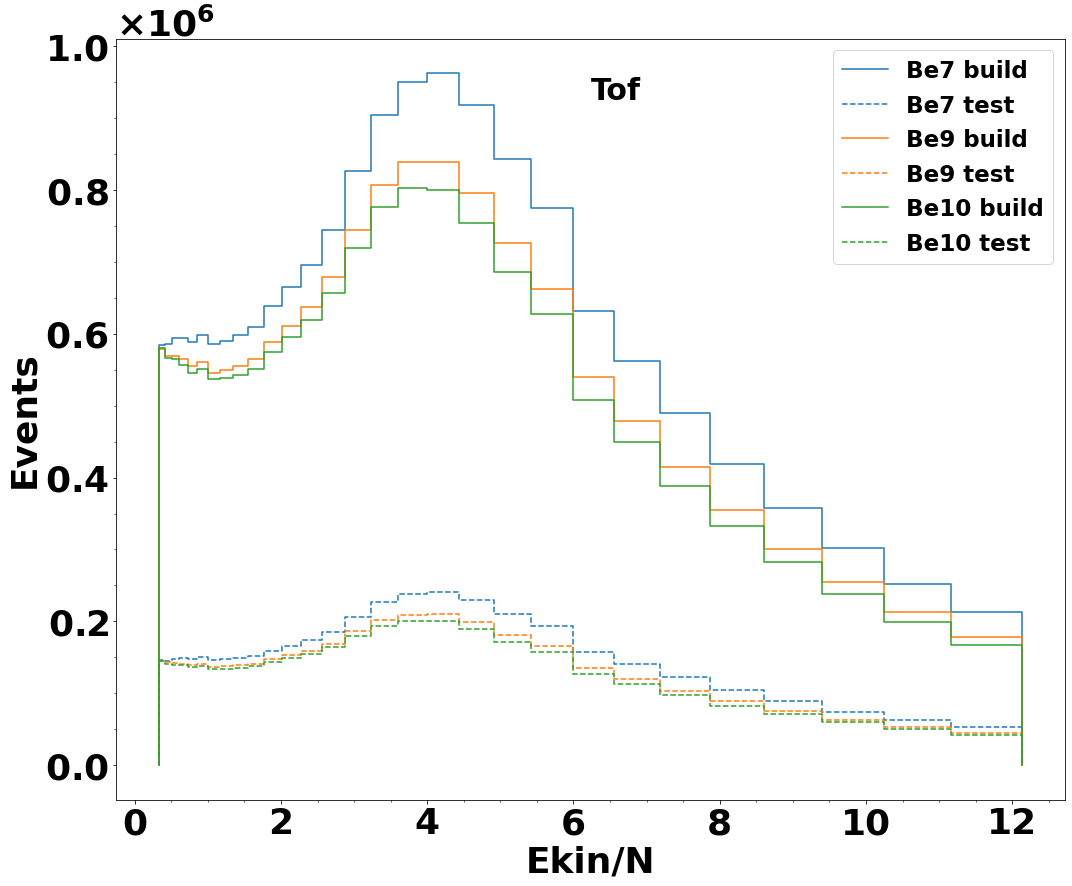

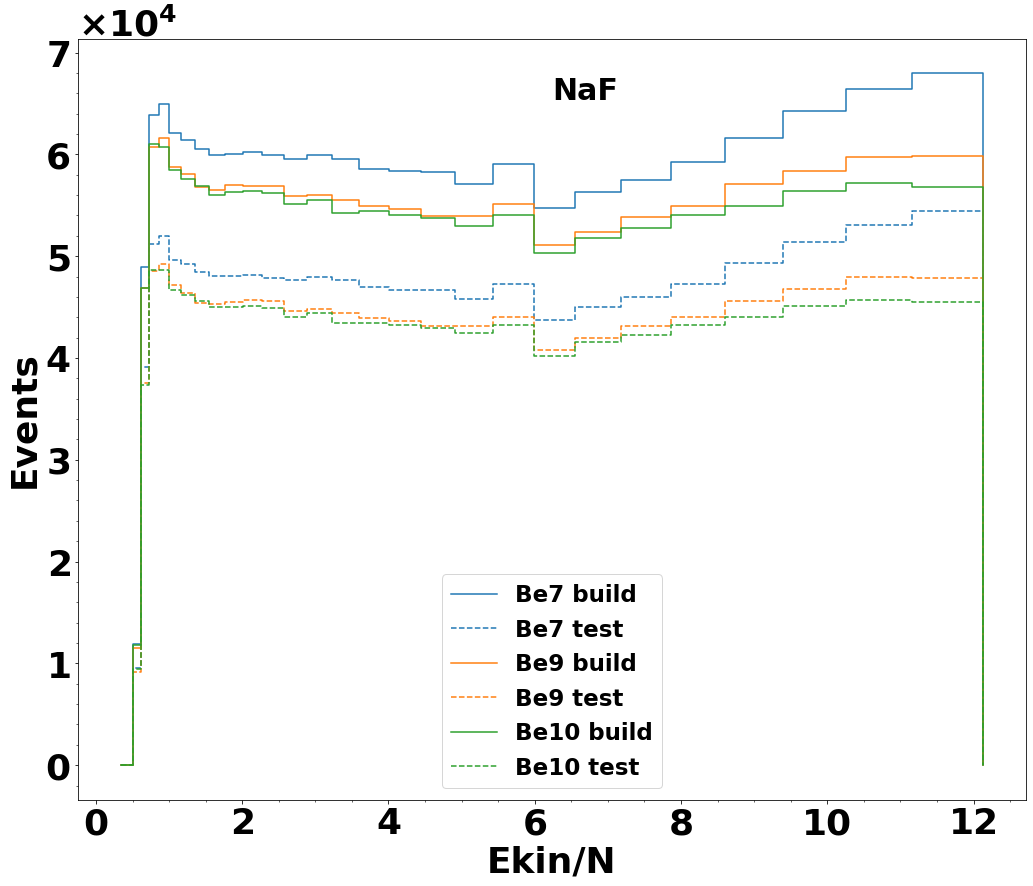

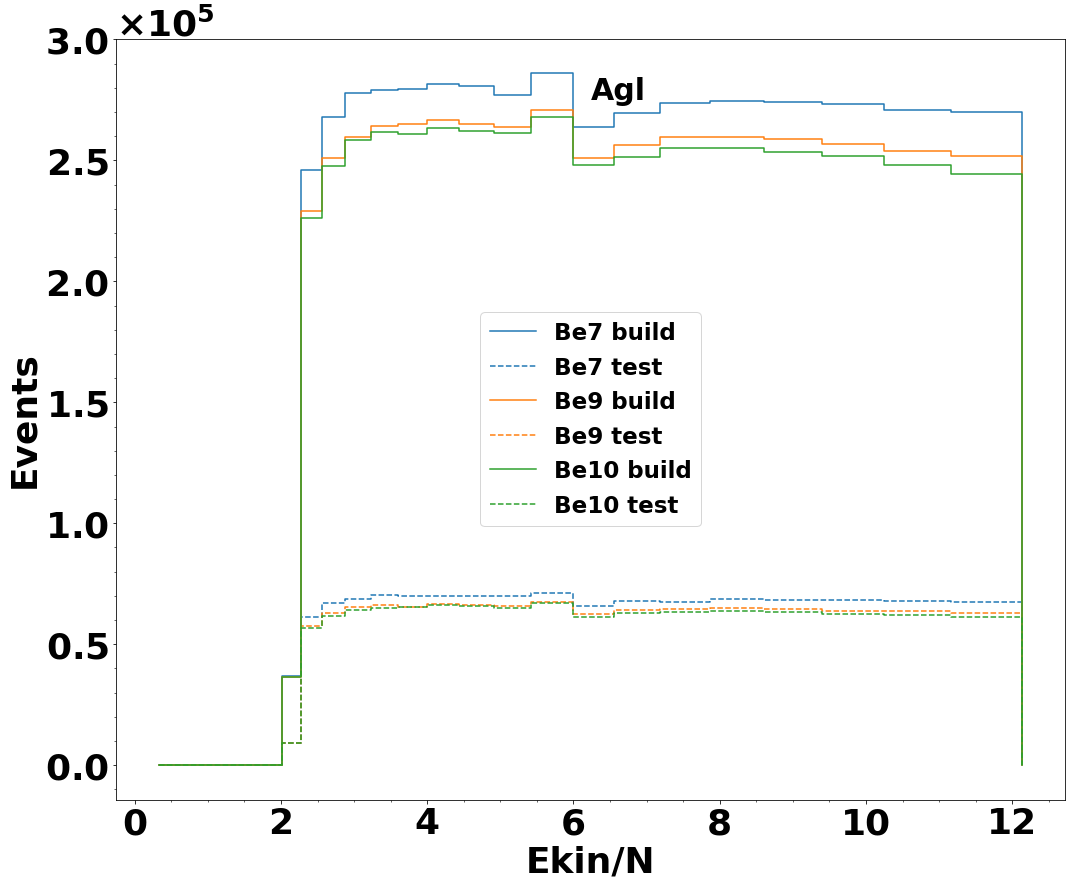

In [145]:
df1 = np.load(f'{file_histmass_build}')
df2 = np.load(f'{file_histmass_test}')
hist_counts = {dec: {} for dec in detectors}
hist_counts2 = {dec: {} for dec in detectors}
isotopes = ['Be7', 'Be9', 'Be10']
for dec in detectors:
    figure, ax1 = plt.subplots(1, 1, figsize=(17, 14))
    for iso in isotopes:
        hist_counts[dec][iso] = Histogram.from_file(df1, f'{iso}MC_{dec}_counts')   
        hist_counts2[dec][iso] = Histogram.from_file(df2, f'{iso}MC_{dec}_counts')
        plot_histogram_1d(ax1, hist_counts[dec][iso], style="mc", color=ISOTOPES_COLOR[iso], label=f'{iso} build', scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, show_overflow=False)
        plot_histogram_1d(ax1, hist_counts2[dec][iso], style="mc", color=ISOTOPES_COLOR[iso], label=f'{iso} test', scale=None, gamma=None, xlog=False, ylog=False, shade_errors=False, setscilabely=True, linestyle='--', show_overflow=False)
    ax1.legend(fontsize=23)
    ax1.text(0.5, 0.95, f'{dec}', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black')
    #ax1.set_ylim([0, 1.1*max(hist_counts[dec]['Be7'].values)])
    savefig_tofile(figure, plotdir, f"mc_stat_{dec}_{fig_suffix}", show=True)
    


xvalues			yvalues			yerrs
1.08555			298.86405029754906			69.91776242216459
1.2570999999999999			583.5336945573138			67.47954672549754
1.44745			600.8906568506995			70.59323509776632
1.6566			373.1350405272801			72.9541597611682
1.8872			566.2836736609379			72.89097848776478
2.1419			564.8017528483178			72.32085975003156
2.42075			502.0373093080143			72.5251053418205
2.7237			606.8027133523406			72.3890222030659
3.0534			392.2144875489116			71.20958614523599
3.4126000000000003			547.8242704724016			68.17806201073255
3.8012500000000005			346.8037871945353			65.99026781598309



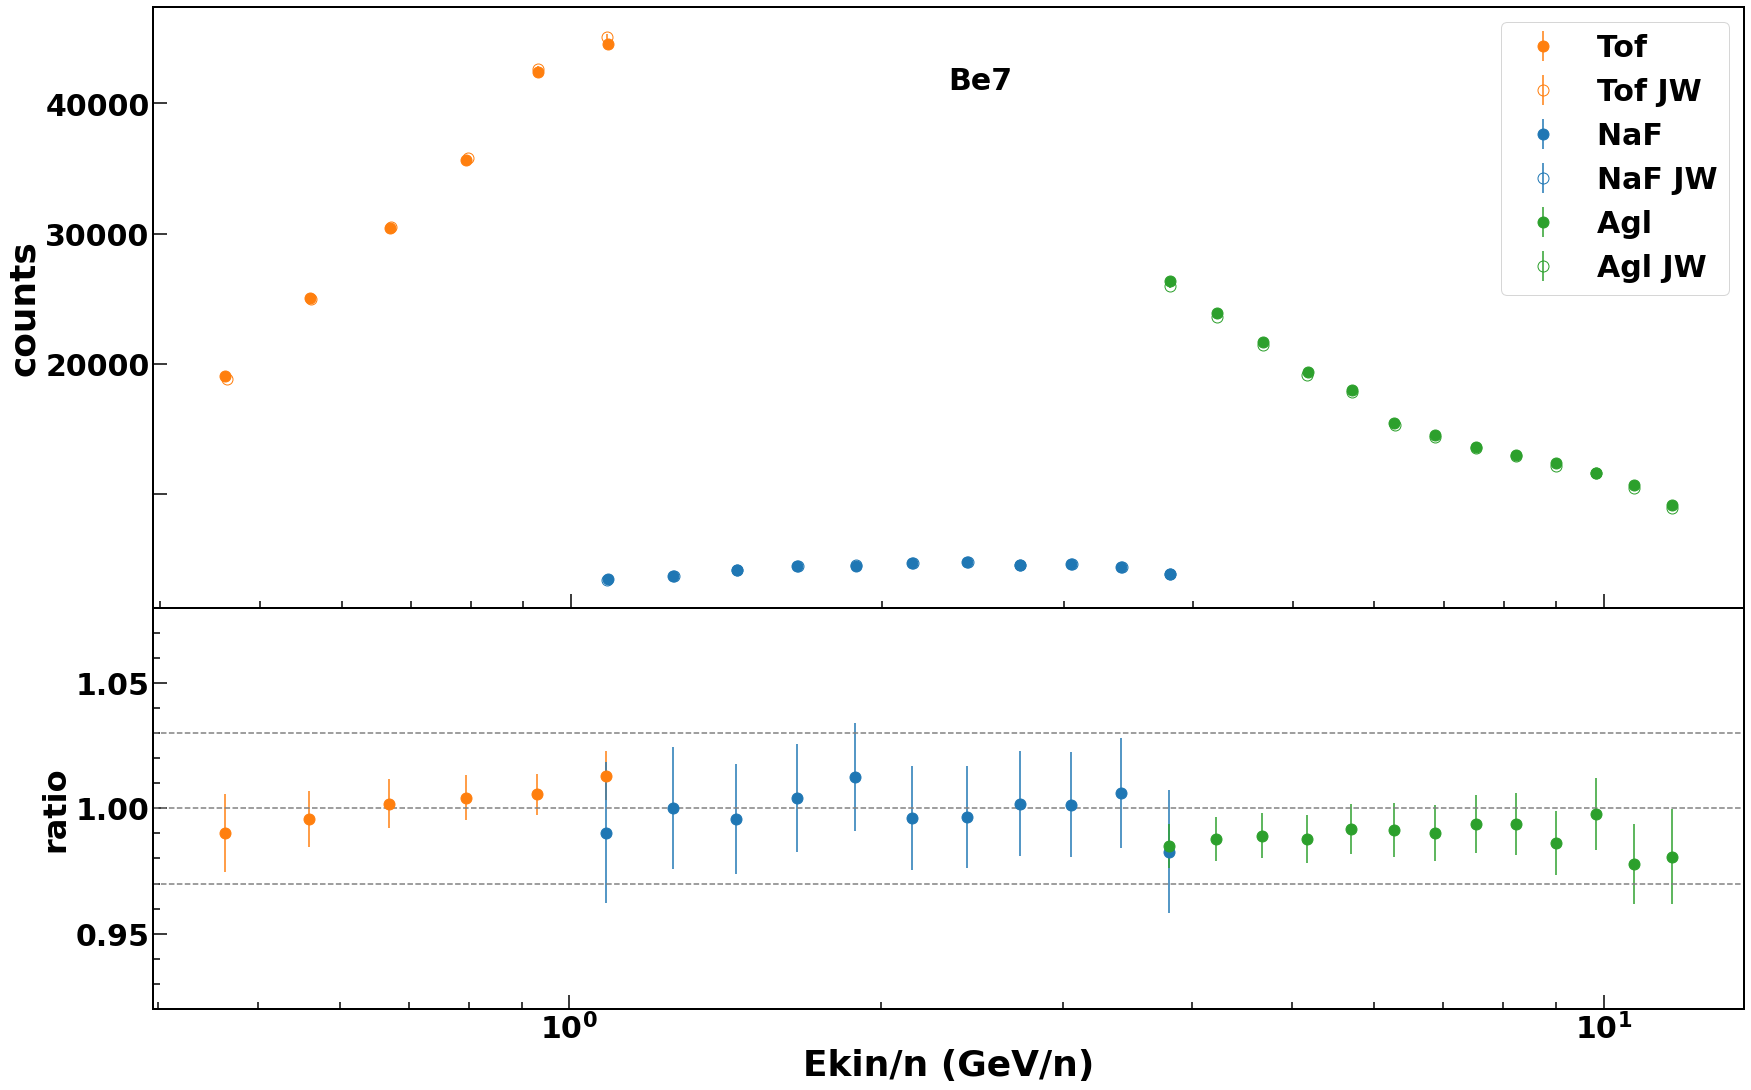

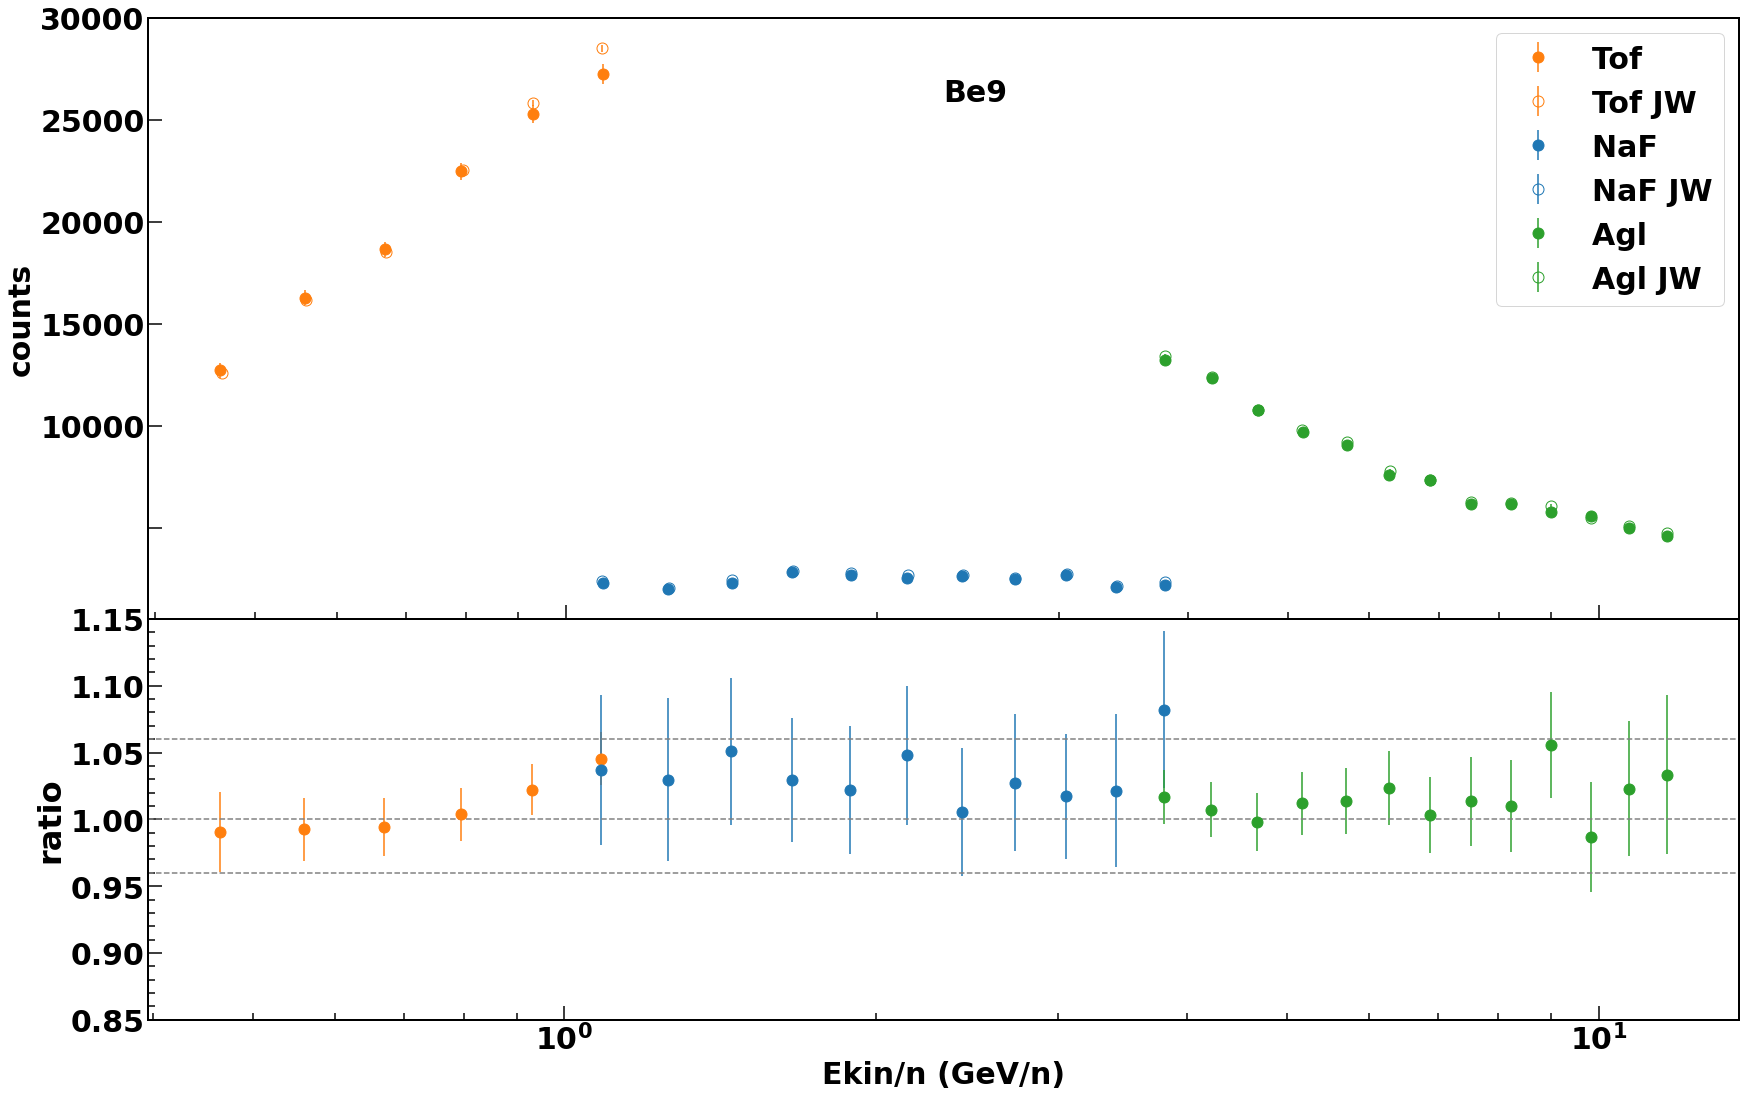

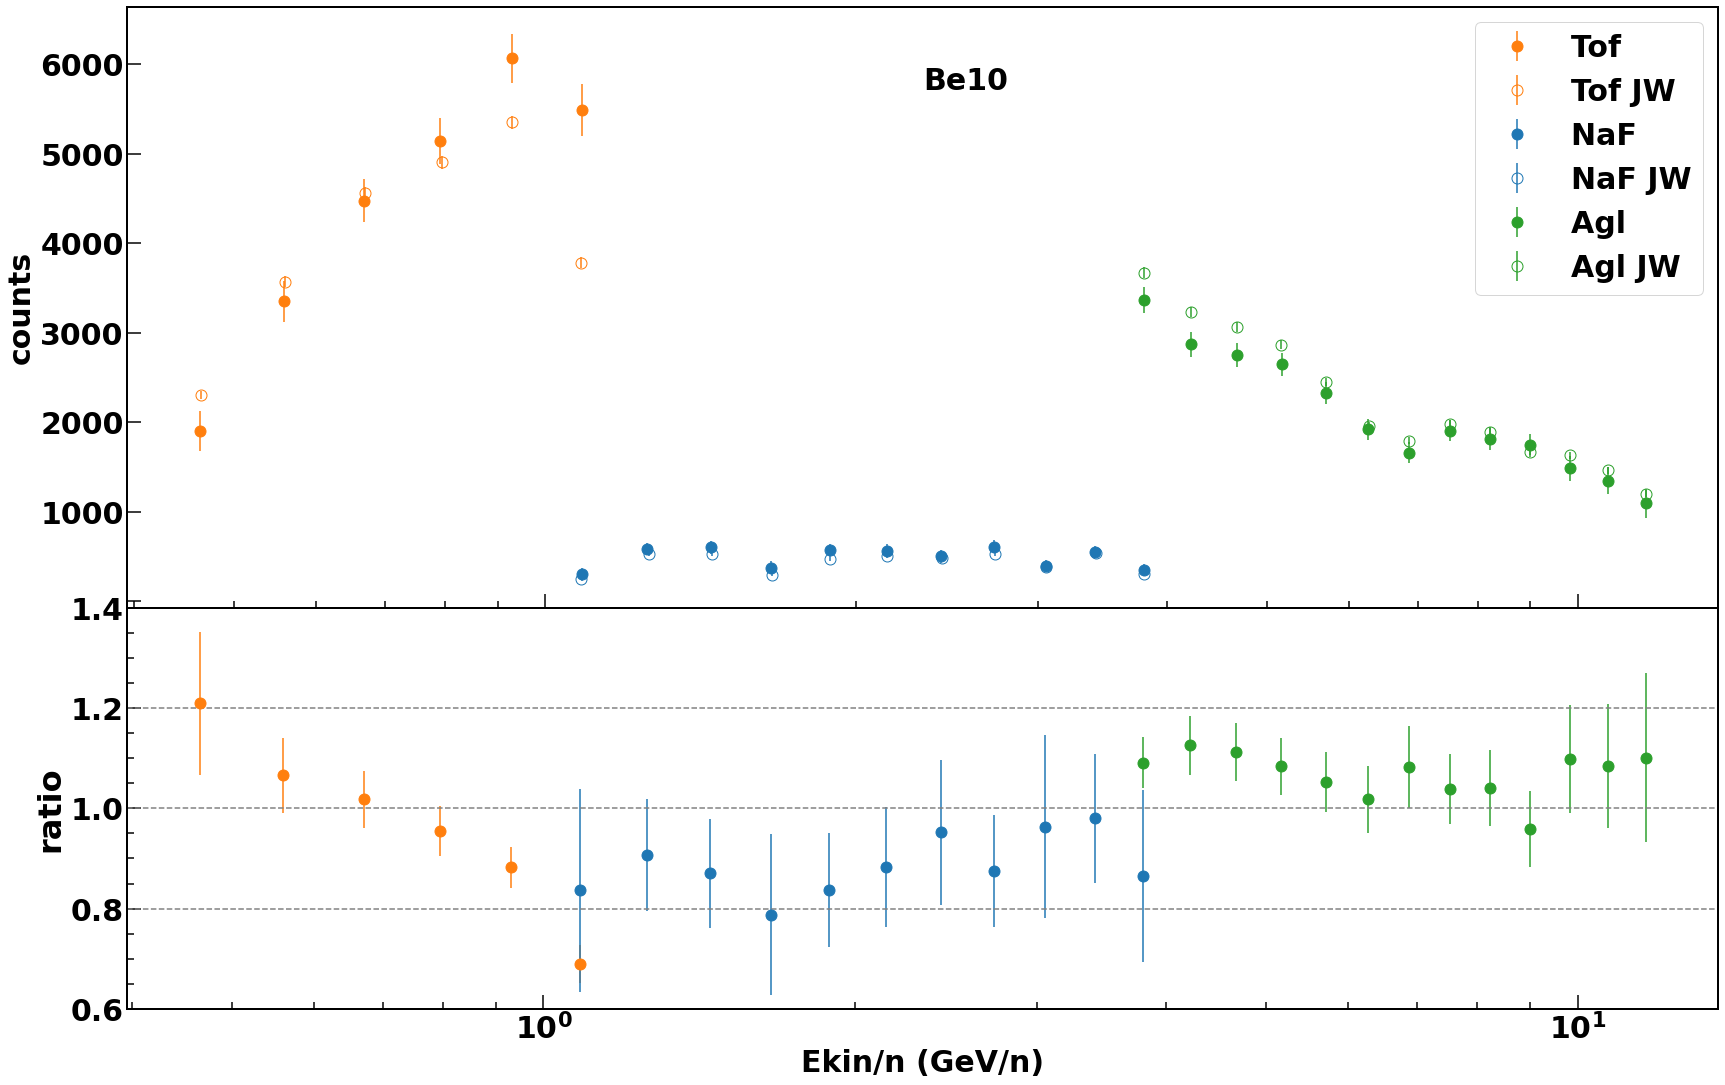

In [174]:
slicevalue ={'Tof':[0.45, 1.1], 'NaF':[1.2, 4.0], 'Agl':[4.1, 12.0]}
temp = 'Be7'
filename_compare = '/home/manbing/Documents/Data/jiahui/MC_Events/BeMC_histmass_vsekin_jiahuicommsel_test.npz'
#filename_init = '/home/manbing/Documents/Data/data_mc/dfile/BeMC_dict_hist_mass_ekin.npz'
graph_counts_jiahui = {dec: dict() for dec in detectors}                                                                                                                                                    
for dec in detectors:                                                                                                                                                                                       
    jiahui_counts_file =  pd.read_csv(f"/home/manbing/Documents/Data/jiahui/isotope_fluxes/Event_Counts_from_Fit/nevt_{detectors_alias[dec]}_10yr.txt",  sep='\s+', header=0)                               
    for iso in isotopes:                                                                                                                                                                            
        xjiahuicounts = 0.5*(jiahui_counts_file['Ek_low'] + jiahui_counts_file['Ek_high'])                                                                                                                  
        graph_counts_jiahui[dec][iso] = MGraph(xjiahuicounts, jiahui_counts_file[f'T{temp}_N{iso}'], np.sqrt(jiahui_counts_file[f'T{temp}_N{iso}']))   
    

df_counts = np.load(f'{file_counts}')
#df_counts_compare = np.load(f'{filename_init}')

figSize = (22, 15)
graph_counts_fromfit_fix = {dec: {} for dec in detectors}
graph_counts_compare = {dec: {} for dec in detectors}
graph_counts_sum = dict()
graph_counts_sum_compare = dict()
hist_mass2d = {dec: {} for dec in detectors}
isoy1 = {'Be7': 0.97, 'Be9': 0.96, 'Be10':0.8}
isoy2 = {'Be7': 1.03, 'Be9': 1.06, 'Be10':1.2}


for dec in detectors:
    for iso in isotopes:
        graph_counts_fromfit_fix[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}Opt{temp}_{iso}")
        #graph_counts_fromfit_fix[dec][iso] = slice_graph_by_value(graph_counts_fromfit_fix[dec][iso], slicevalue[dec])
        #hist_mass2d[dec][iso] = WeightedHistogram.from_file(df_counts_compare, f"{iso}MC_{dec}_mass")
        #graph_counts_compare[dec][iso] = MGraph(xbinning.bin_centers[1:-1], np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1), np.sqrt(np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1)))
        #graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f'{dec}_{iso}MC_counts')
        xstart = graph_counts_fromfit_fix[dec][iso].xvalues[0]
        xend = graph_counts_fromfit_fix[dec][iso].xvalues[-1]
        graph_counts_compare[dec][iso] = slice_graph_by_value(graph_counts_jiahui[dec][iso], np.array([xstart, xend]))
        
        
print(graph_counts_fromfit_fix['NaF']['Be10'])

for iso in isotopes: 
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(26, 16))                                                                                                            
    fig.subplots_adjust(left= 0.12, right=0.97, bottom=0.08, top=0.95) 
    for dec in detectors:
        plot_graph(fig, ax1, graph_counts_fromfit_fix[dec][iso], color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{dec} ')  
        plot_graph(fig, ax1, graph_counts_compare[dec][iso], color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{dec} JW', markerfacecolor="none") 
        graph_ratio = graph_counts_compare[dec][iso]/graph_counts_fromfit_fix[dec][iso]
        plot_graph(fig, ax2, graph_ratio, color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{dec}')  
        if iso == "Be7":
            graph_counts_sum[dec] = graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_compare[dec][iso]
        else:
            graph_counts_sum[dec] = graph_counts_sum[dec] + graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_sum_compare[dec] + graph_counts_compare[dec][iso]
            
    ax1.legend(loc="upper right", fontsize=30) 
    ax1.set_xticklabels([])
    plt.subplots_adjust(hspace=.0)   
    ax1.get_yticklabels()[0].set_visible(False)
    ax1.set_ylabel('counts')
    ax1.legend(loc="upper right", fontsize=30) 
    ax1.set_xticklabels([])
    plt.subplots_adjust(hspace=.0)   
    ax1.get_yticklabels()[0].set_visible(False)
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax2.set_ylabel('ratio', fontsize=32)
    #ax2.grid(axis='y')
    ax2.set_xlabel('Ekin/n (GeV/n)') 
    if iso == "Be7":
        ax2.set_ylim([0.92, 1.08])
    elif iso == 'Be9':
        ax2.set_ylim([0.85, 1.15])
    else:
        ax2.set_ylim([0.6, 1.4])
        
    ax2.axhline(y=1, color='grey', linestyle='--')
    ax2.axhline(y=isoy1[iso], color='grey', linestyle='--')
    ax2.axhline(y=isoy2[iso], color='grey', linestyle='--')
    
    #ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax2.set_xticks(np.array([2, 4, 10]))
 
    set_plot_defaultstyle(ax1)
    set_plot_defaultstyle(ax2)
    
    ax1.text(0.5, 0.9, f'{iso}', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black')
    plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate0410/plots_0410'
    savefig_tofile(fig, plotfile, f"compare_counts_fromfit_T{temp}N{iso}_finebin_tunedmc", show=True) 

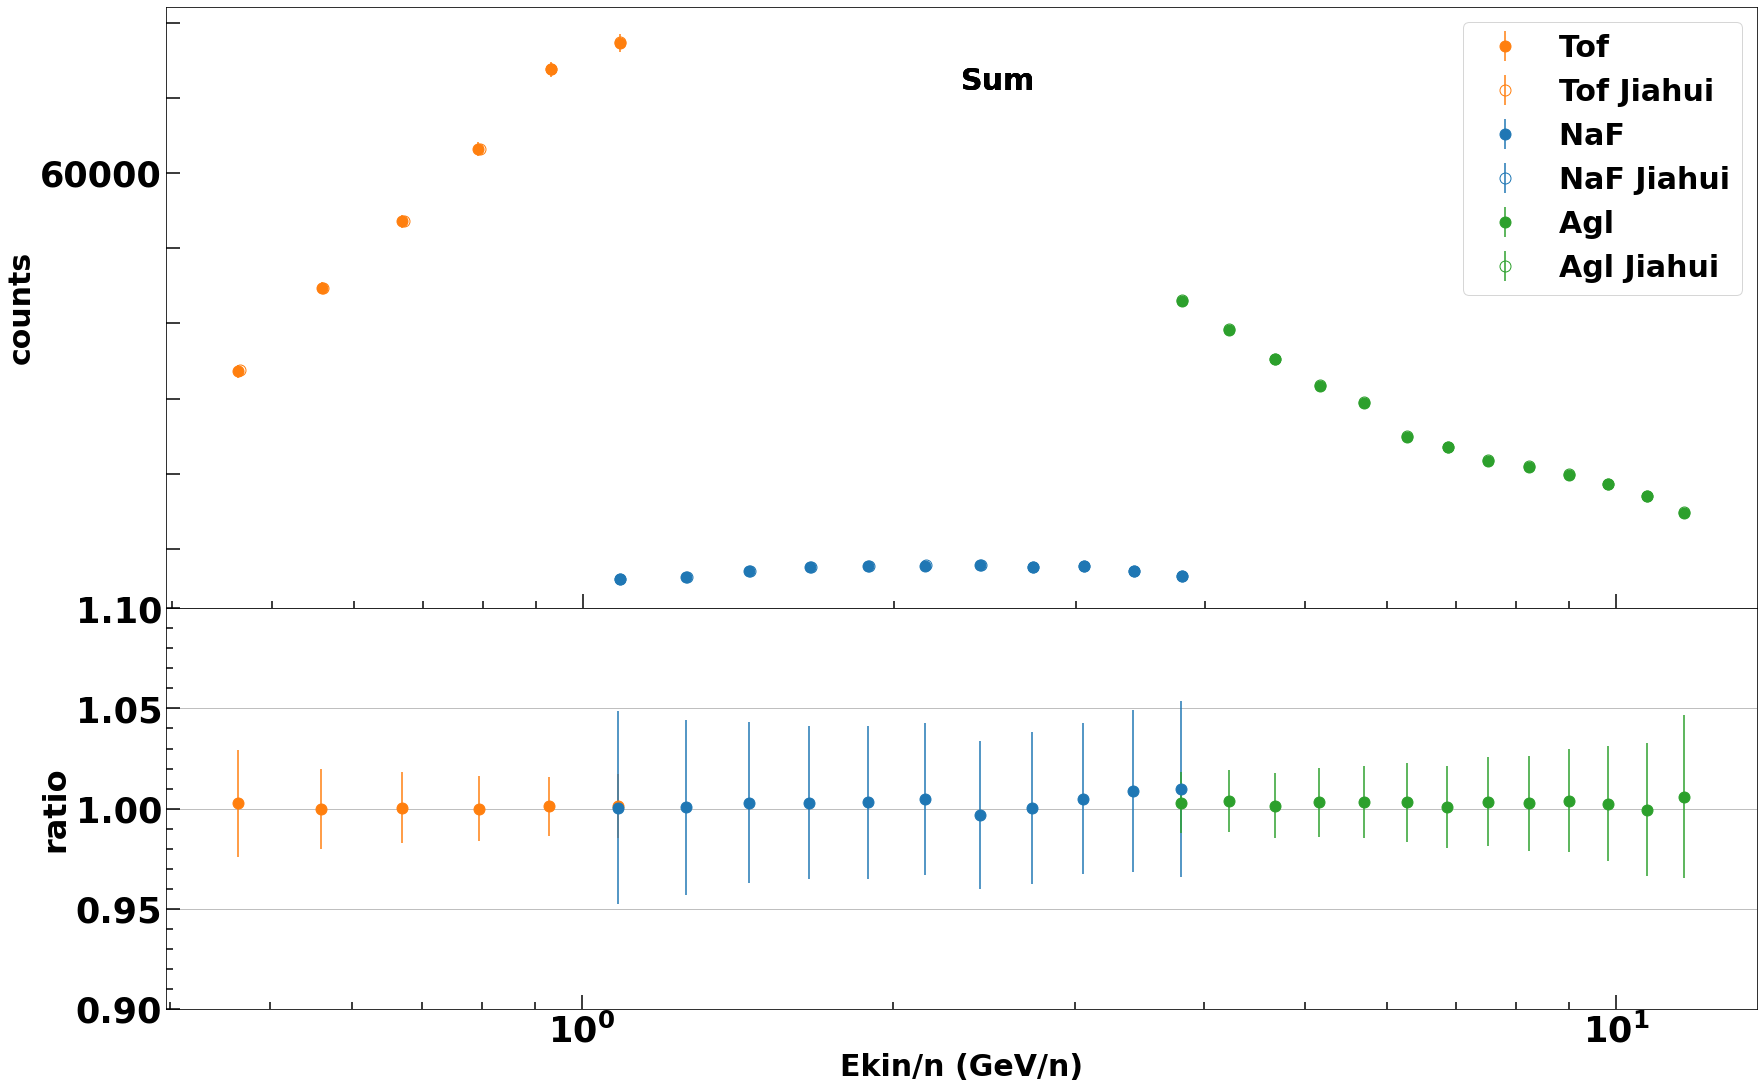

In [175]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(26, 16))                                                                                                            
fig.subplots_adjust(left= 0.12, right=0.97, bottom=0.08, top=0.95) 
for dec in detectors:
    plot_graph(fig, ax1, graph_counts_sum[dec], color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{dec} ')  
    plot_graph(fig, ax1, graph_counts_sum_compare[dec], color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{dec} Jiahui', markerfacecolor="none") 
    graph_ratio = graph_counts_sum_compare[dec]/graph_counts_sum[dec]
    plot_graph(fig, ax2, graph_ratio, color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{dec}')  
       
    ax2.grid(axis='y')
    ax2.set_xlabel('Ekin/n (GeV/n)') 
    ax1.legend(loc="upper right", fontsize=30) 
    ax1.set_xticklabels([])
    plt.subplots_adjust(hspace=.0)   
    ax1.get_yticklabels()[0].set_visible(False)
    ax1.set_ylabel('counts')

    ax1.legend(loc="upper right", fontsize=30) 
    ax1.set_xticklabels([])

    plt.subplots_adjust(hspace=.0)   
    ax1.get_yticklabels()[0].set_visible(False)
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax2.set_ylabel('ratio', fontsize=32)
    ax2.set_ylim([0.9, 1.1])
    #ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax2.set_xticks(np.array([2, 4, 10]))
    ax1.text(0.5, 0.9, f'Sum', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black')
    savefig_tofile(fig, plotdir, f"counts_sum_TBe9_{fig_suffix}", show=True) 
    


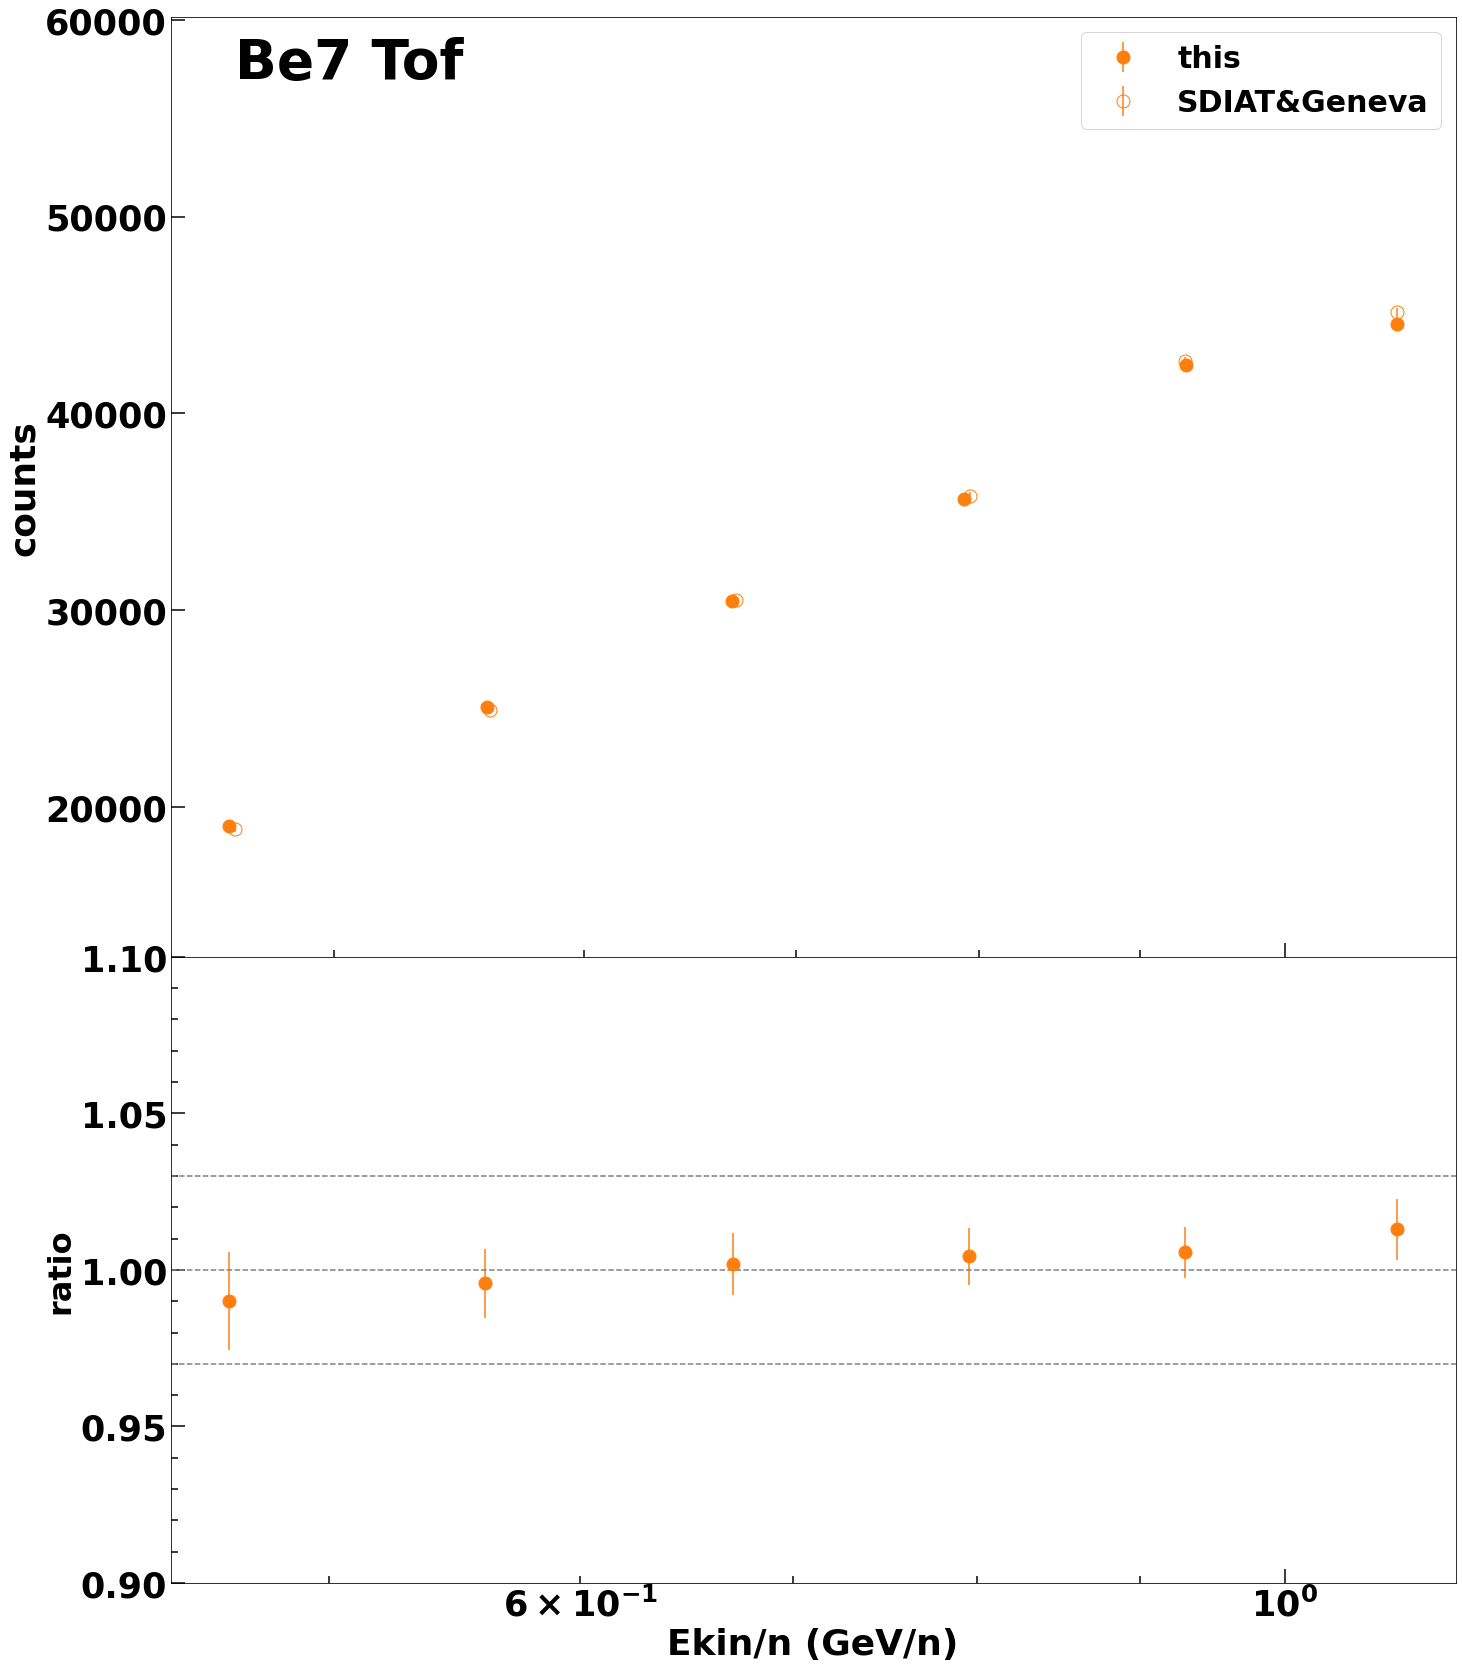

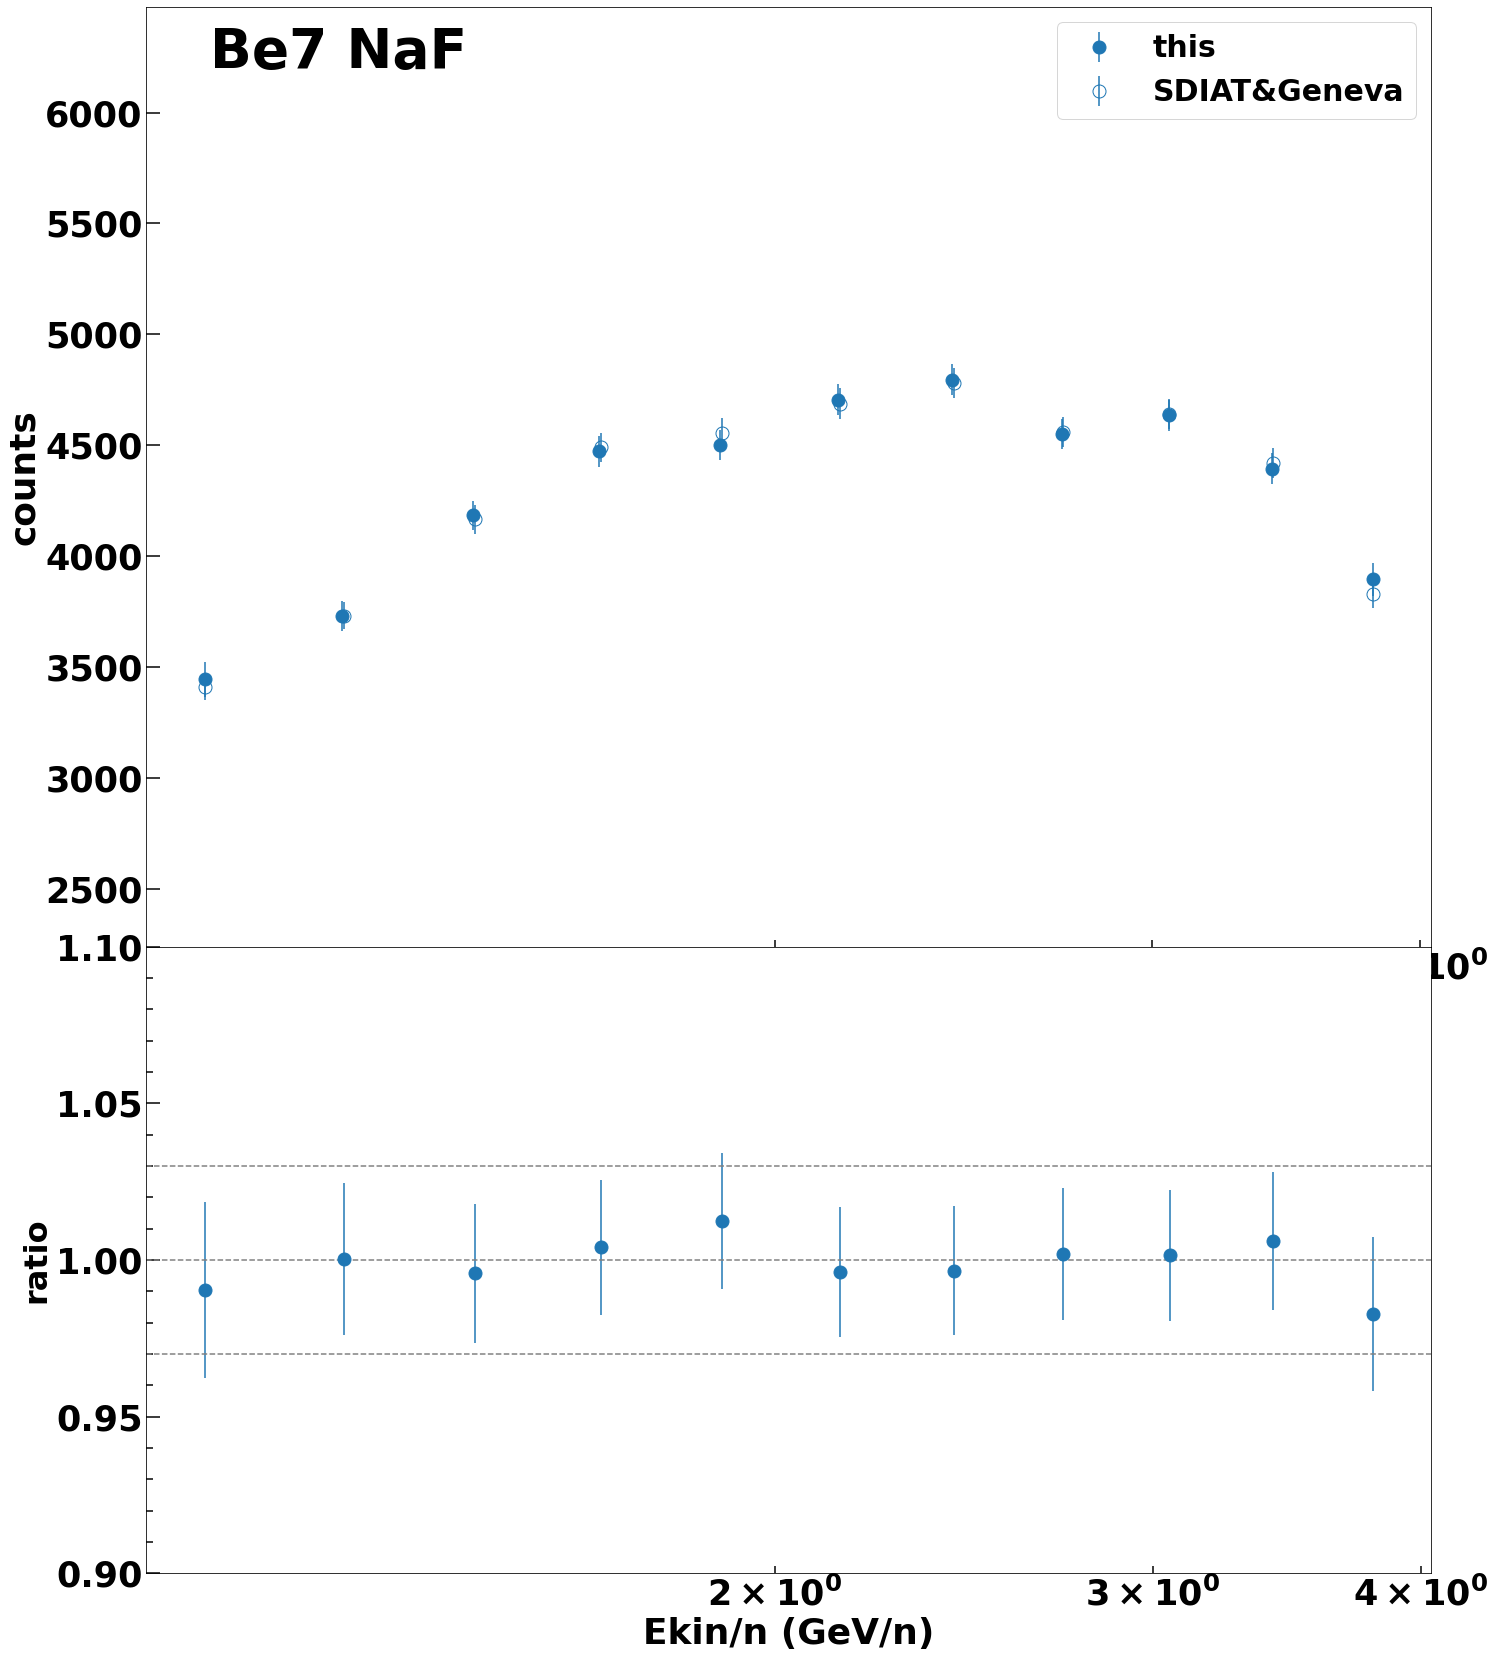

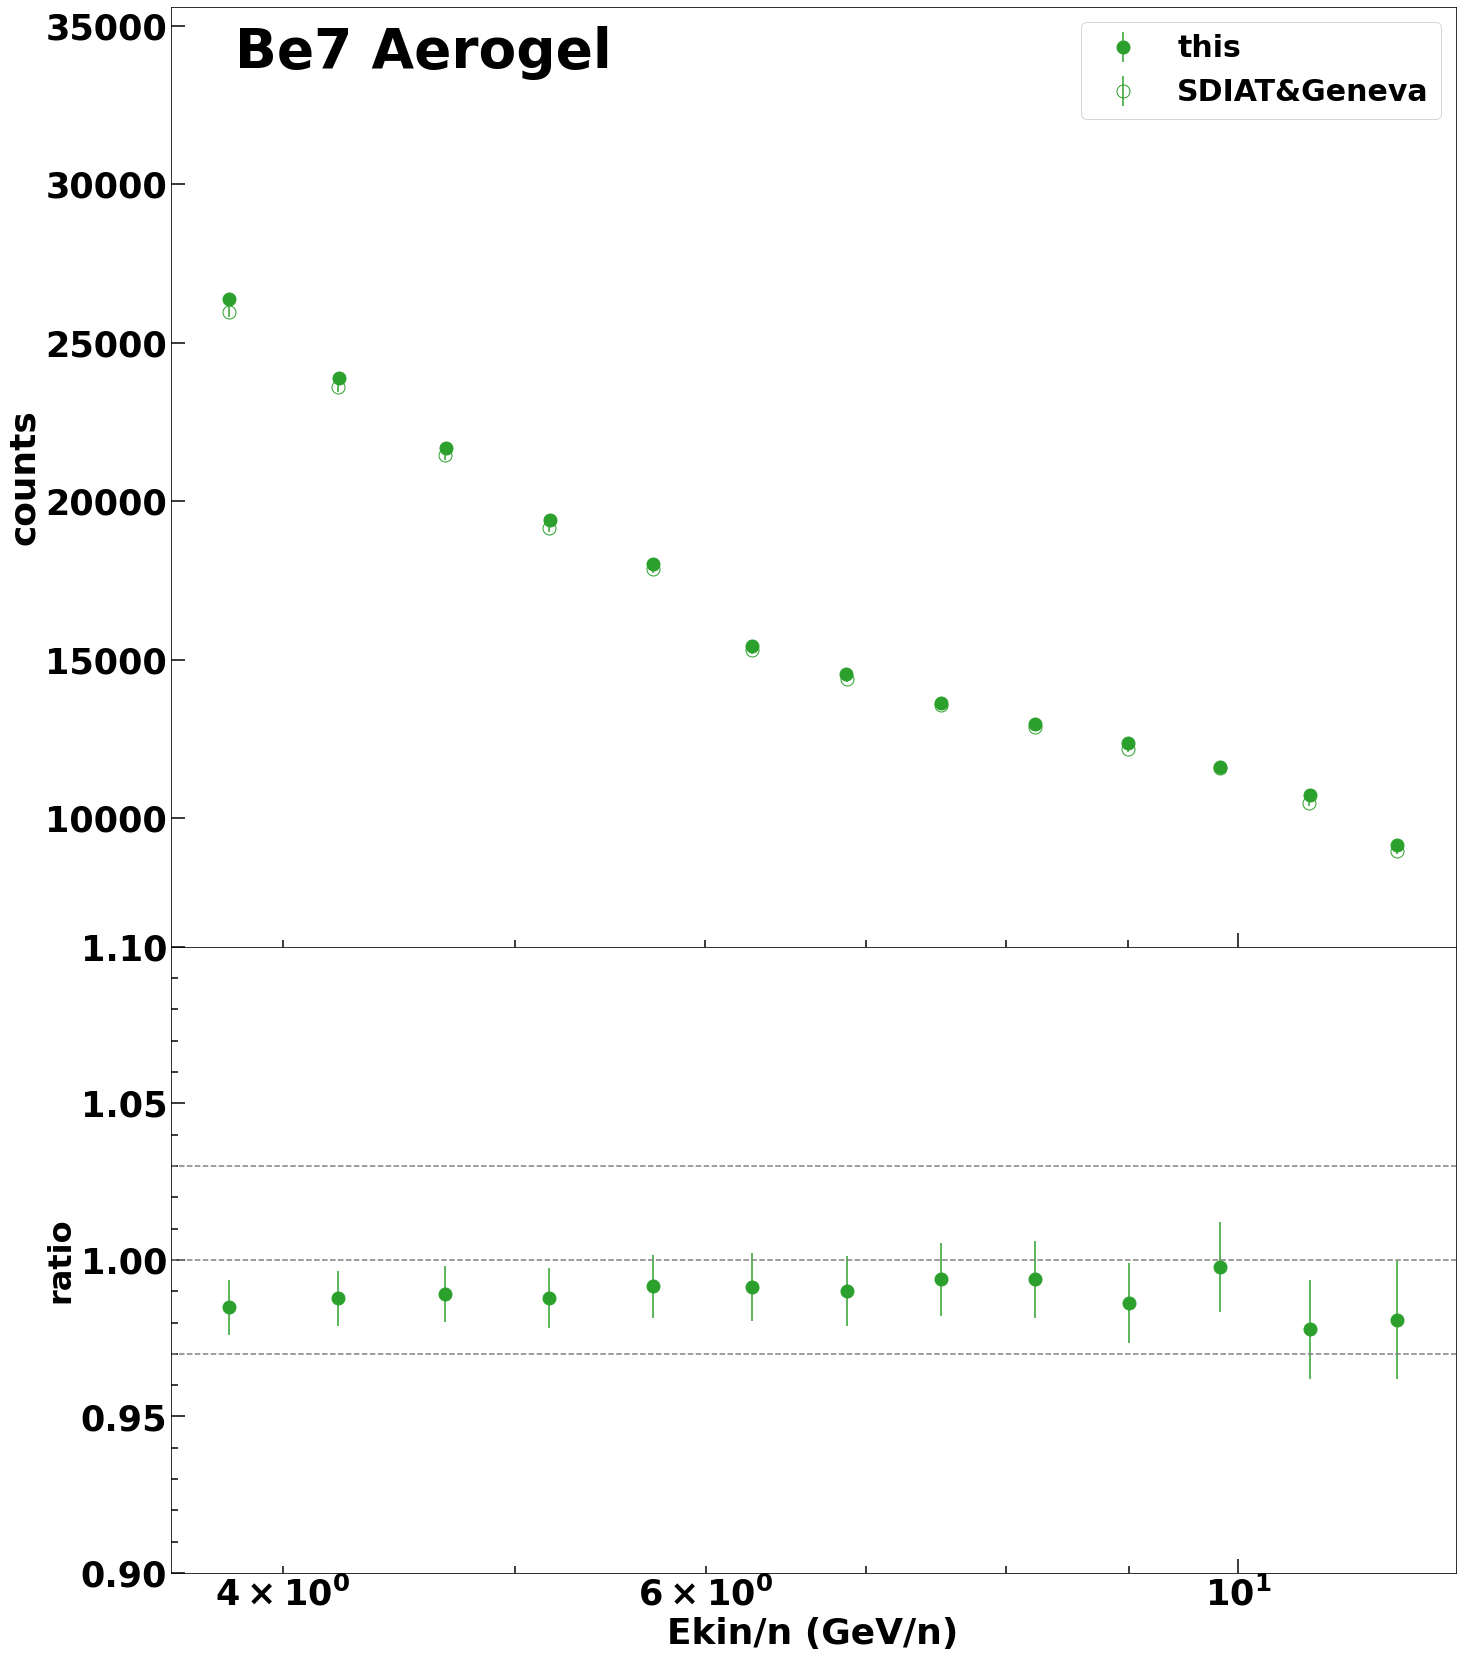

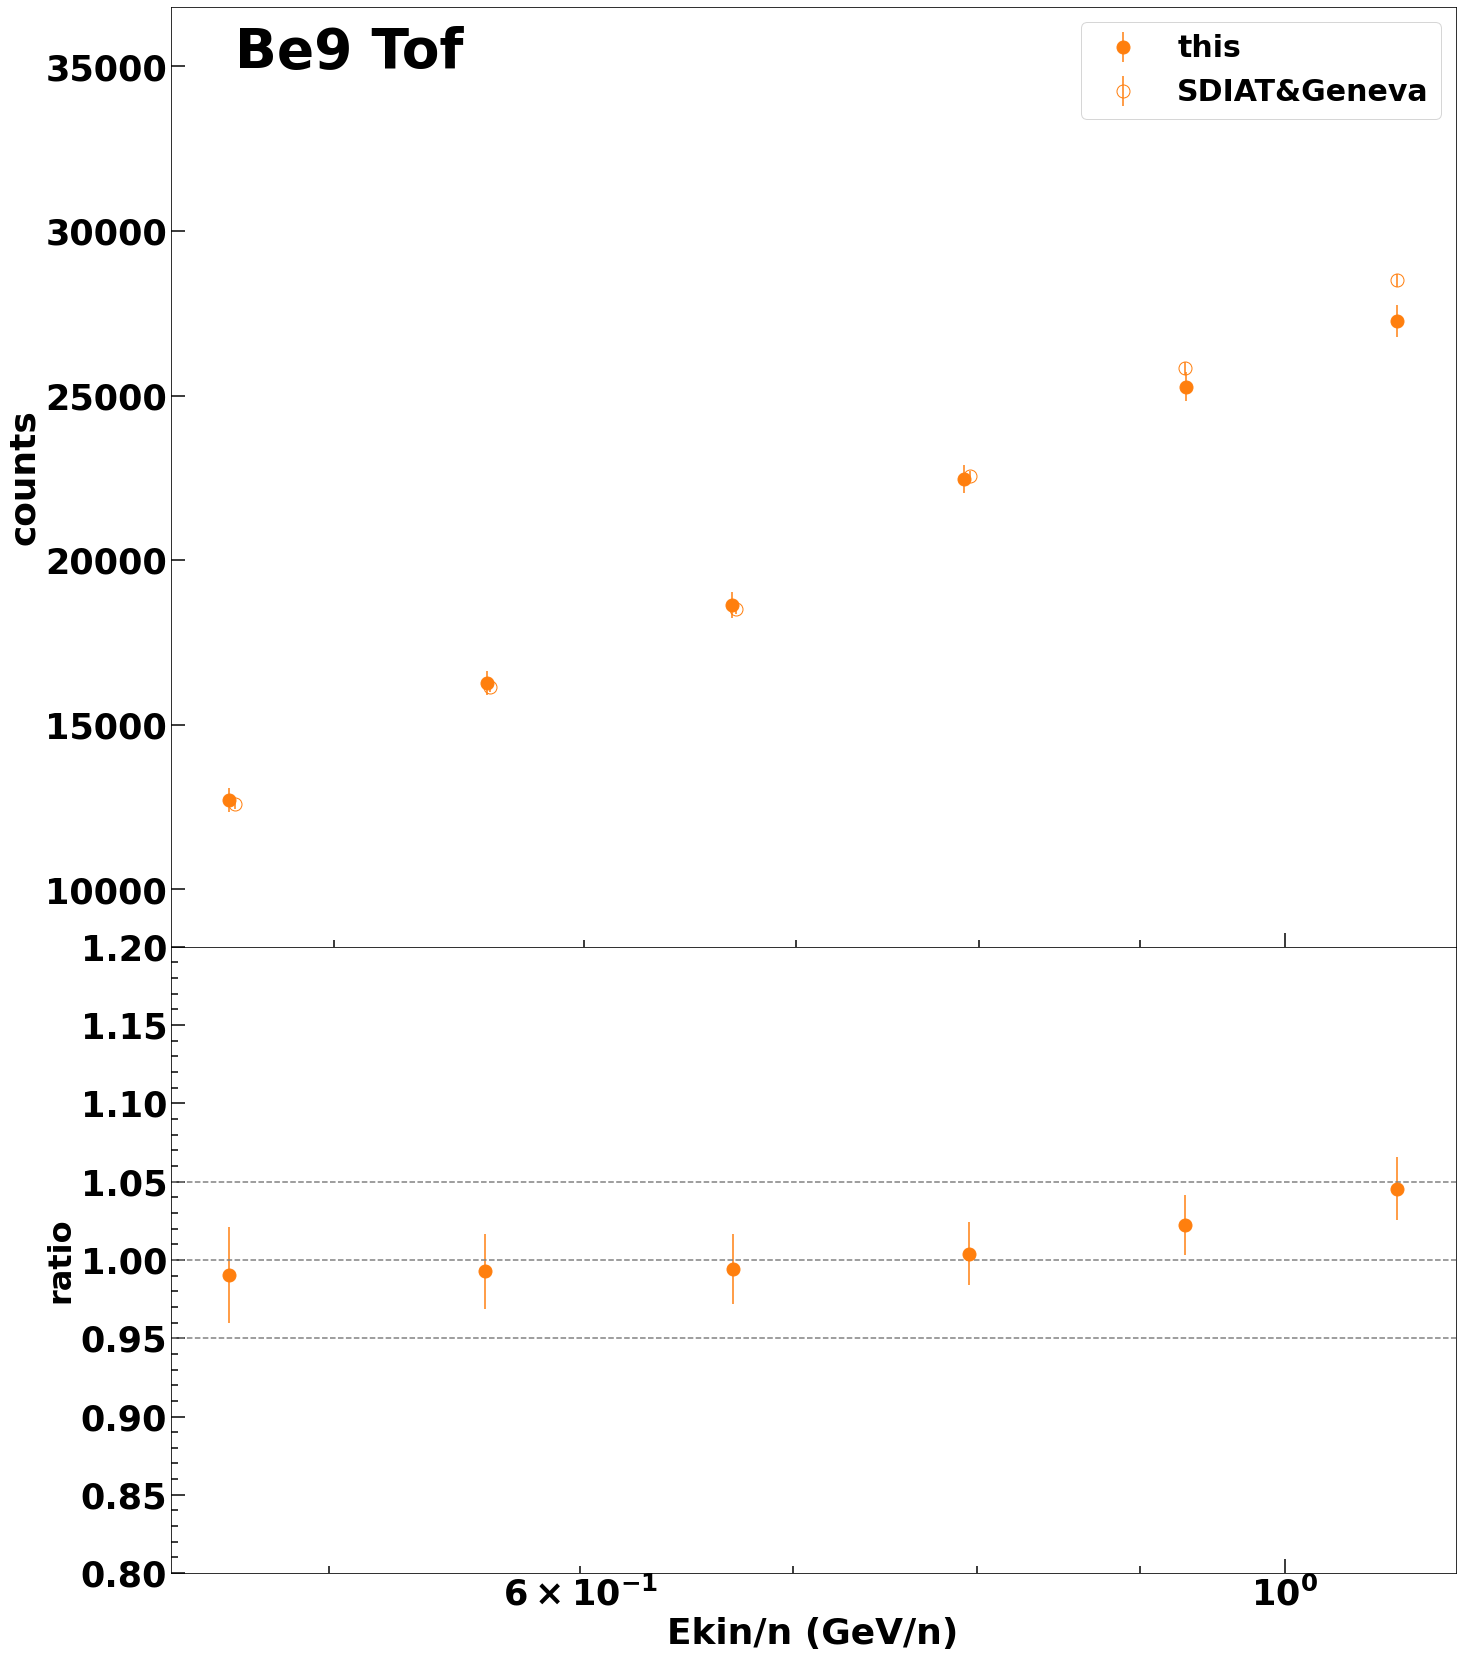

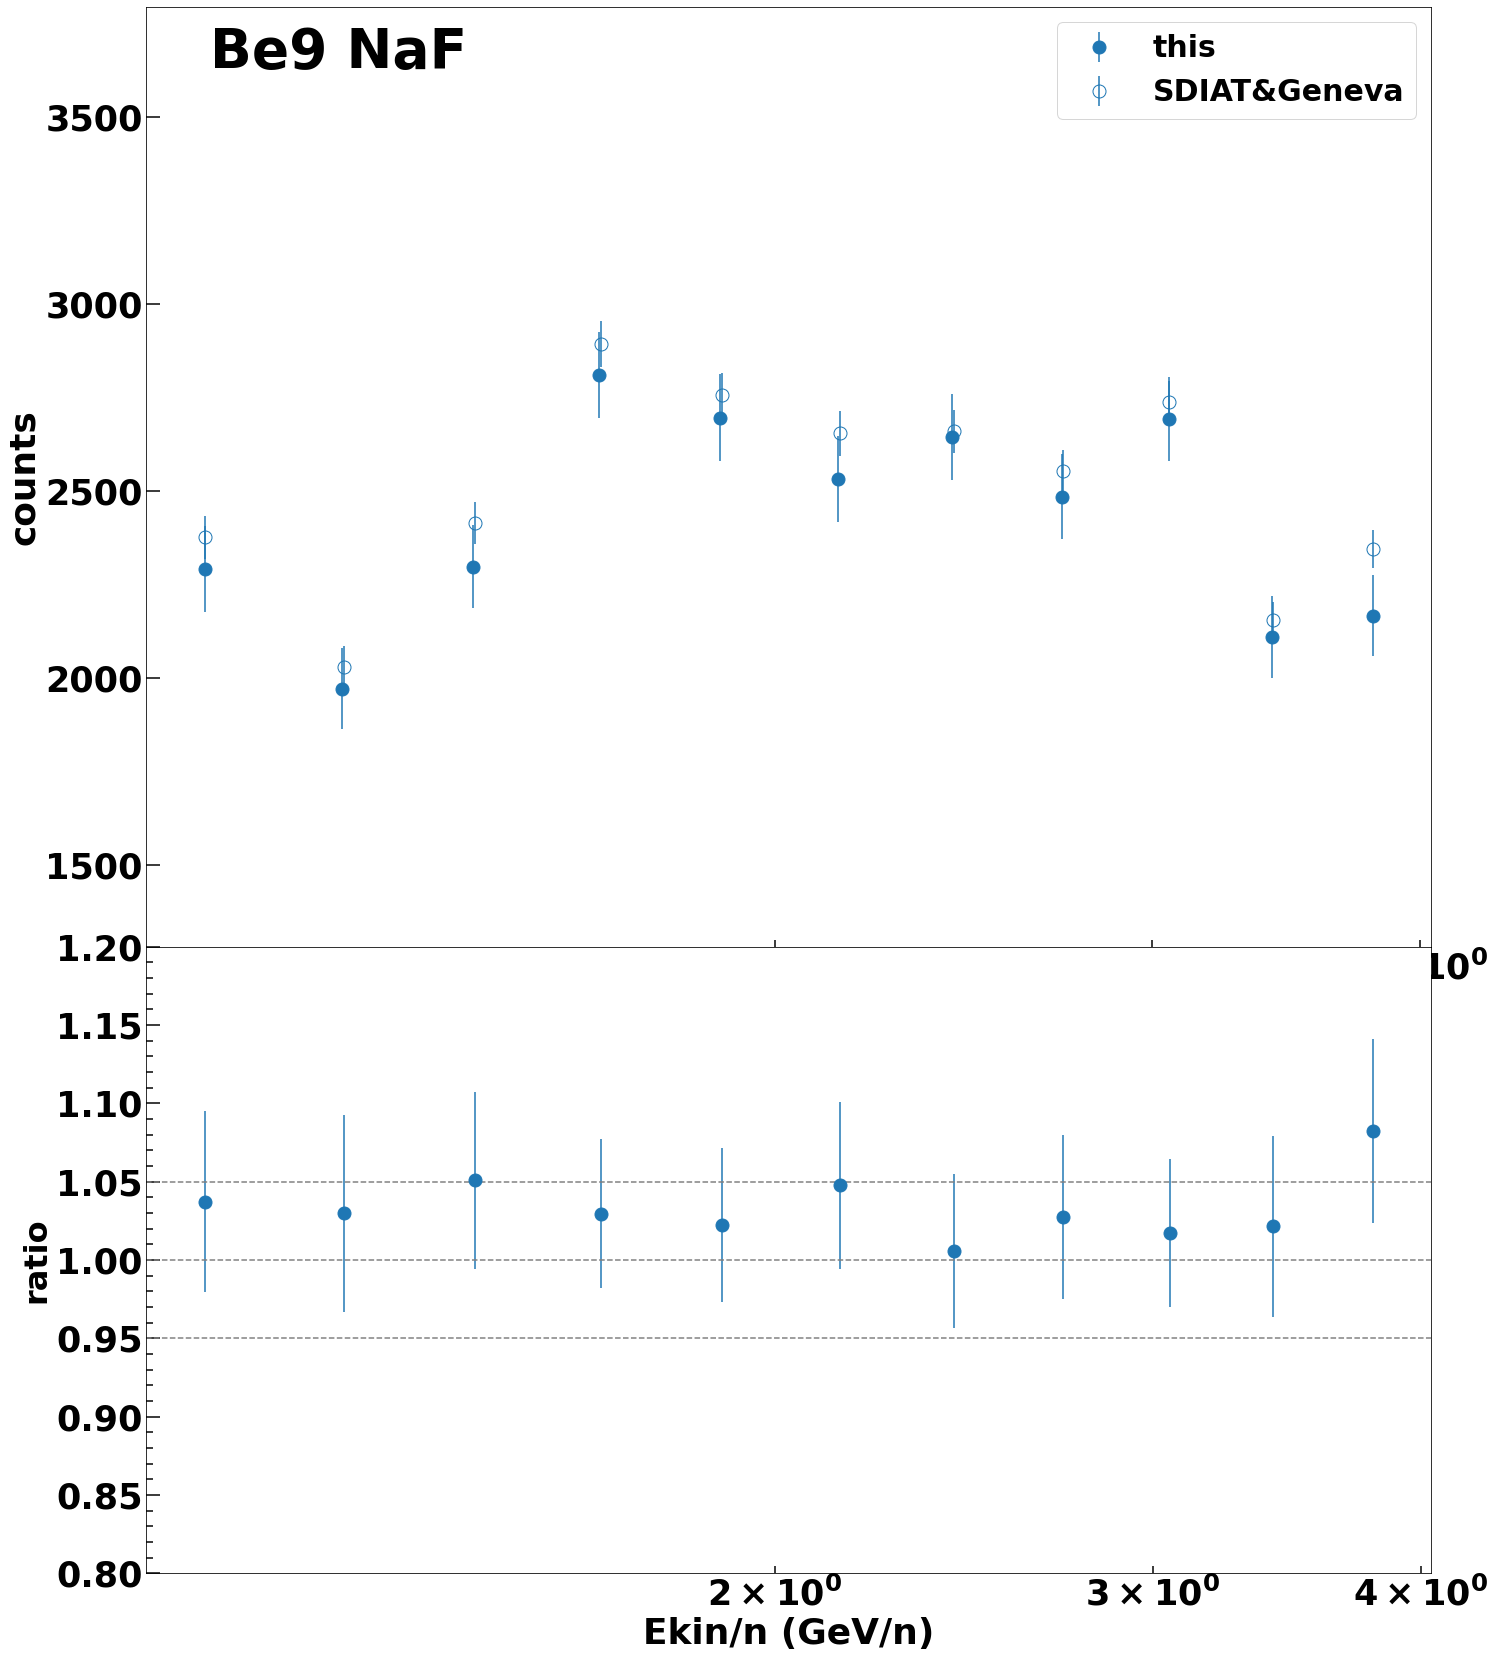

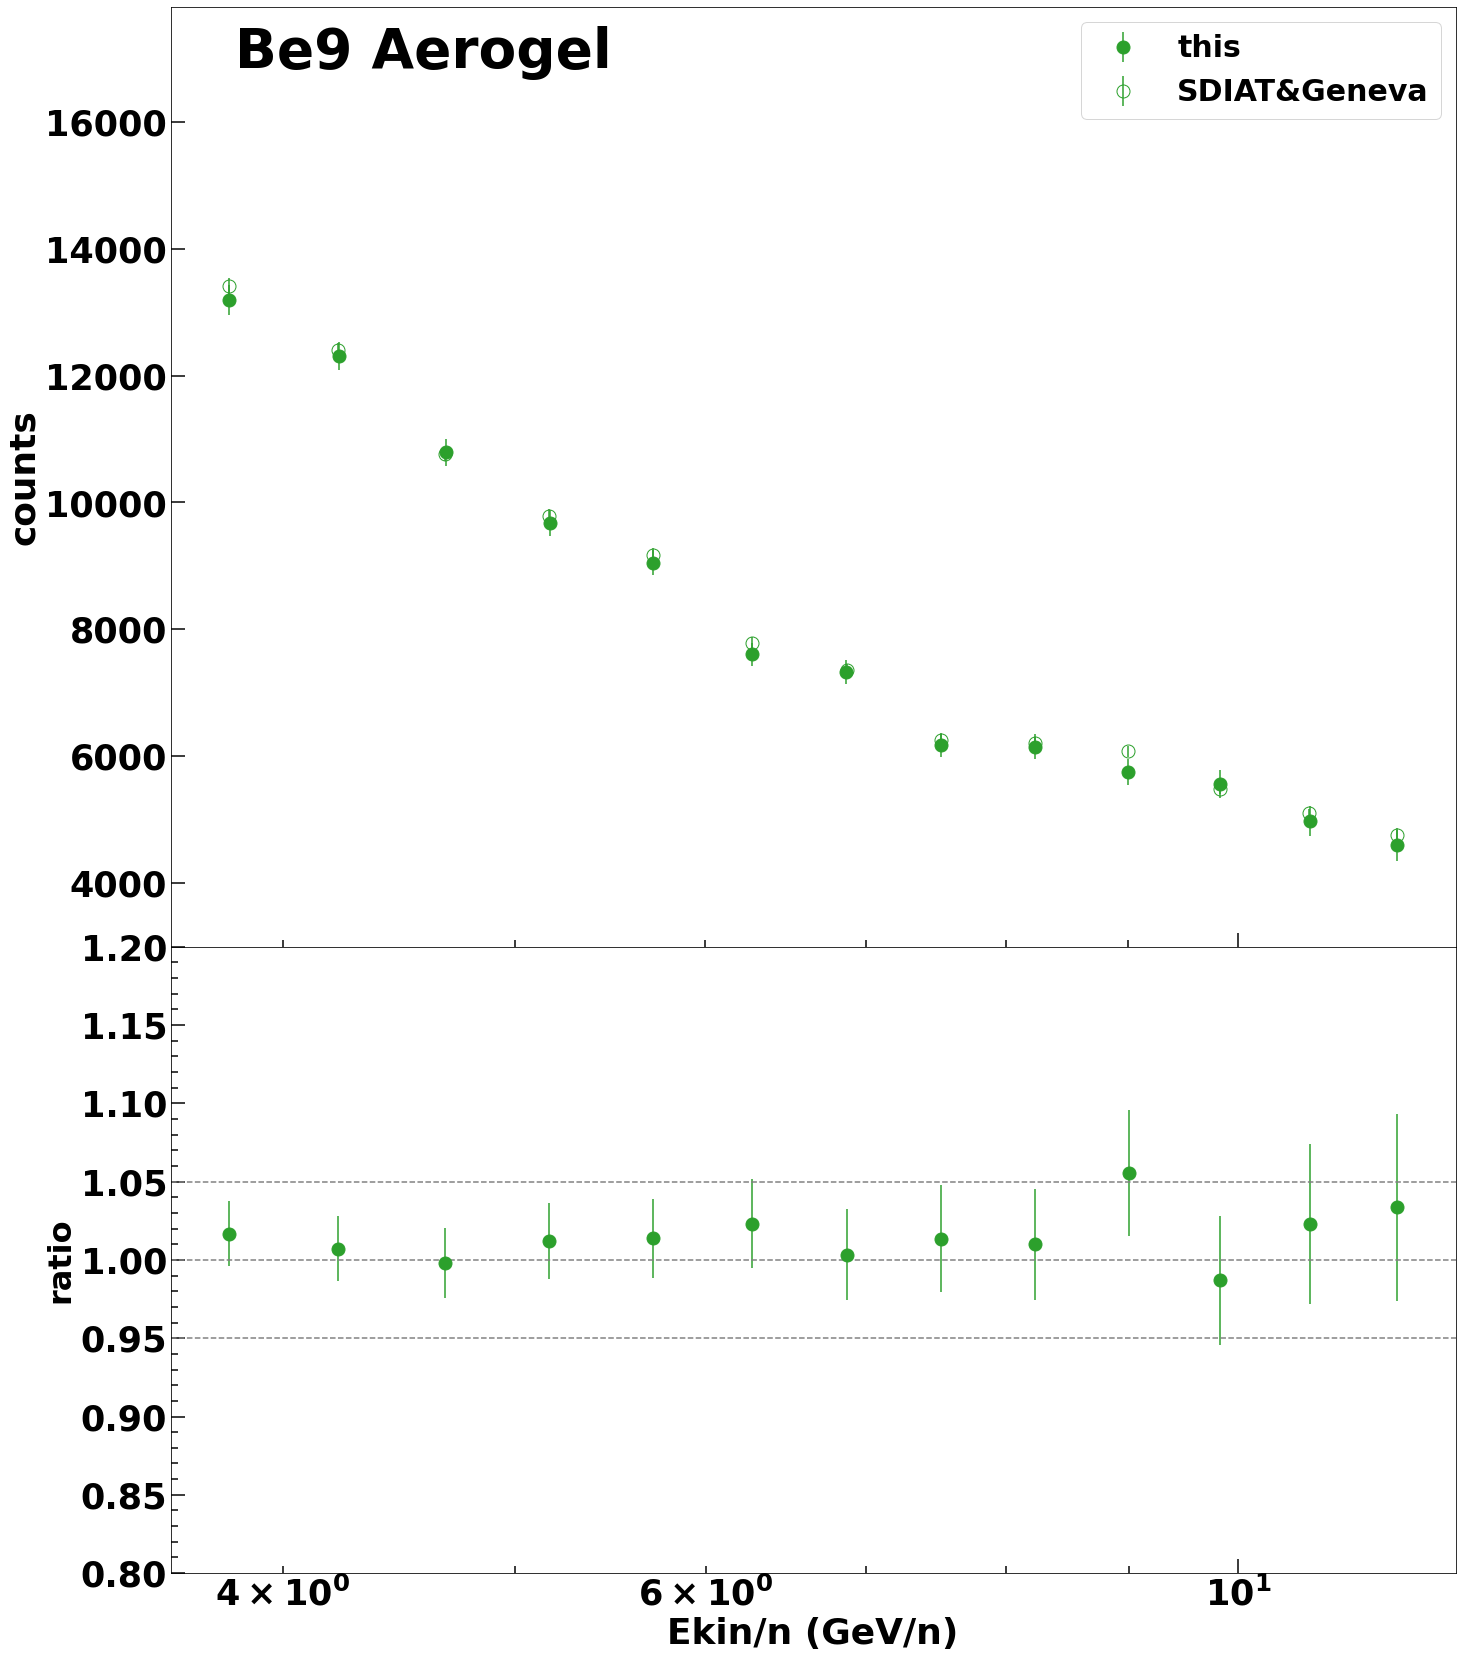

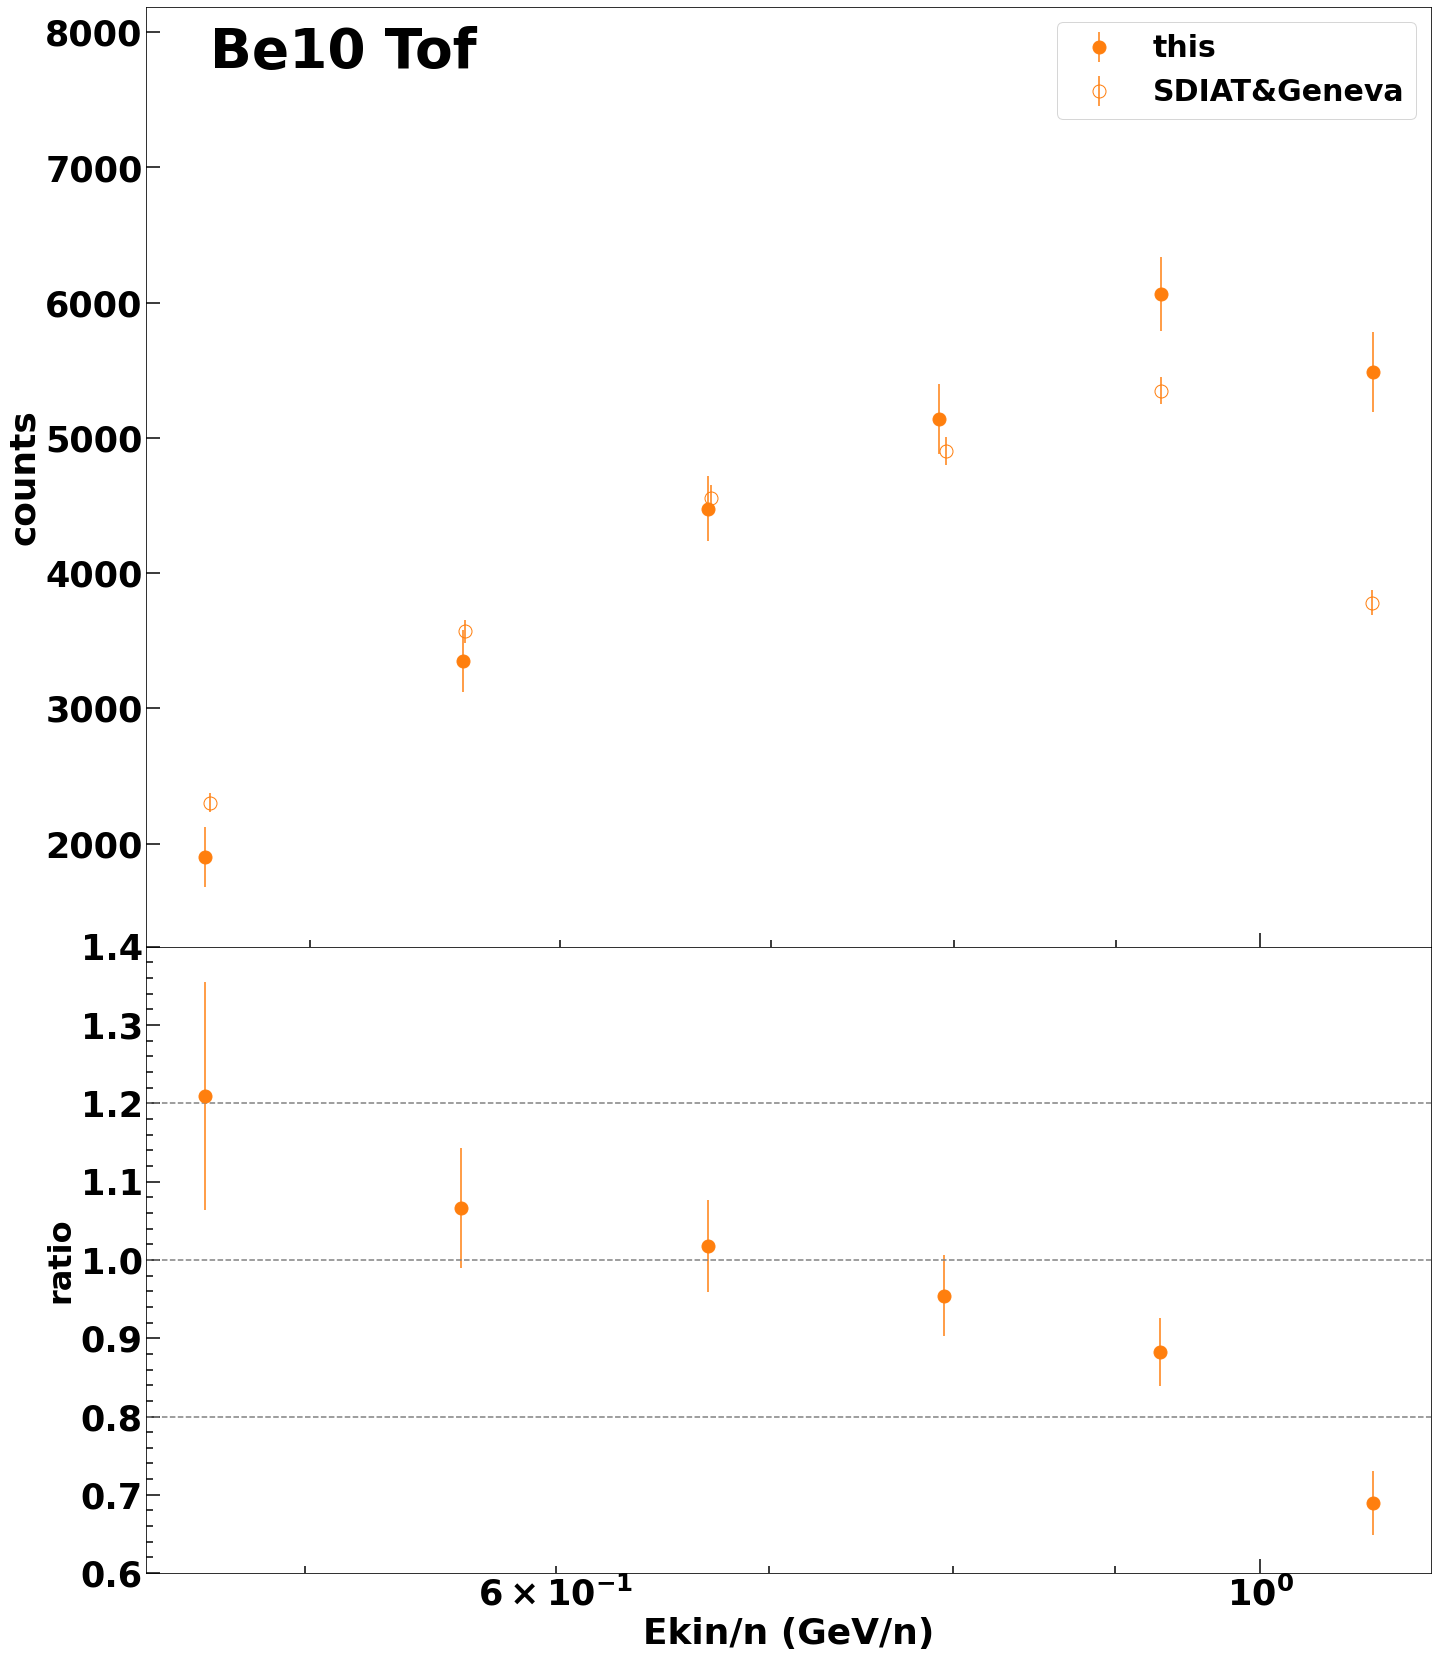

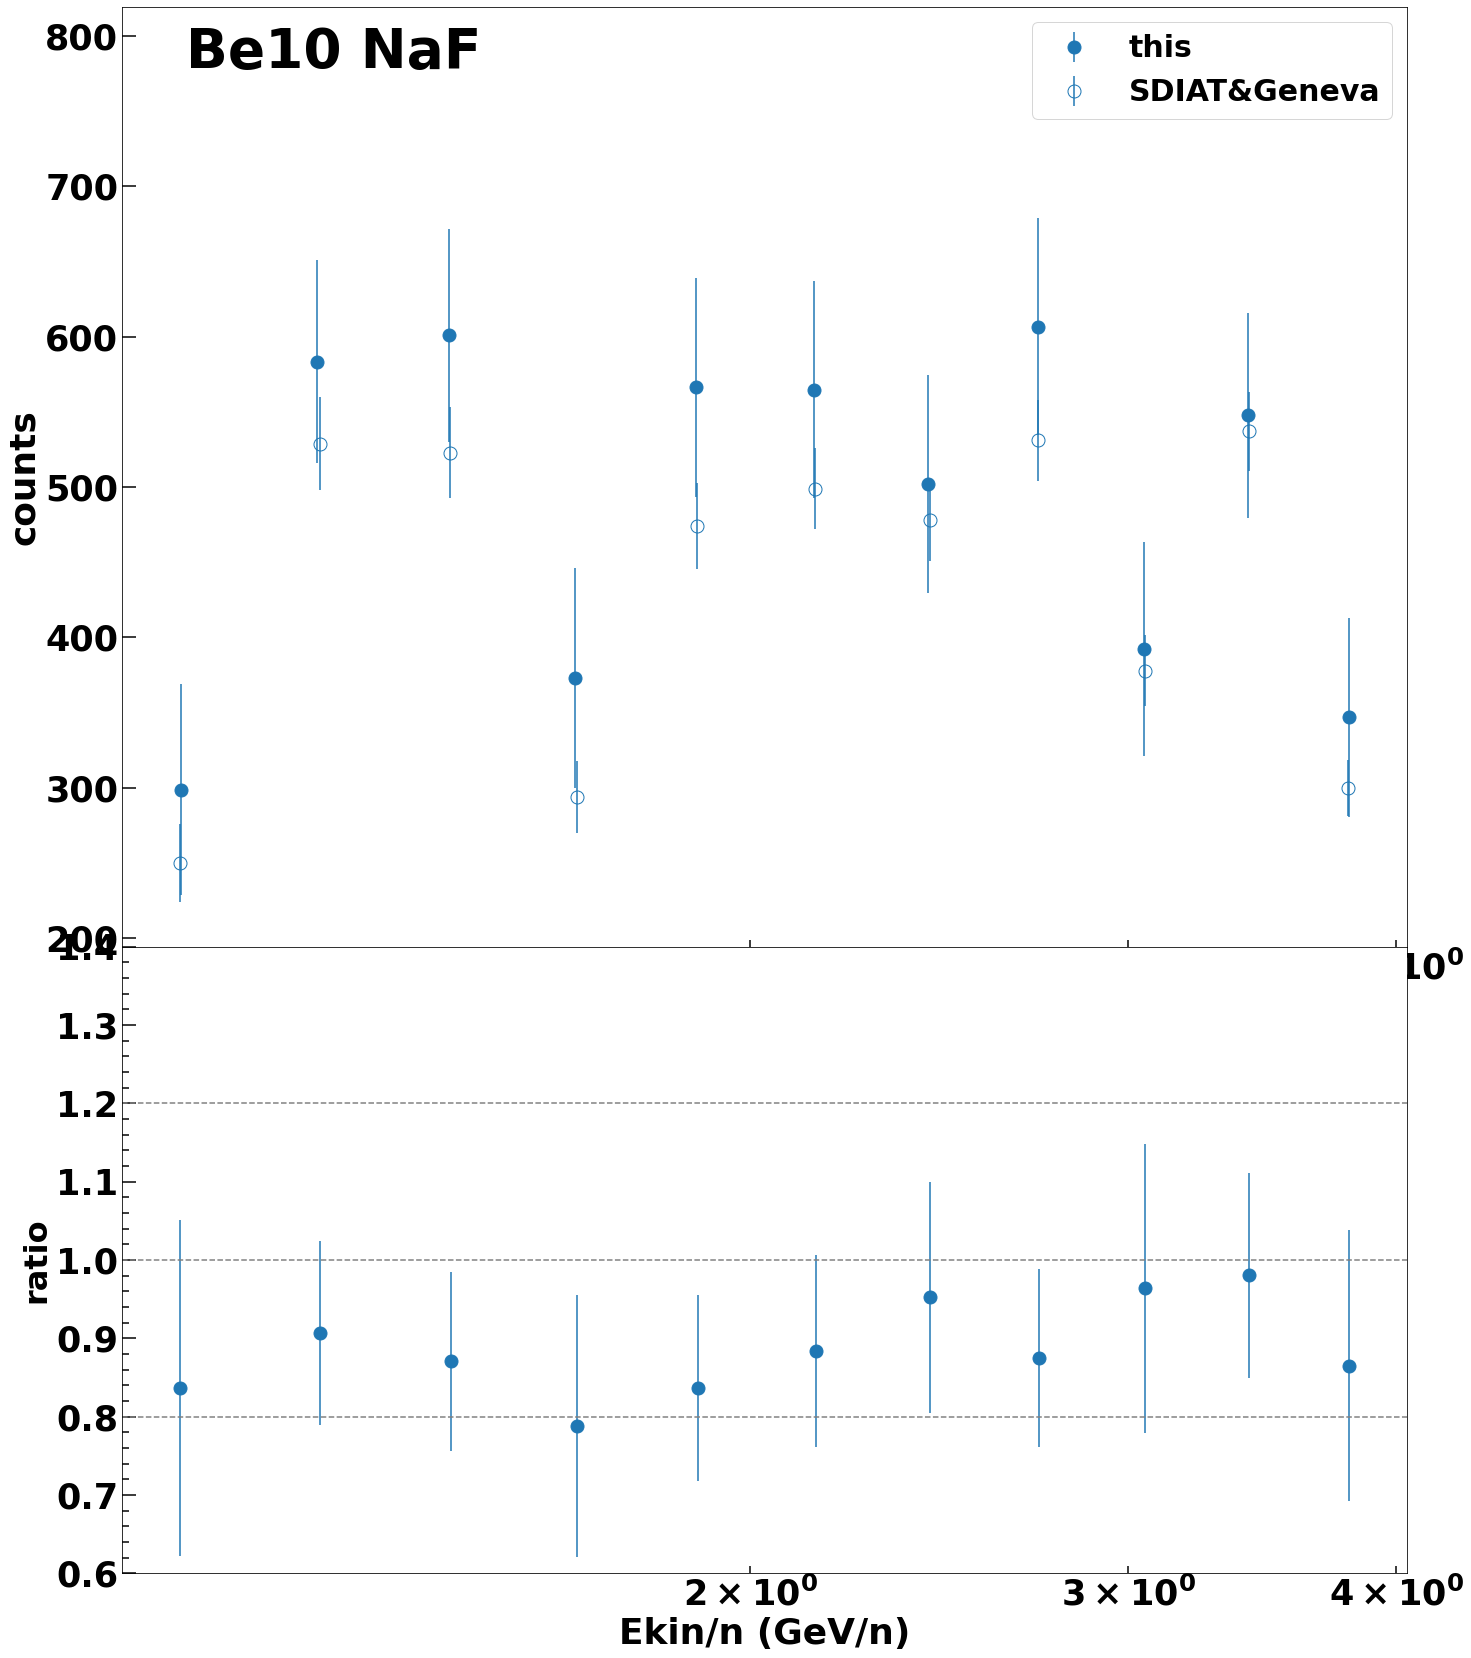

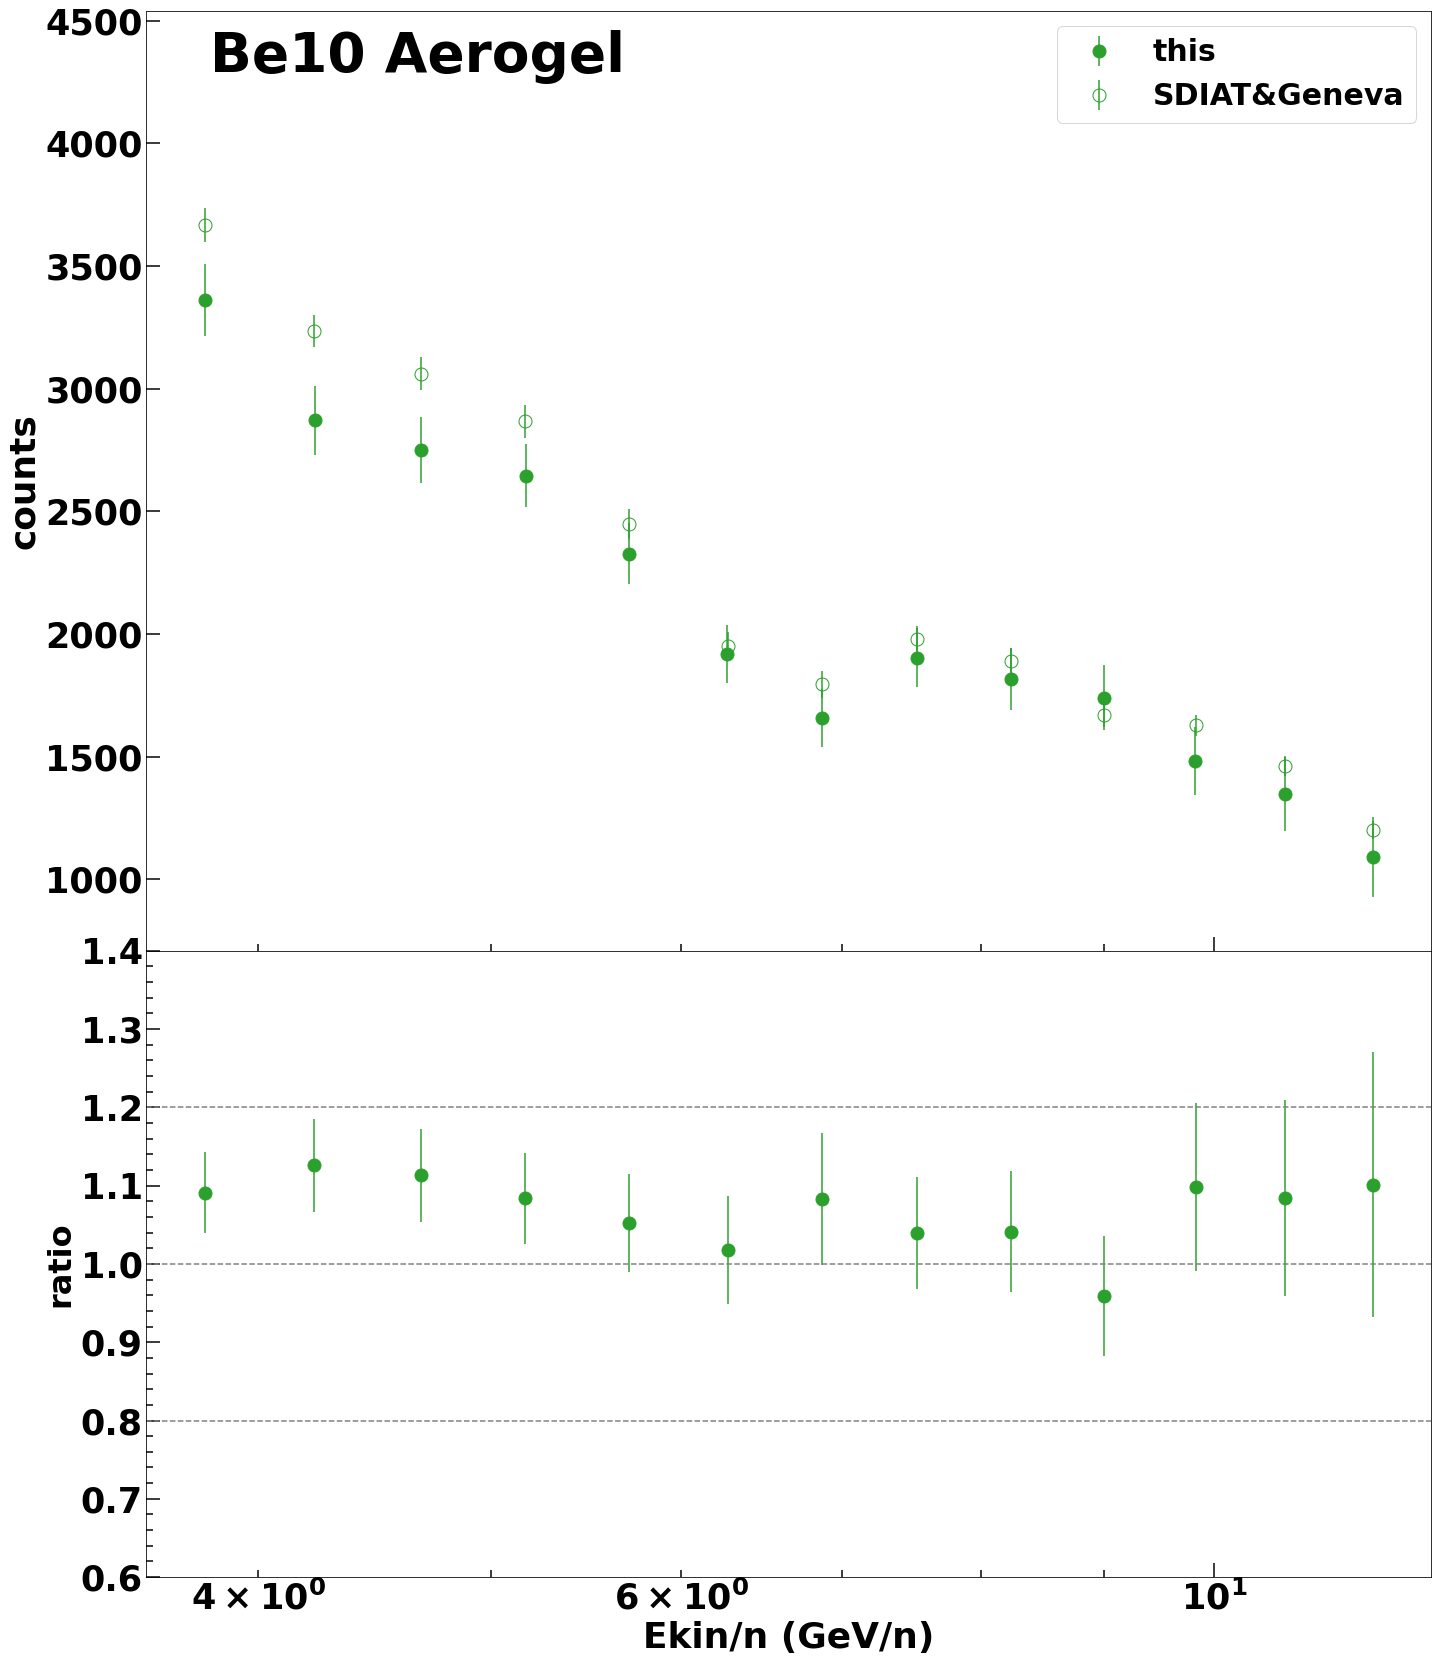

In [176]:
figsize1 = (21, 25)
fontsize1 = 45
fontsize2 = 55
mksize = 26
filename_compare = '/home/manbing/Documents/Data/jiahui/MC_Events/BeMC_histmass_vsekin_jiahuicommsel_test.npz'
#filename_init = '/home/manbing/Documents/Data/data_mc/dfile/BeMC_dict_hist_mass_ekin.npz'
graph_counts_jiahui = {dec: dict() for dec in detectors}                                                                                                                                                    
for dec in detectors:                                                                                                                                                                                       
    jiahui_counts_file =  pd.read_csv(f"/home/manbing/Documents/Data/jiahui/isotope_fluxes/Event_Counts_from_Fit/nevt_{detectors_alias[dec]}_10yr.txt",  sep='\s+', header=0)                               
    for iso in isotopes:                                                                                                                                                                            
        xjiahuicounts = 0.5*(jiahui_counts_file['Ek_low'] + jiahui_counts_file['Ek_high'])                                                                                                                  
        graph_counts_jiahui[dec][iso] = MGraph(xjiahuicounts, jiahui_counts_file[f'TBe7_N{iso}'], np.sqrt(jiahui_counts_file[f'T{iso}_N{iso}']))   

df_counts = np.load(f'{file_counts}')
#df_counts_compare = np.load(f'{filename_init}')
figSize = (22, 15)
graph_counts_fromfit_fix = {dec: {} for dec in detectors}
graph_counts_sum = dict()
graph_counts_compare = {dec: {} for dec in detectors}
graph_counts_sum_compare = dict()
hist_mass2d = {dec: {} for dec in detectors}
xbinning = Binning(fbinning_energy())
ax2ylinemin = {'Be7': 0.97, 'Be9': 0.95, 'Be10':0.8}
ax2ylinemax = {'Be7': 1.03, 'Be9': 1.05, 'Be10':1.2}
for dec in detectors:
    for iso in isotopes:
        graph_counts_fromfit_fix[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}OptBe7_{iso}")
        #graph_counts_fromfit_fix[dec][iso] = slice_graph_by_value(graph_counts_fromfit_fix[dec][iso], slicevalue[dec])
        #hist_mass2d[dec][iso] = WeightedHistogram.from_file(df_counts_compare, f"{iso}MC_{dec}_mass")
        #graph_counts_compare[dec][iso] = MGraph(xbinning.bin_centers[1:-1], np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1), np.sqrt(np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1)))
        #graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f'{dec}_{iso}MC_counts')
        xstart = graph_counts_fromfit_fix[dec][iso].xvalues[0]
        xend = graph_counts_fromfit_fix[dec][iso].xvalues[-1]
        graph_counts_compare[dec][iso] = slice_graph_by_value(graph_counts_jiahui[dec][iso], np.array([xstart, xend]))
        if iso == "Be7":
            graph_counts_sum[dec] = graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_compare[dec][iso]
        else:
            graph_counts_sum[dec] = graph_counts_sum[dec] + graph_counts_fromfit_fix[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_sum_compare[dec] + graph_counts_compare[dec][iso]
      
    

for iso in isotopes: 
    for dec in detectors:
        fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=figsize1)                                                                                                            
        fig.subplots_adjust(left= 0.12, right=0.97, bottom=0.08, top=0.95) 
        plot_graph(fig, ax1, graph_counts_fromfit_fix[dec][iso], color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=mksize, label=f'this')  
        plot_graph(fig, ax1, graph_counts_compare[dec][iso], color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=mksize, label='SDIAT&Geneva', markerfacecolor="none") 
        #if dec == "Agl" and iso == "Be9":                                                                                                                                                            
        #    print(dec, iso)                                                                                                                                                                          
        #    print(graph_counts_fromfit_fix[dec][iso])  
        graph_ratio = graph_counts_compare[dec][iso]/graph_counts_fromfit_fix[dec][iso]
        plot_graph(fig, ax2, graph_ratio, color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=mksize, label=f'{dec}')  
       
        #ax2.grid(axis='y')
        ax2.set_xlabel('Ekin/n (GeV/n)') 
        ax1.legend(loc="upper right", fontsize=30) 
        ax1.set_xticklabels([])
        plt.subplots_adjust(hspace=.0)   
        #ax1.get_yticklabels()[0].set_visible(False)
        ax1.set_ylabel('counts')

        ax1.legend(loc="upper right", fontsize=30) 
        ax1.set_xticklabels([])

        plt.subplots_adjust(hspace=.0)   
        ax1.set_xscale('log')
        ax2.set_xscale('log')
        ax2.set_ylabel('ratio', fontsize=32)
        if iso == "Be7":
            ax2.set_ylim([0.9, 1.1])
        elif iso == 'Be9':
            ax2.set_ylim([0.8, 1.2])
        else:
            ax2.set_ylim([0.6, 1.4])
            
        ax2.axhline(y=1, color='grey', linestyle='--')
        ax2.axhline(y=ax2ylinemin[iso], color='grey', linestyle='--')
        ax2.axhline(y=ax2ylinemax[iso], color='grey', linestyle='--')
        ax1.set_ylim([0.65 * min(graph_counts_fromfit_fix[dec][iso].yvalues), 1.35* max(graph_counts_fromfit_fix[dec][iso].yvalues)])
        #ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #ax2.set_xticks(np.array([2, 4, 10]))
        ax1.text(0.05, 0.98, f"{iso} {DETECTOR_LABEL[dec]}", fontsize=fontsize2, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", weight='bold')    
        #ax1.text(0.5, 0.9, f'{iso}', fontsize=30, verticplalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black')
        plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate0410/plots_0410'
        
        savefig_tofile(fig, plotfile, f"counts_fromfit_TBe7N{iso}_{dec}_tunedmcv1", show=True) 

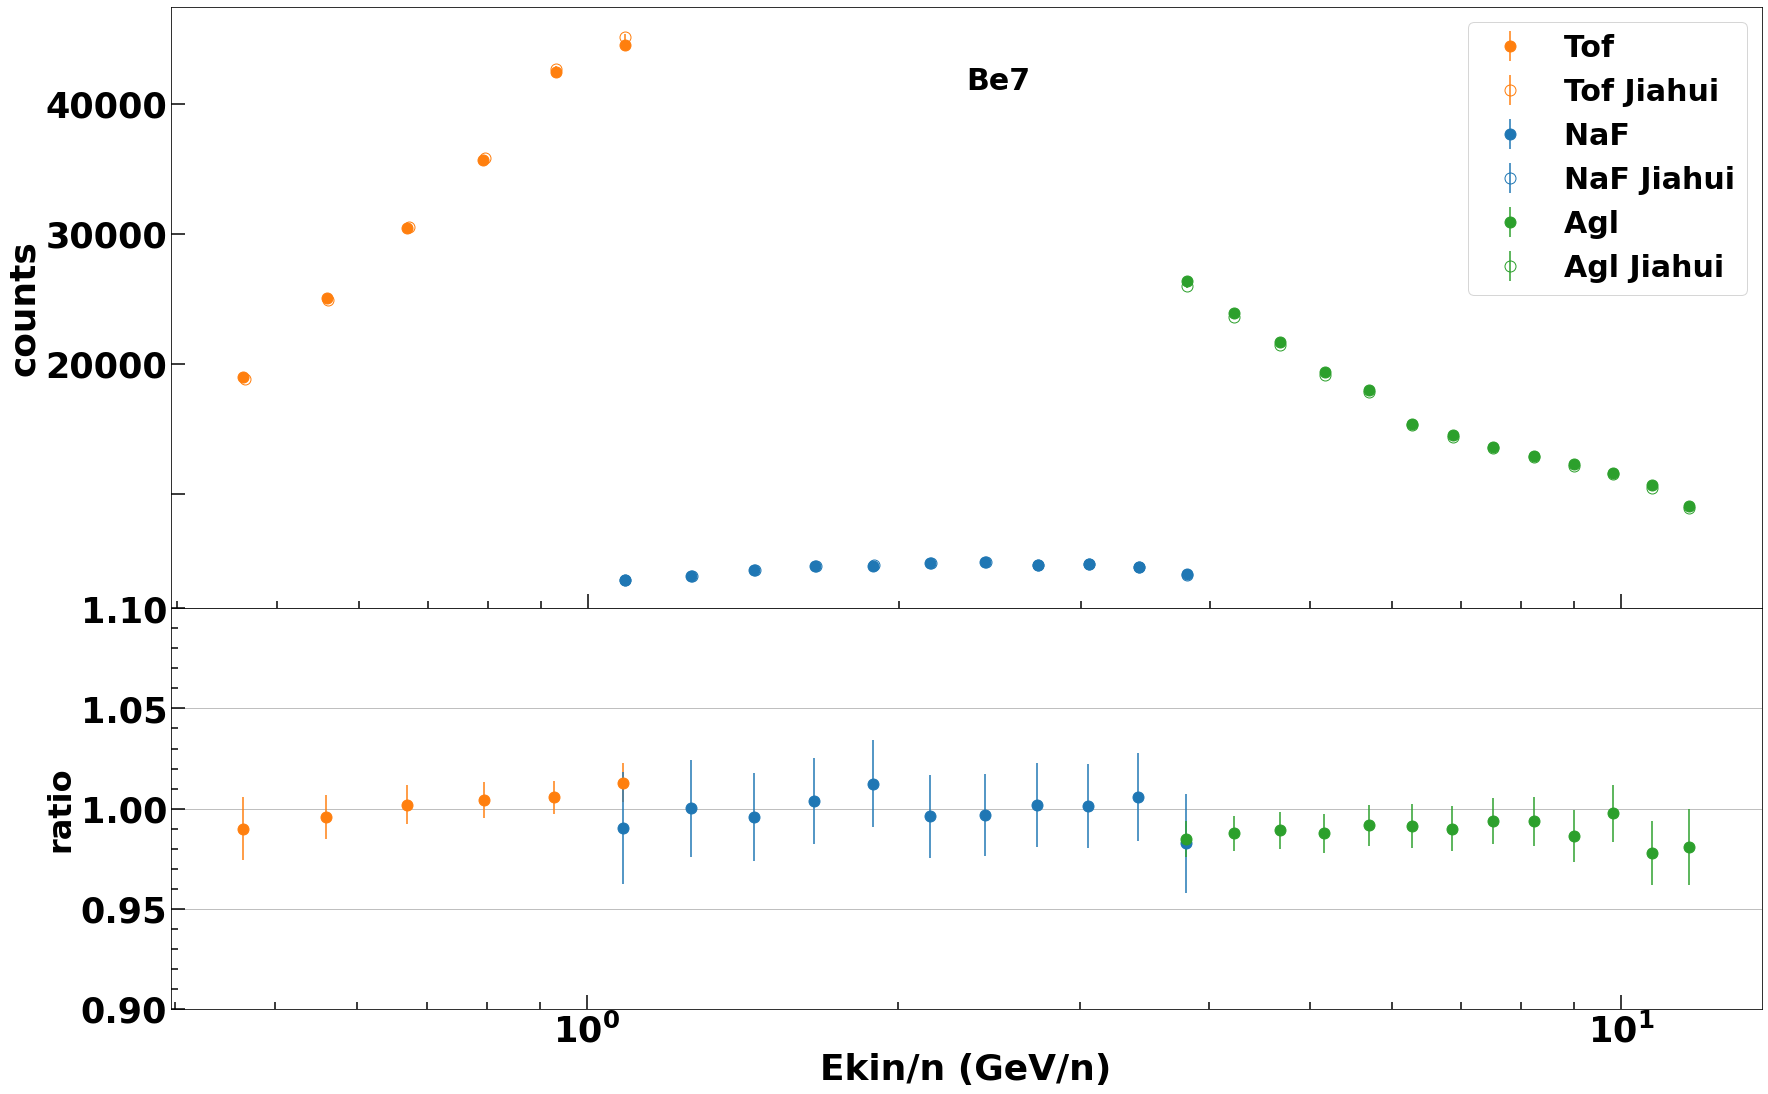

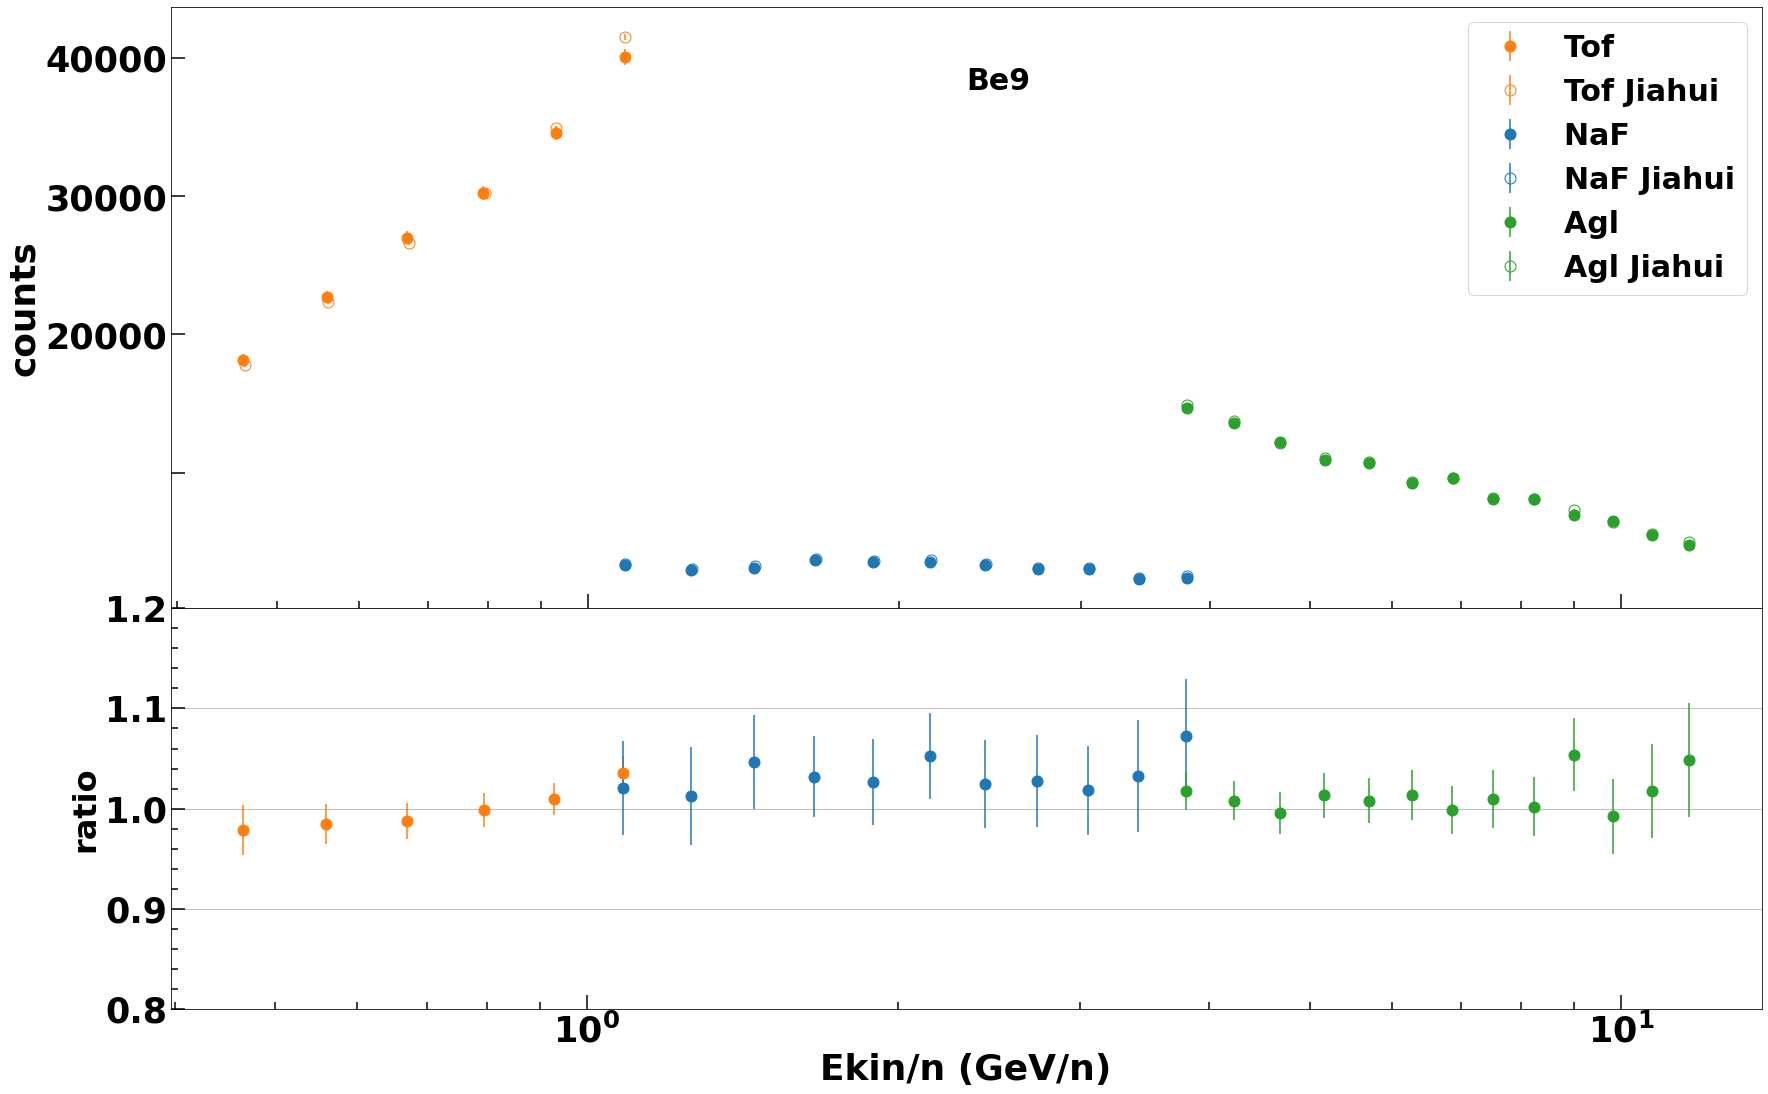

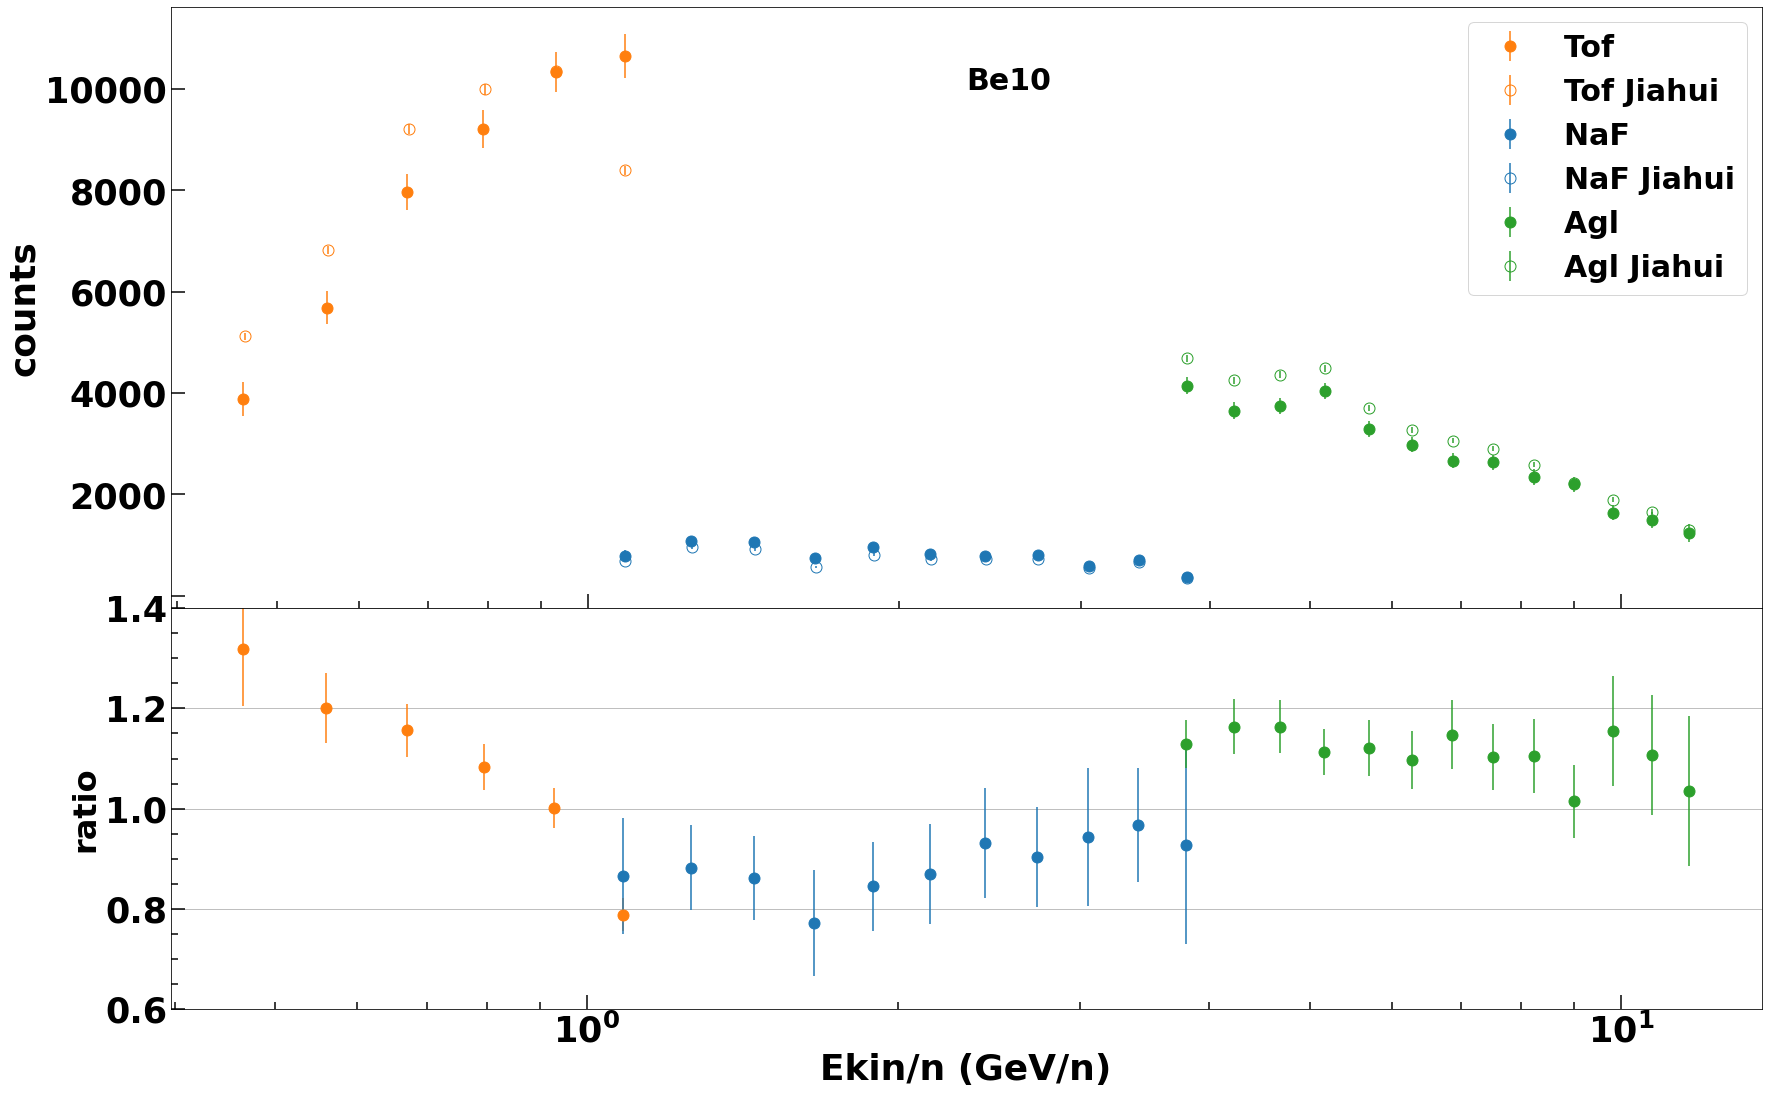

In [177]:
filename_compare = '/home/manbing/Documents/Data/jiahui/MC_Events/BeMC_histmass_vsekin_jiahuicommsel_test.npz'
#filename_init = '/home/manbing/Documents/Data/data_mc/dfile/BeMC_dict_hist_mass_ekin.npz'
graph_counts_jiahui = {dec: dict() for dec in detectors}                                                                                                                                                    
for dec in detectors:                                                                                                                                                                                       
    jiahui_counts_file =  pd.read_csv(f"/home/manbing/Documents/Data/jiahui/isotope_fluxes/Event_Counts_from_Fit/nevt_{detectors_alias[dec]}_10yr.txt",  sep='\s+', header=0)                               
    for iso in isotopes:                                                                                                                                                                            
        xjiahuicounts = 0.5*(jiahui_counts_file['Ek_low'] + jiahui_counts_file['Ek_high'])                                                                                                                  
        graph_counts_jiahui[dec][iso] = MGraph(xjiahuicounts, jiahui_counts_file[f'T{iso}_N{iso}'], np.sqrt(jiahui_counts_file[f'T{iso}_N{iso}']))   

df_counts = np.load(f'{file_counts}')
#df_counts_compare = np.load(f'{filename_init}')
figSize = (22, 15)
graph_counts_fromfit_Opt = {dec: {} for dec in detectors}
graph_counts_sum = dict()
graph_counts_compare = {dec: {} for dec in detectors}
graph_counts_sum_compare = dict()
hist_mass2d = {dec: {} for dec in detectors}
xbinning = Binning(fbinning_energy())
for dec in detectors:
    for iso in isotopes:
        graph_counts_fromfit_Opt[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}Opt{iso}_{iso}")
        #graph_counts_fromfit_Opt[dec][iso] = slice_graph_by_value(graph_counts_fromfit_Opt[dec][iso], slicevalue[dec])
        #hist_mass2d[dec][iso] = WeightedHistogram.from_file(df_counts_compare, f"{iso}MC_{dec}_mass")
        #graph_counts_compare[dec][iso] = MGraph(xbinning.bin_centers[1:-1], np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1), np.sqrt(np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1)))
        #graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f'{dec}_{iso}MC_counts')
        xstart = graph_counts_fromfit_Opt[dec][iso].xvalues[0]
        xend = graph_counts_fromfit_Opt[dec][iso].xvalues[-1]
        graph_counts_compare[dec][iso] = slice_graph_by_value(graph_counts_jiahui[dec][iso], np.array([xstart, xend]))
        if iso == "Be7":
            graph_counts_sum[dec] = graph_counts_fromfit_Opt[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_compare[dec][iso]
        else:
            graph_counts_sum[dec] = graph_counts_sum[dec] + graph_counts_fromfit_Opt[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_sum_compare[dec] + graph_counts_compare[dec][iso]
            
for iso in isotopes: 
    fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(26, 16))                                                                                                            
    fig.subplots_adjust(left= 0.12, right=0.97, bottom=0.08, top=0.95) 
    for dec in detectors:
        plot_graph(fig, ax1, graph_counts_fromfit_Opt[dec][iso], color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{dec} ')  
        plot_graph(fig, ax1, graph_counts_compare[dec][iso], color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{dec} Jiahui', markerfacecolor="none") 
        #if dec == "Agl" and iso == "Be9":                                                                                                                                                            
        #    print(dec, iso)                                                                                                                                                                          
        #    print(graph_counts_fromfit_Opt[dec][iso])  
        graph_ratio = graph_counts_compare[dec][iso]/graph_counts_fromfit_Opt[dec][iso]
        plot_graph(fig, ax2, graph_ratio, color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=22, label=f'{dec}')  
       
    ax2.grid(axis='y')
    ax2.set_xlabel('Ekin/n (GeV/n)') 
    ax1.legend(loc="upper right", fontsize=30) 
    ax1.set_xticklabels([])
    plt.subplots_adjust(hspace=.0)   
    ax1.get_yticklabels()[0].set_visible(False)
    ax1.set_ylabel('counts')

    ax1.legend(loc="upper right", fontsize=30) 
    ax1.set_xticklabels([])

    plt.subplots_adjust(hspace=.0)   
    ax1.get_yticklabels()[0].set_visible(False)
    ax1.set_xscale('log')
    ax2.set_xscale('log')
    ax2.set_ylabel('ratio', fontsize=32)
    if iso == "Be7":
        ax2.set_ylim([0.9, 1.1])
    elif iso == 'Be9':
        ax2.set_ylim([0.8, 1.2])
    else:
        ax2.set_ylim([0.6, 1.4])
    #ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #ax2.set_xticks(np.array([2, 4, 10]))
    ax1.text(0.5, 0.9, f'{iso}', fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black')
    savefig_tofile(fig, plotdir, f"counts_fromfit_T{iso}N{iso}_{fig_suffix}", show=True) 

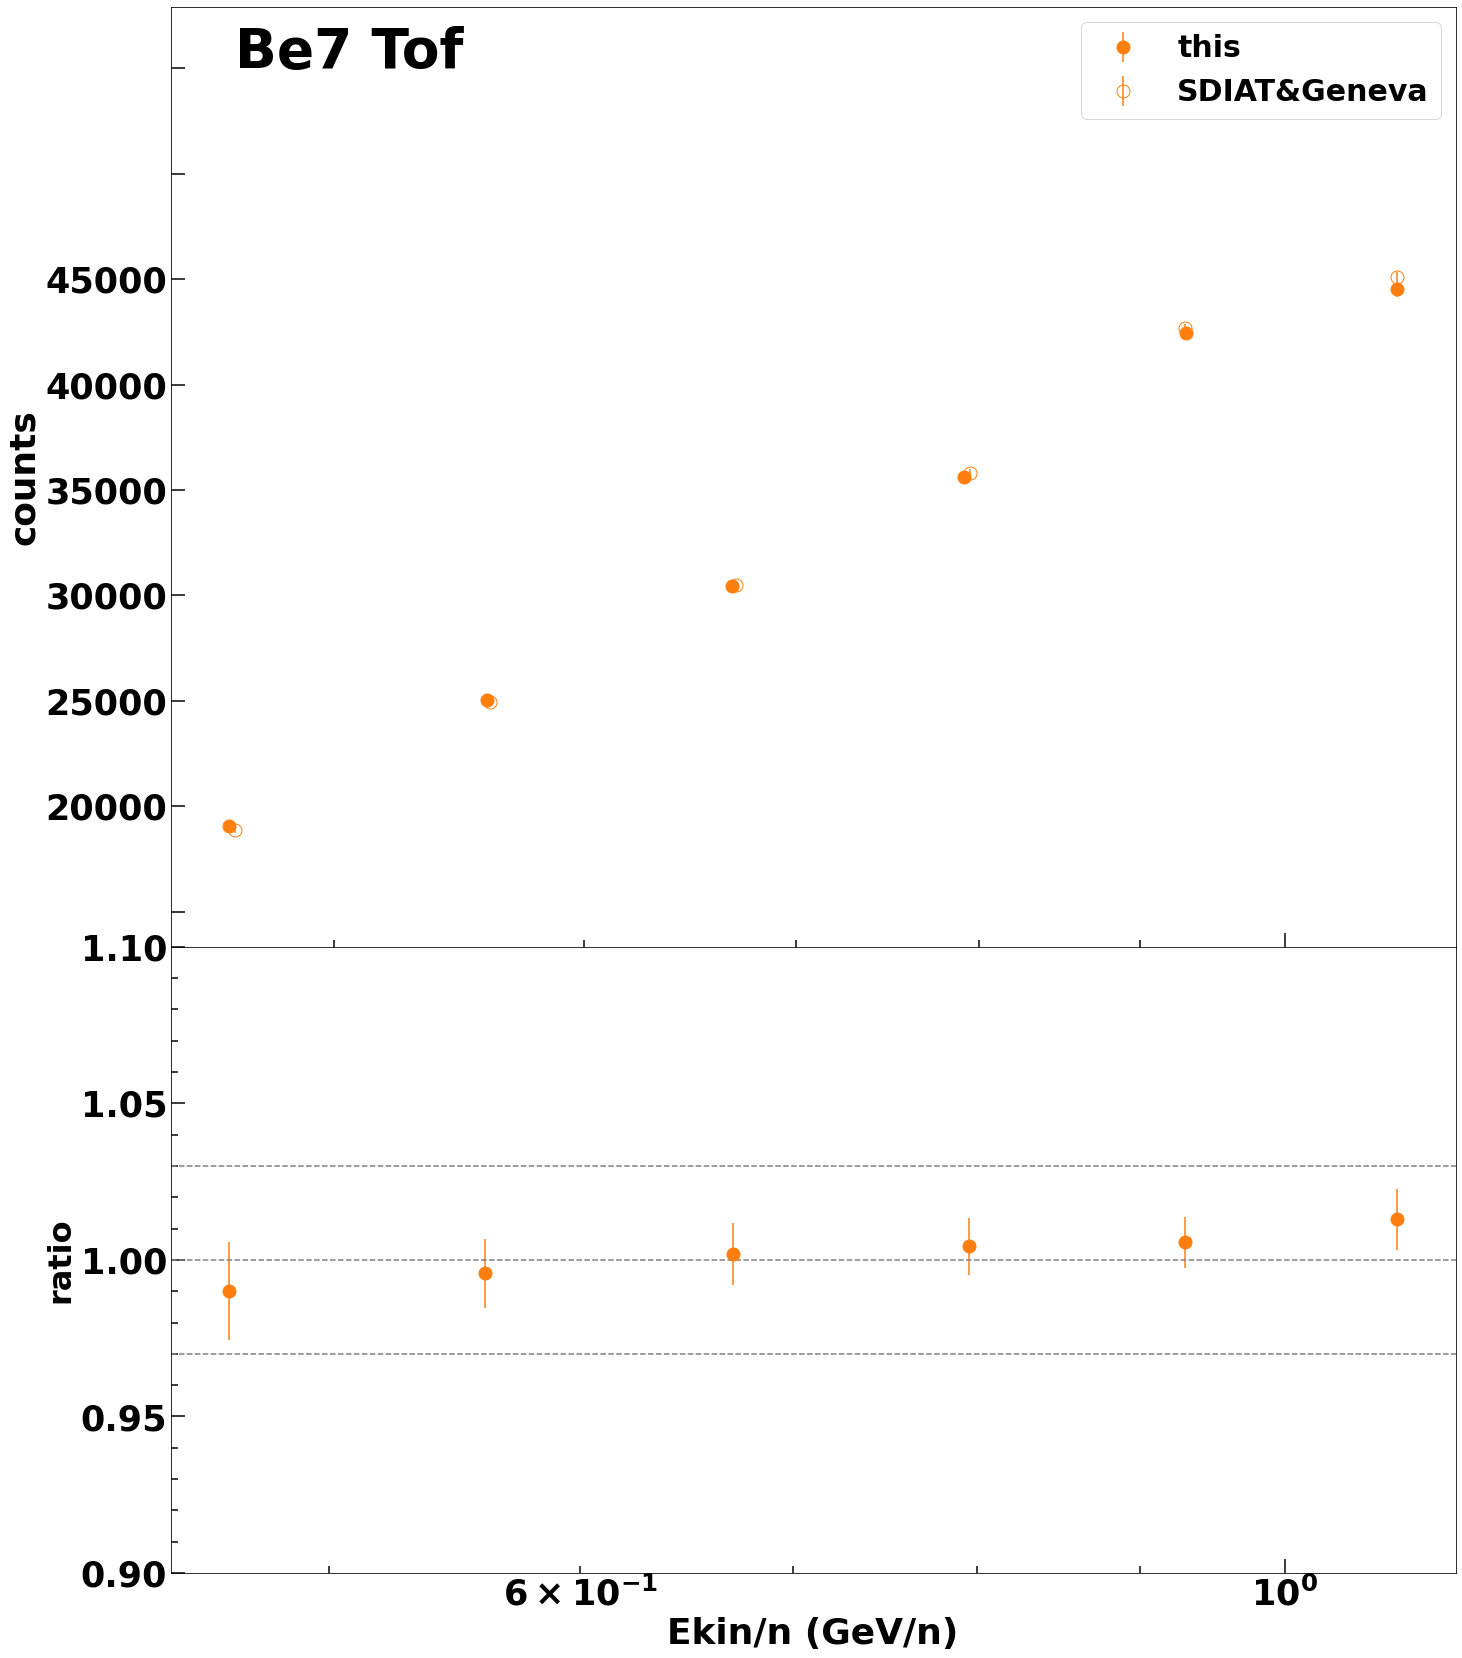

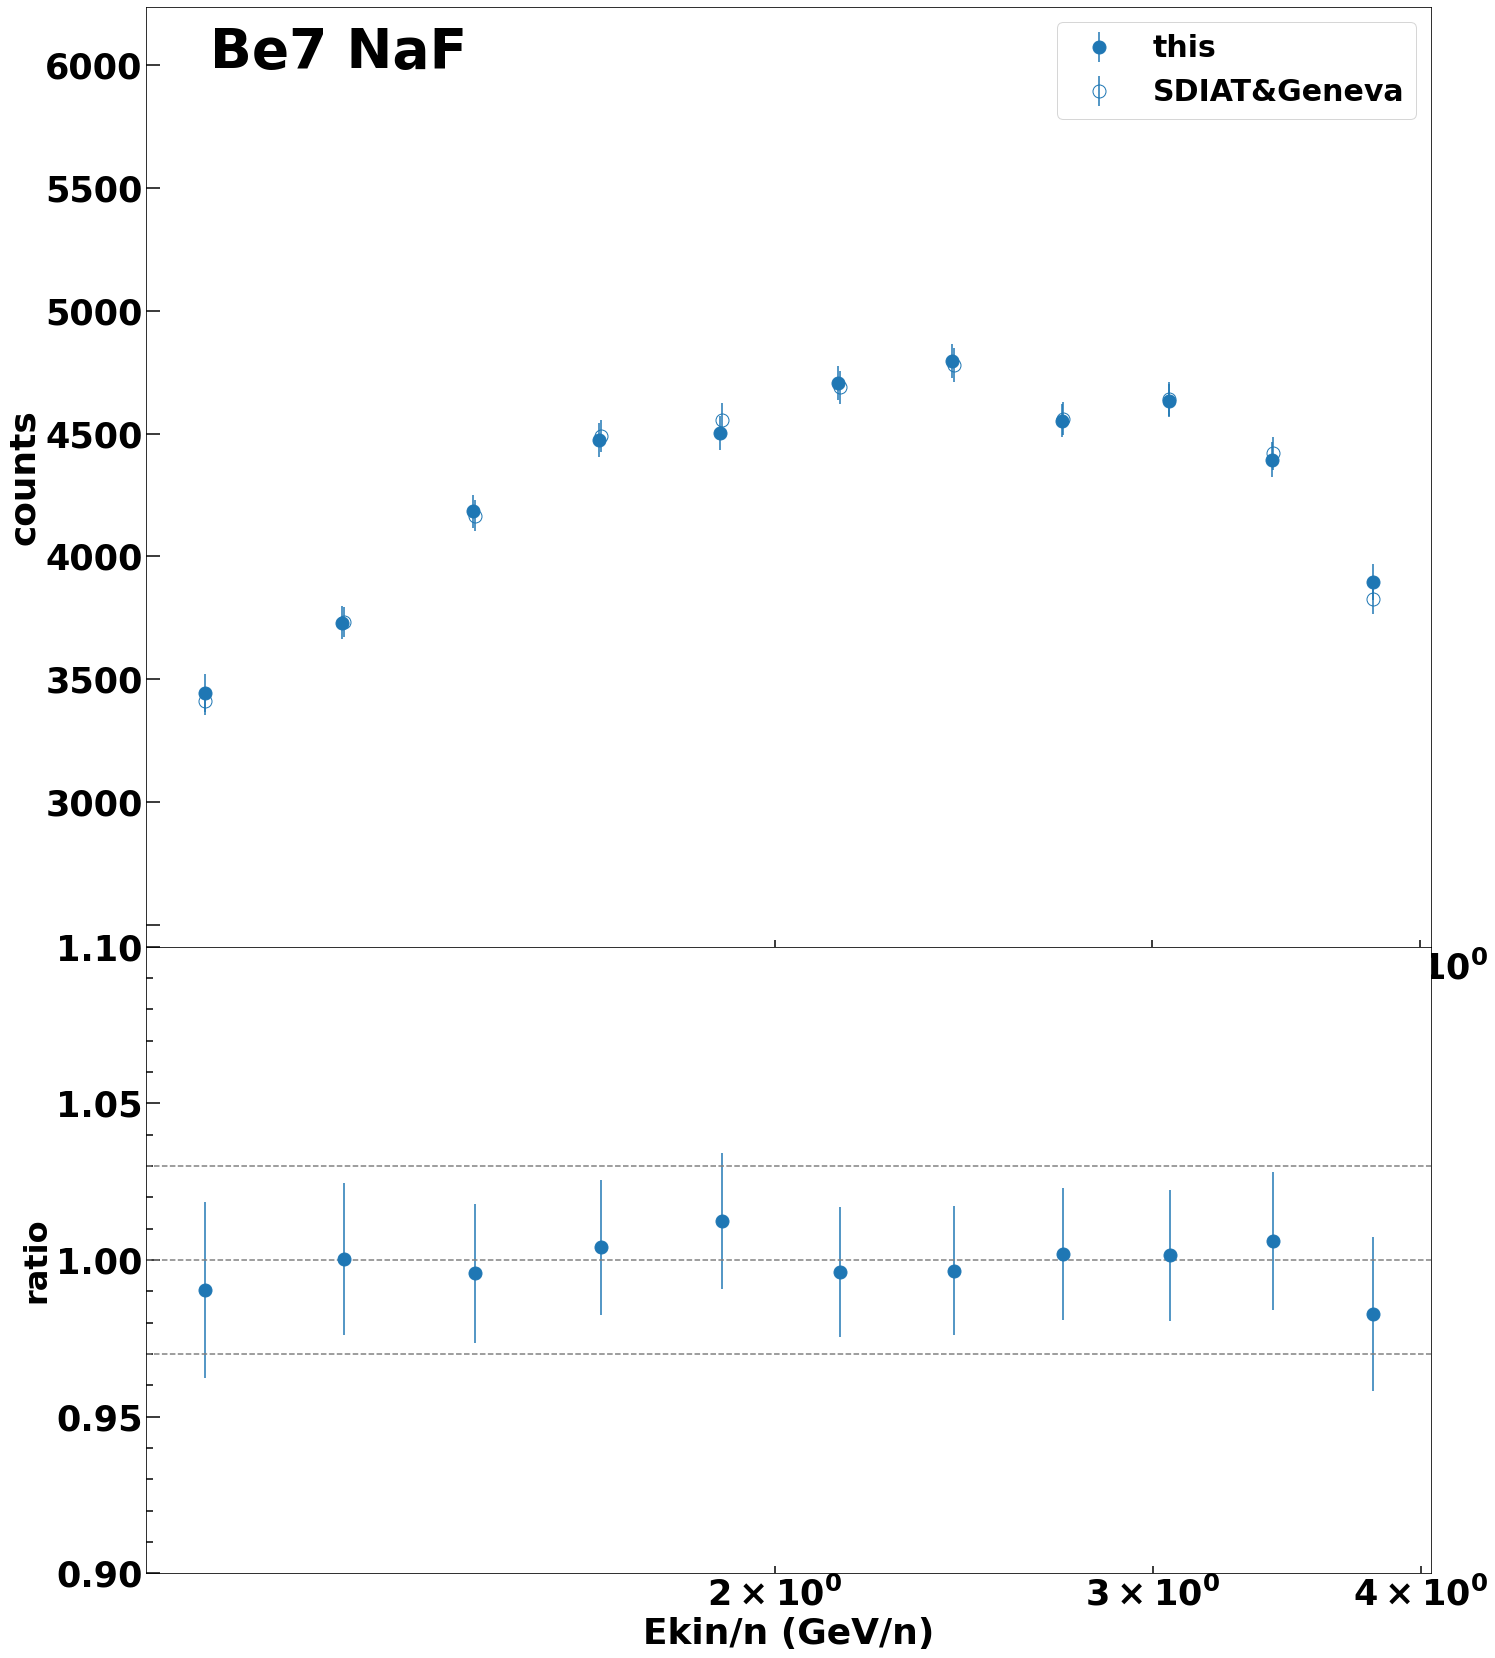

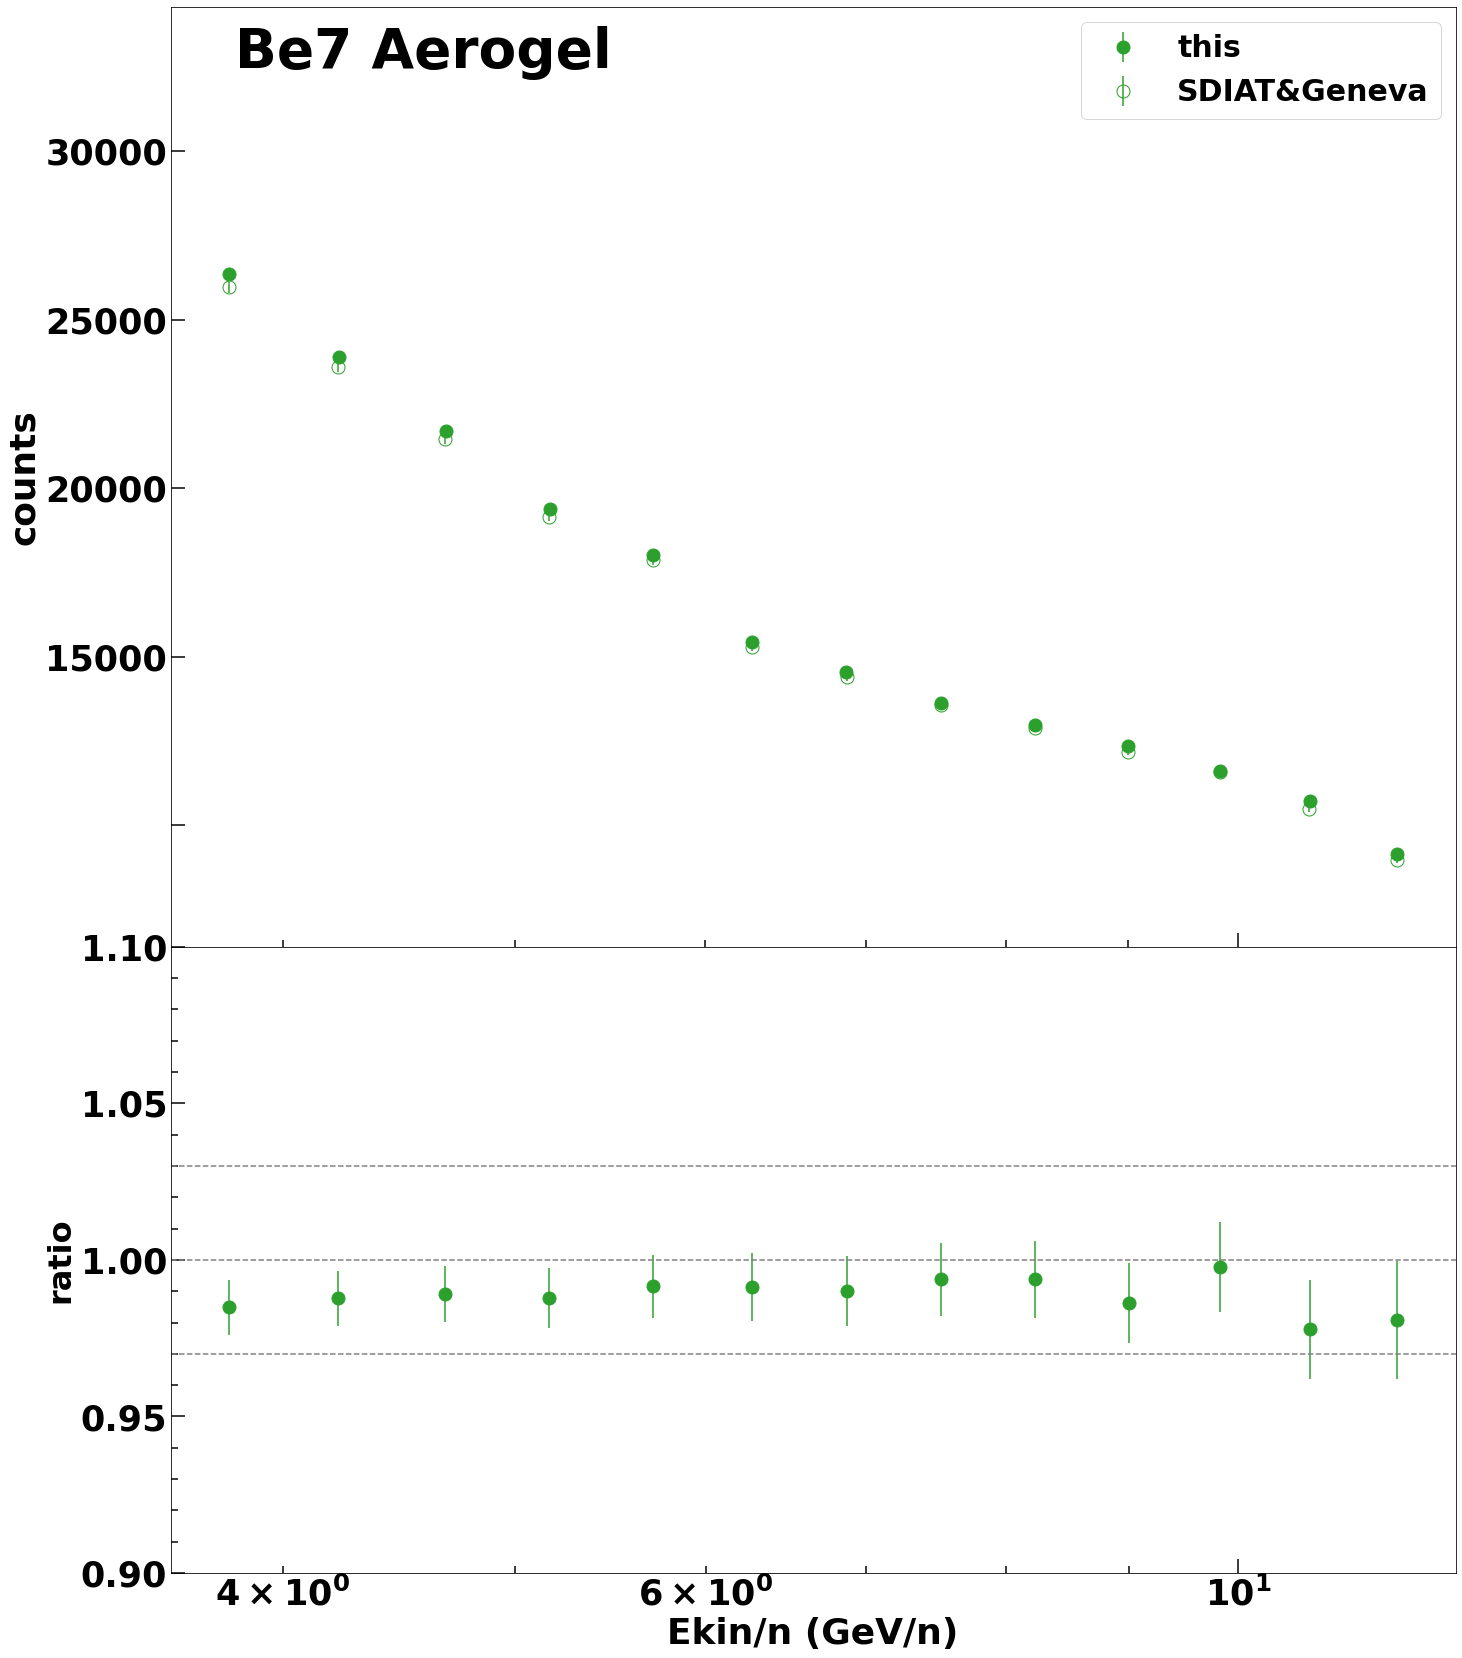

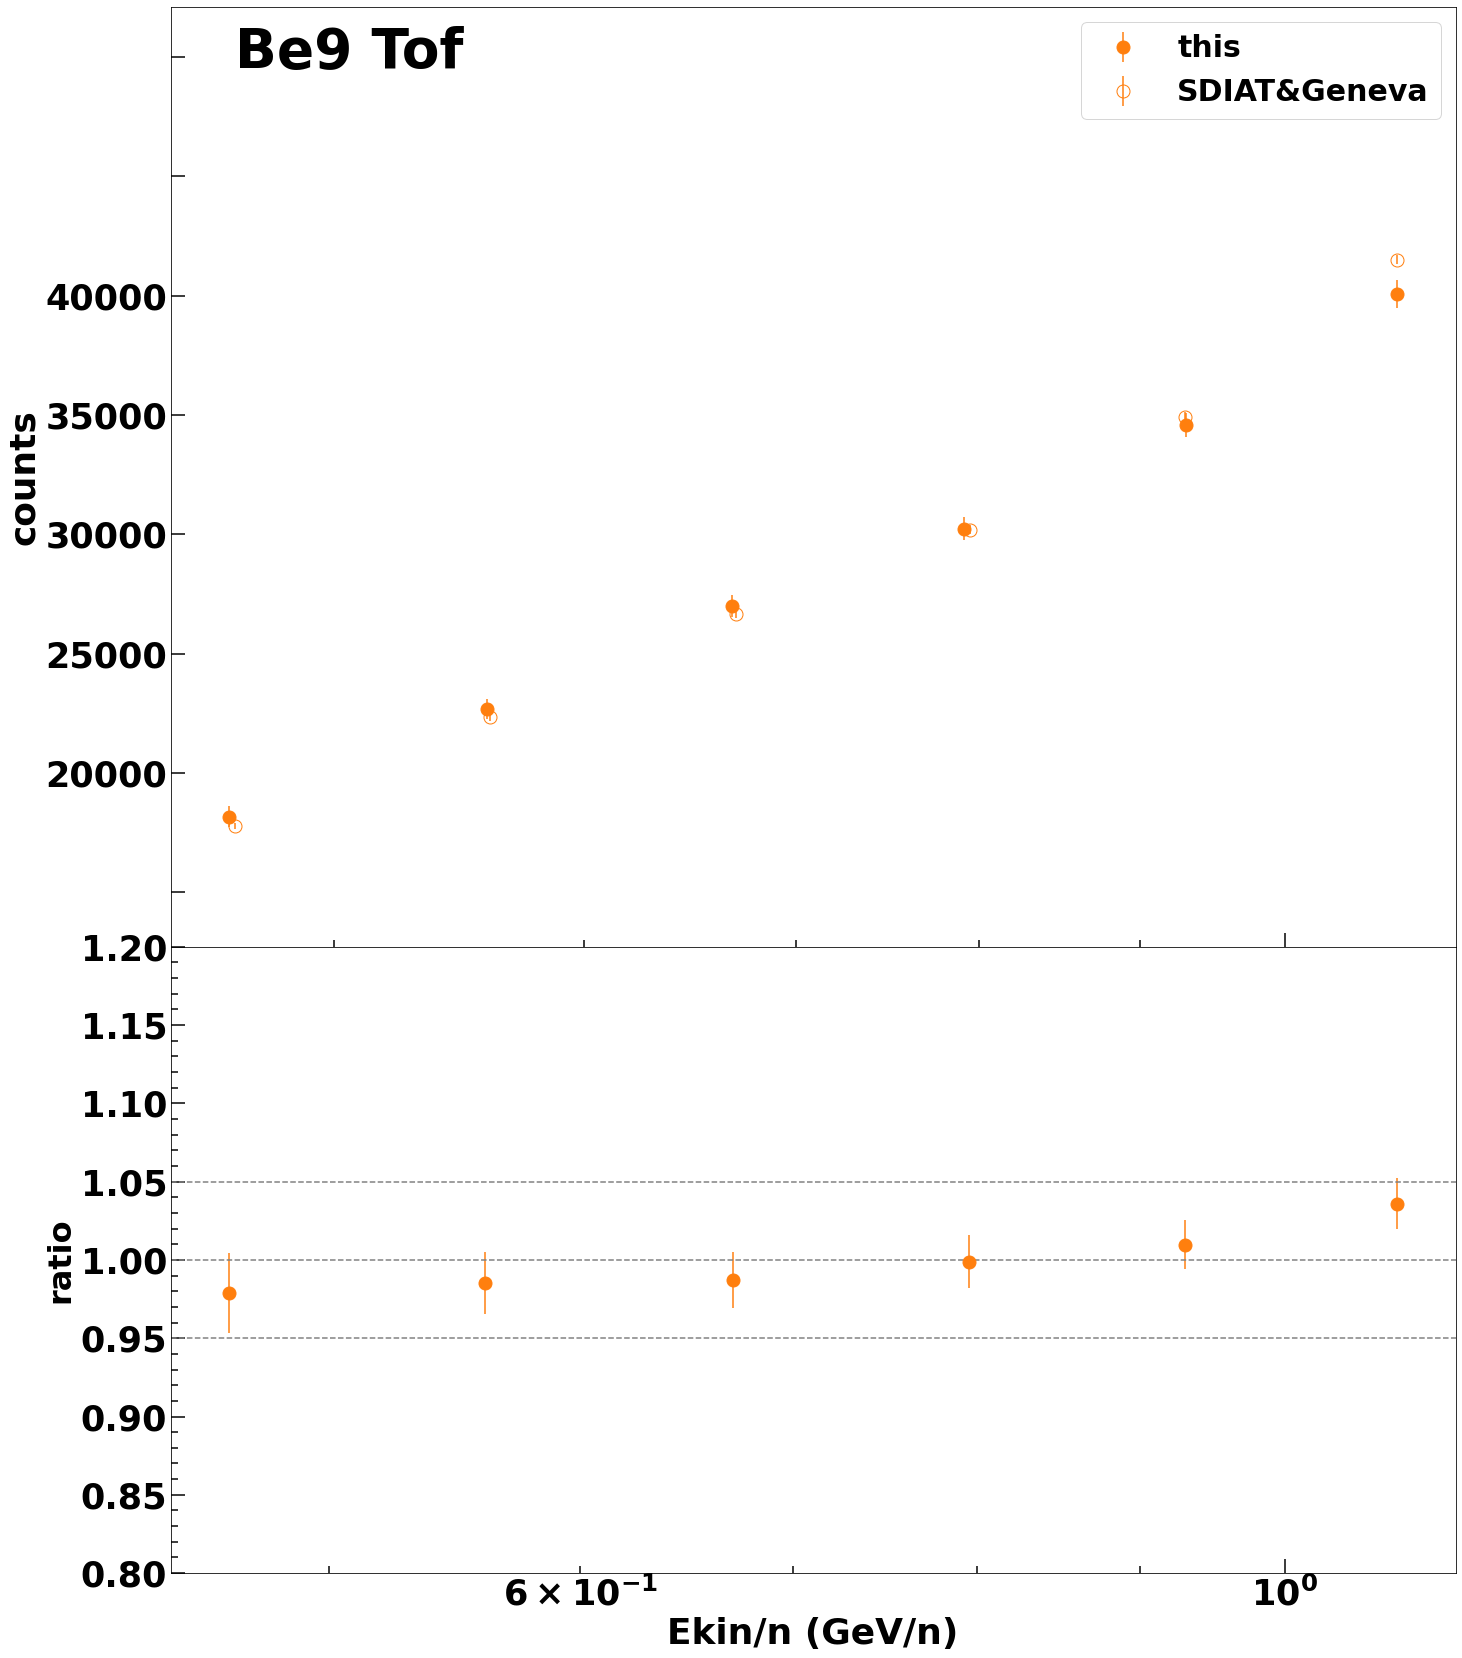

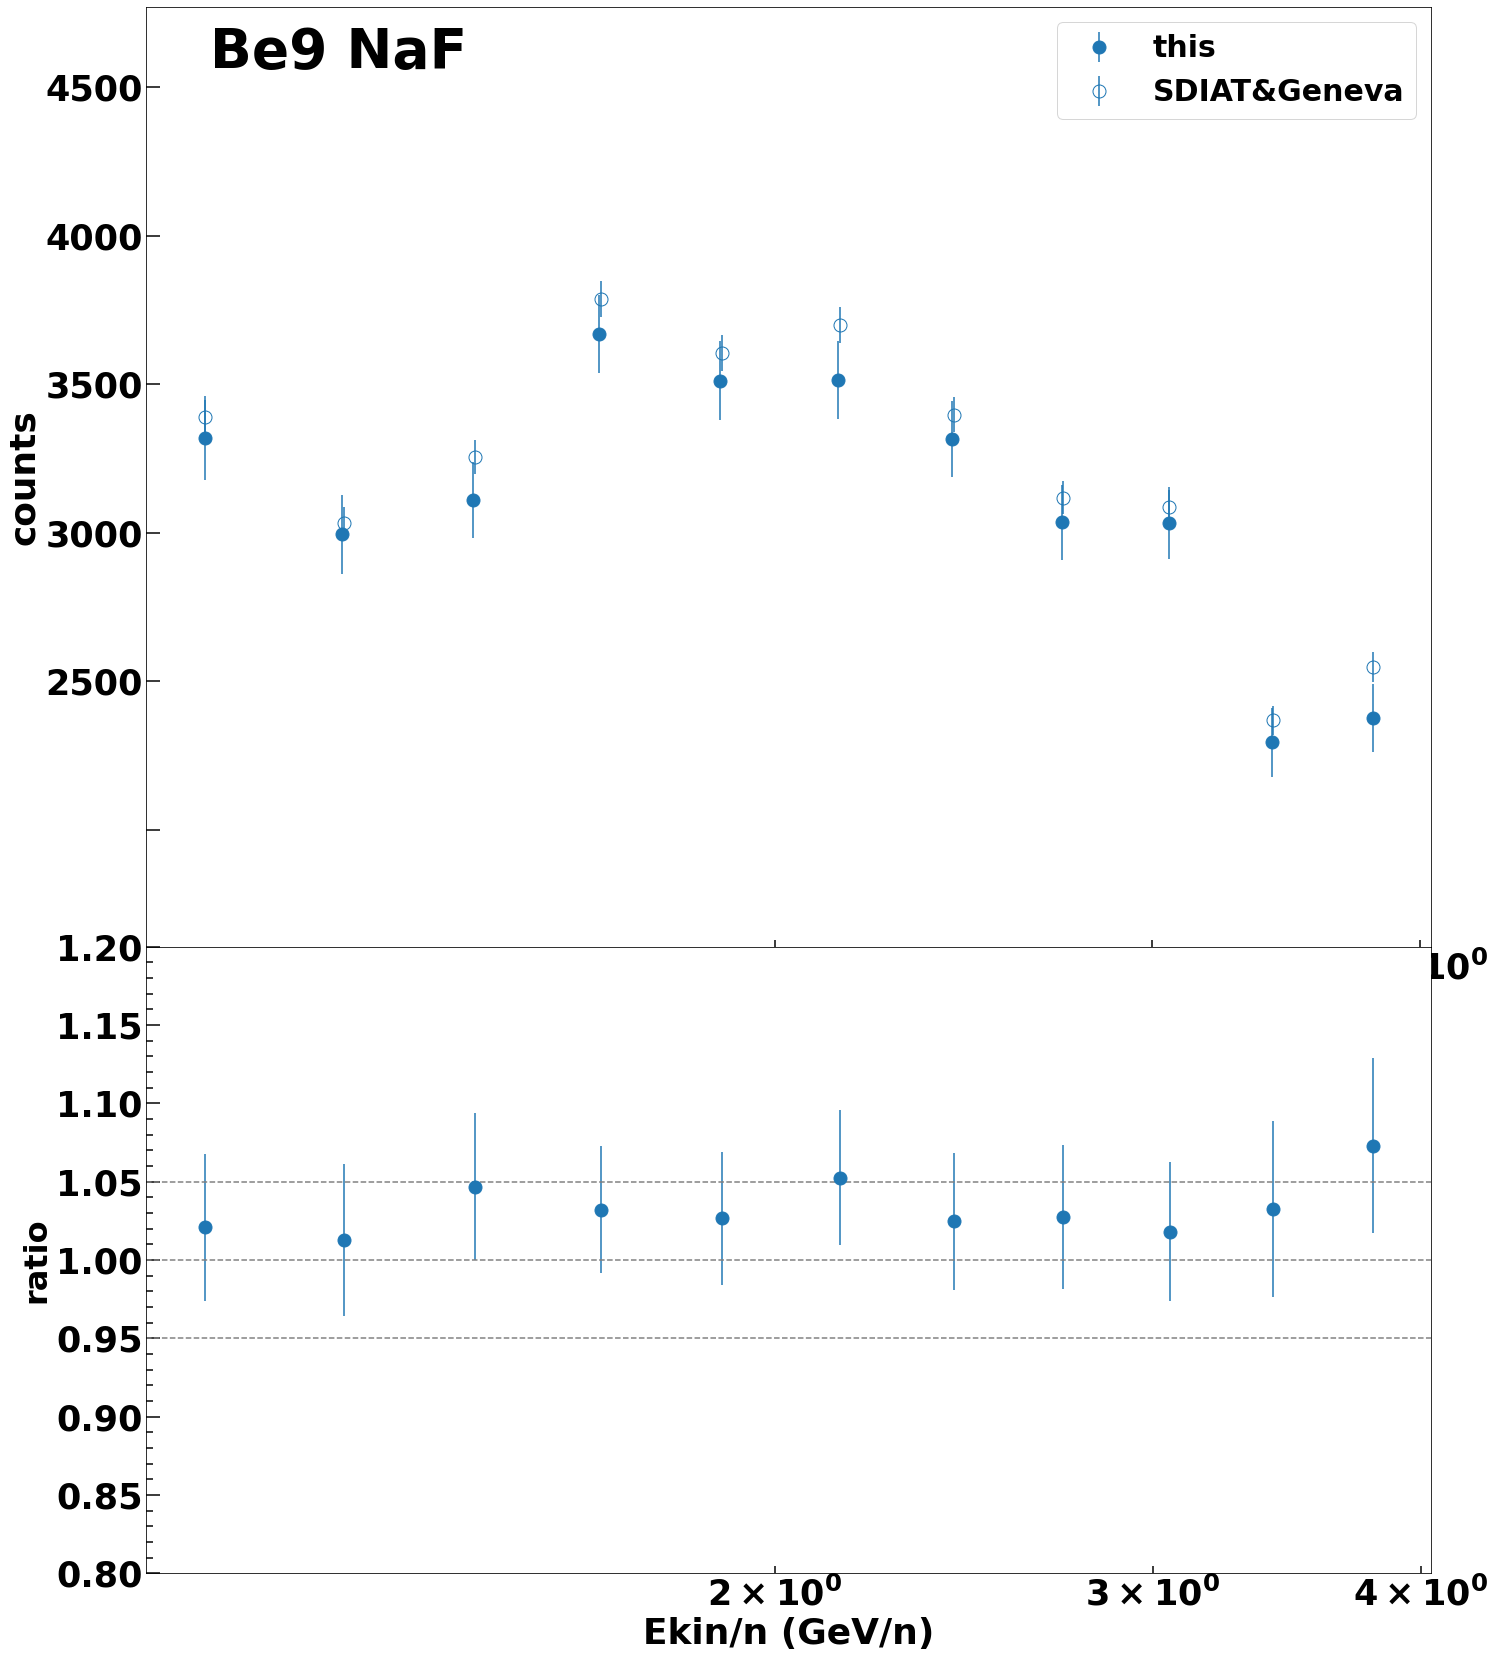

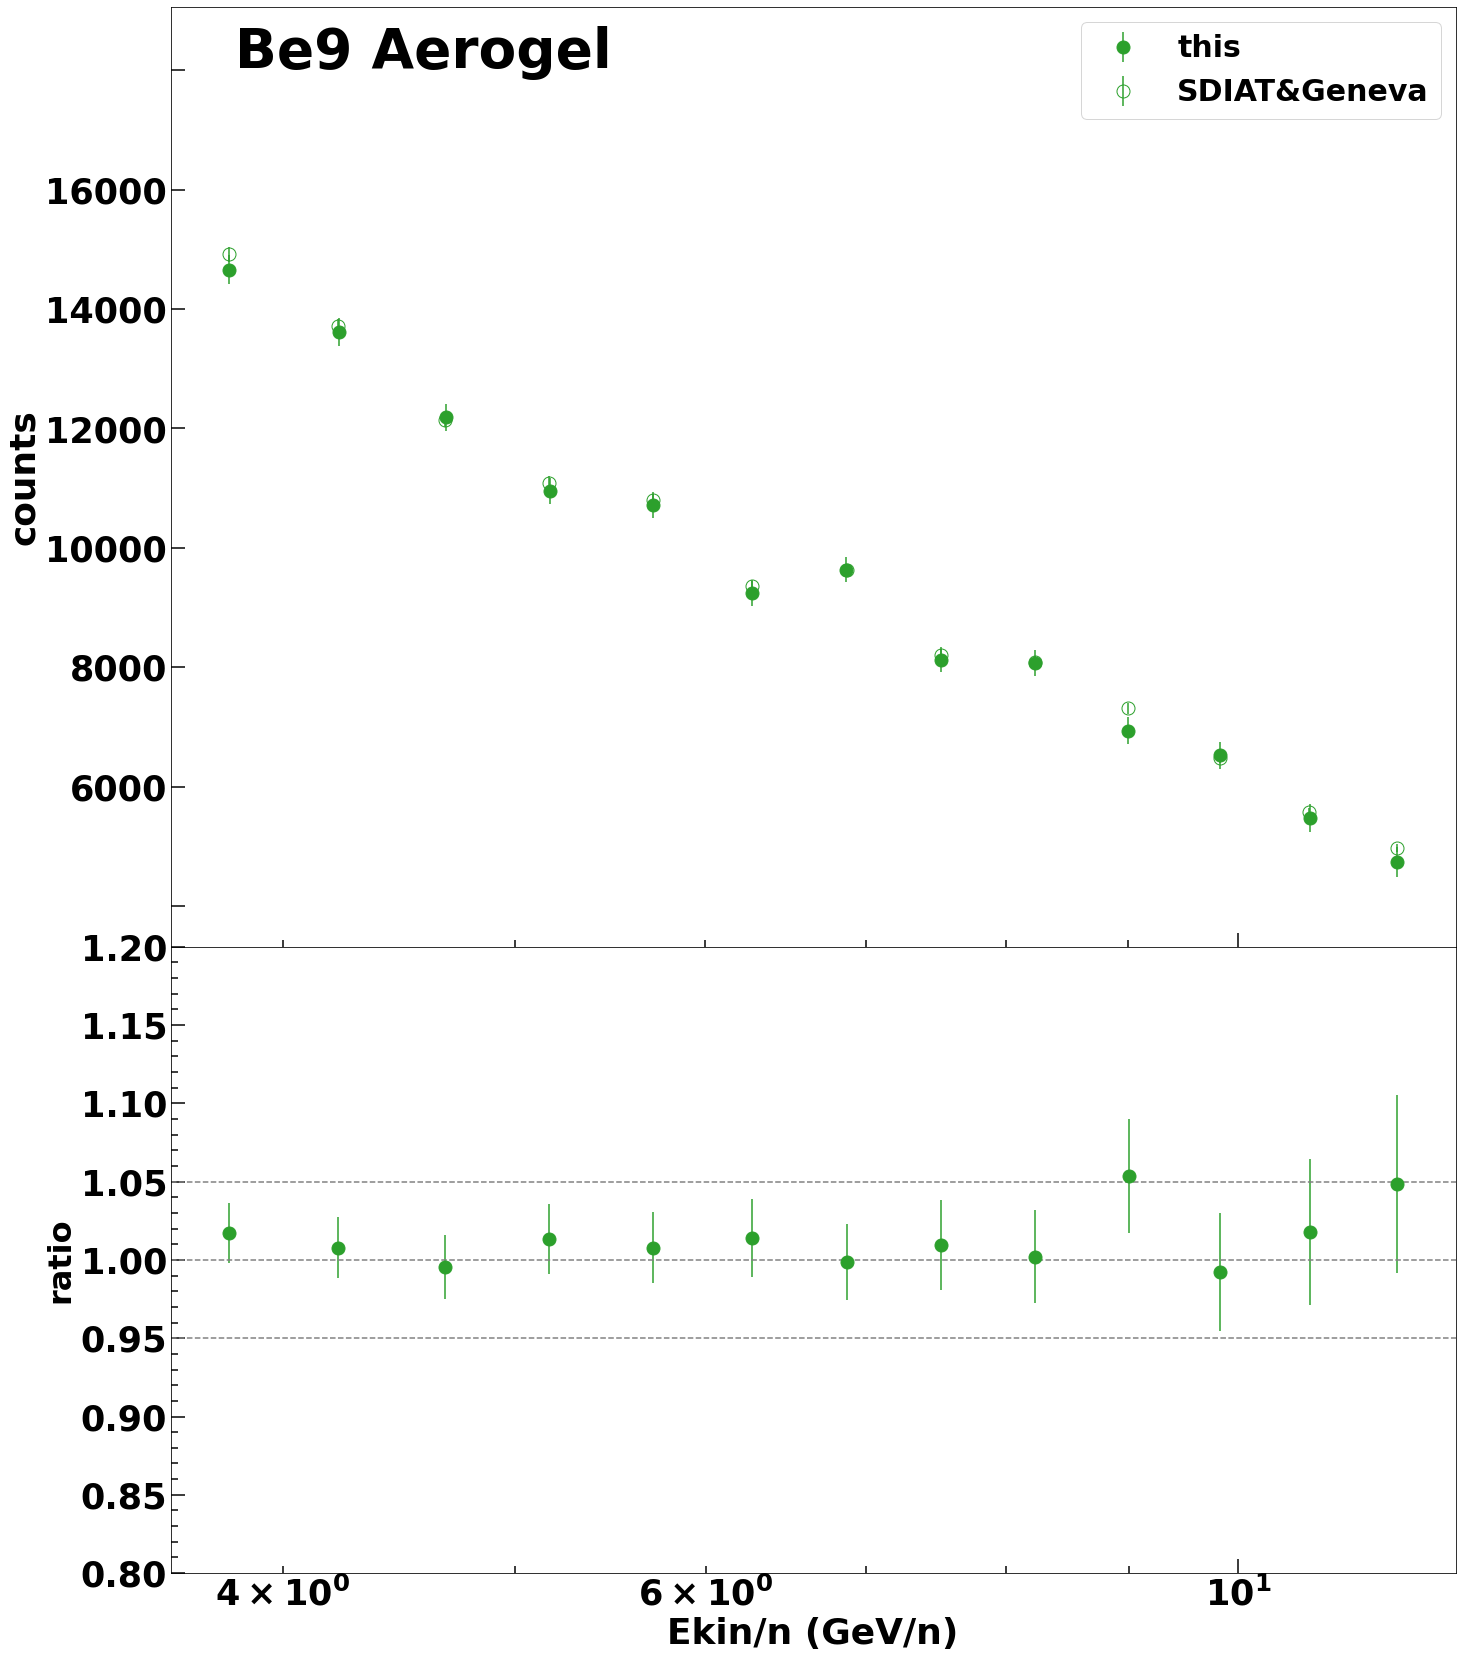

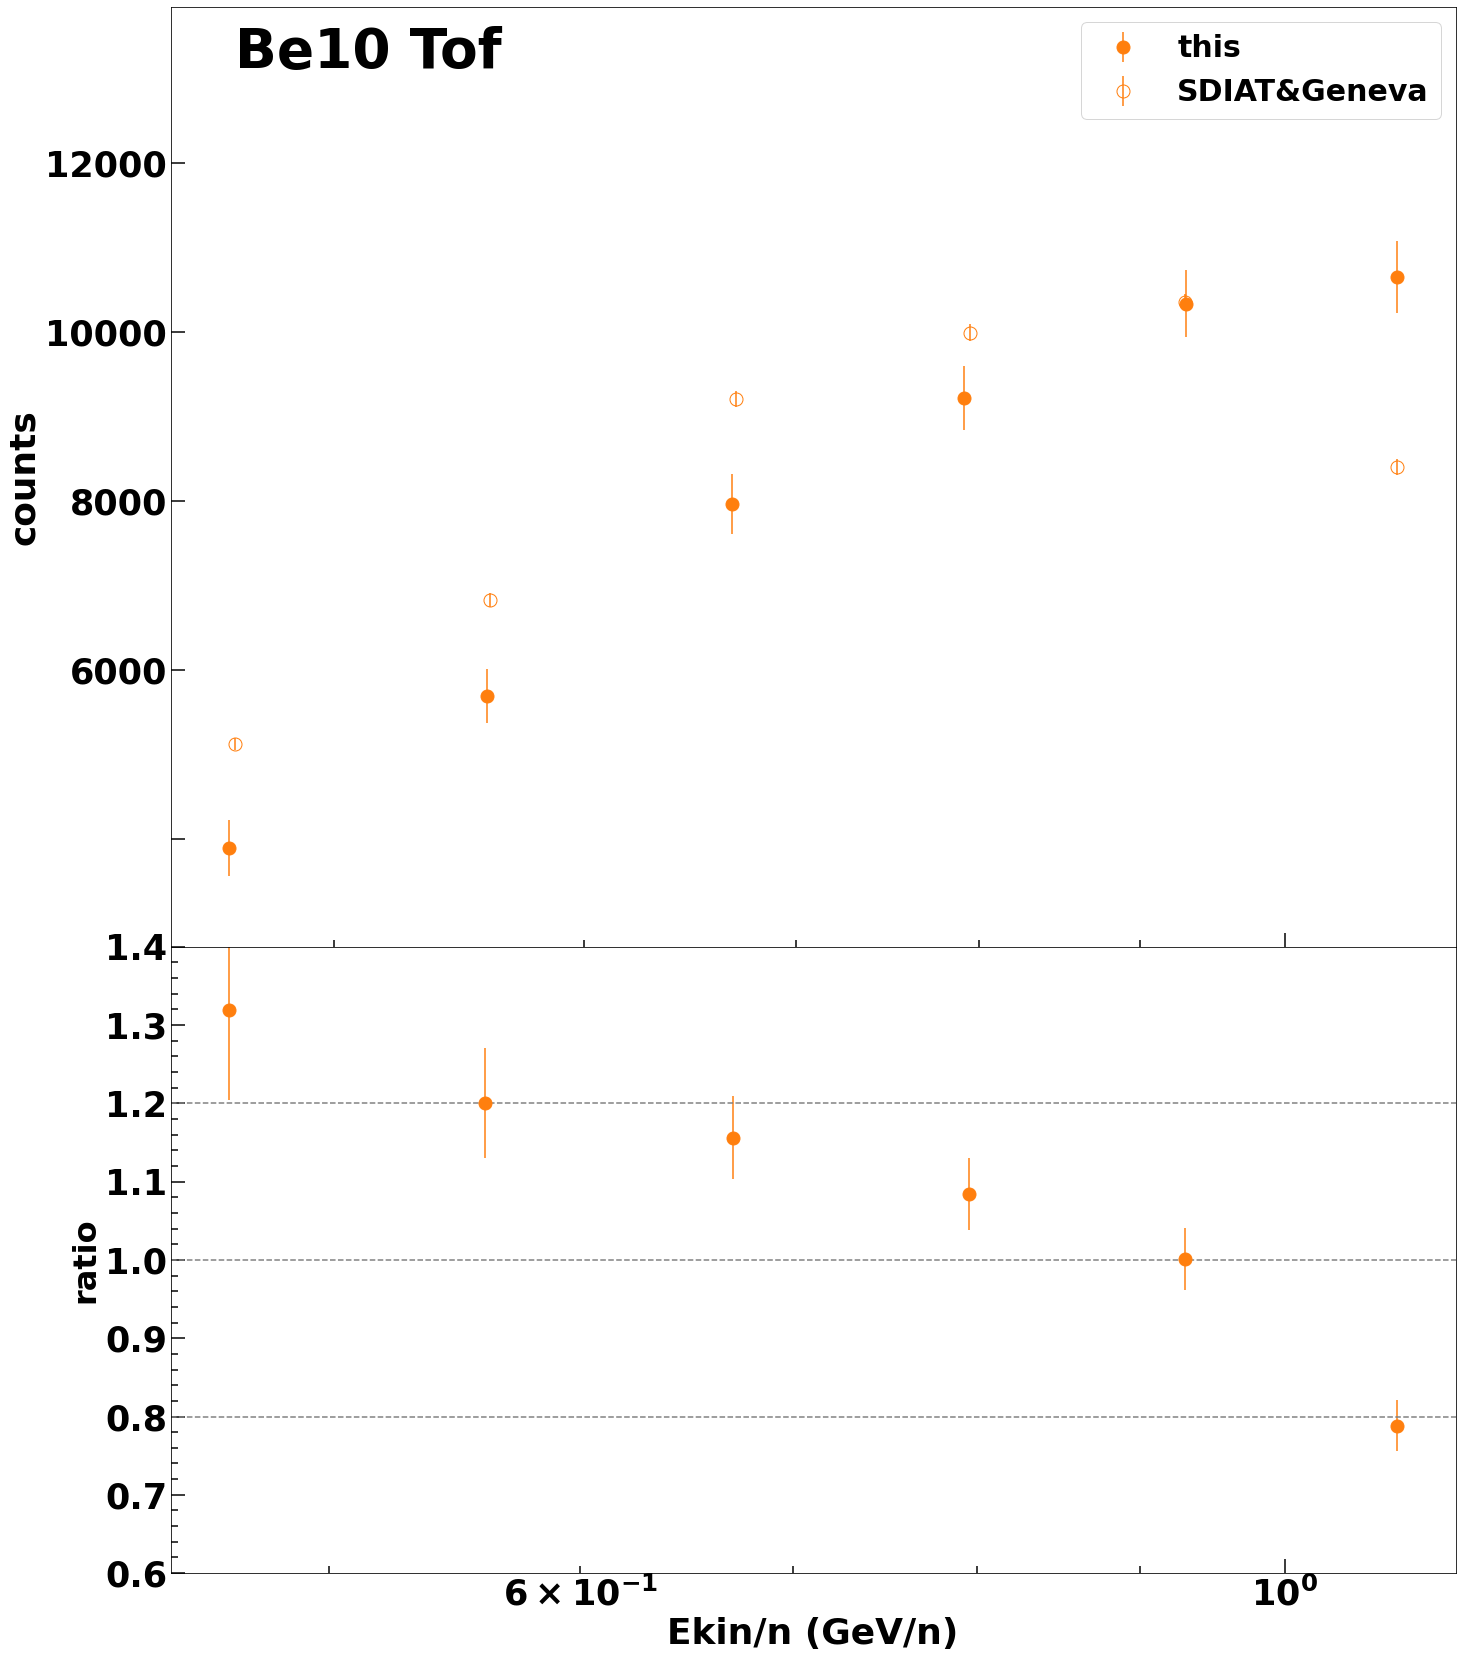

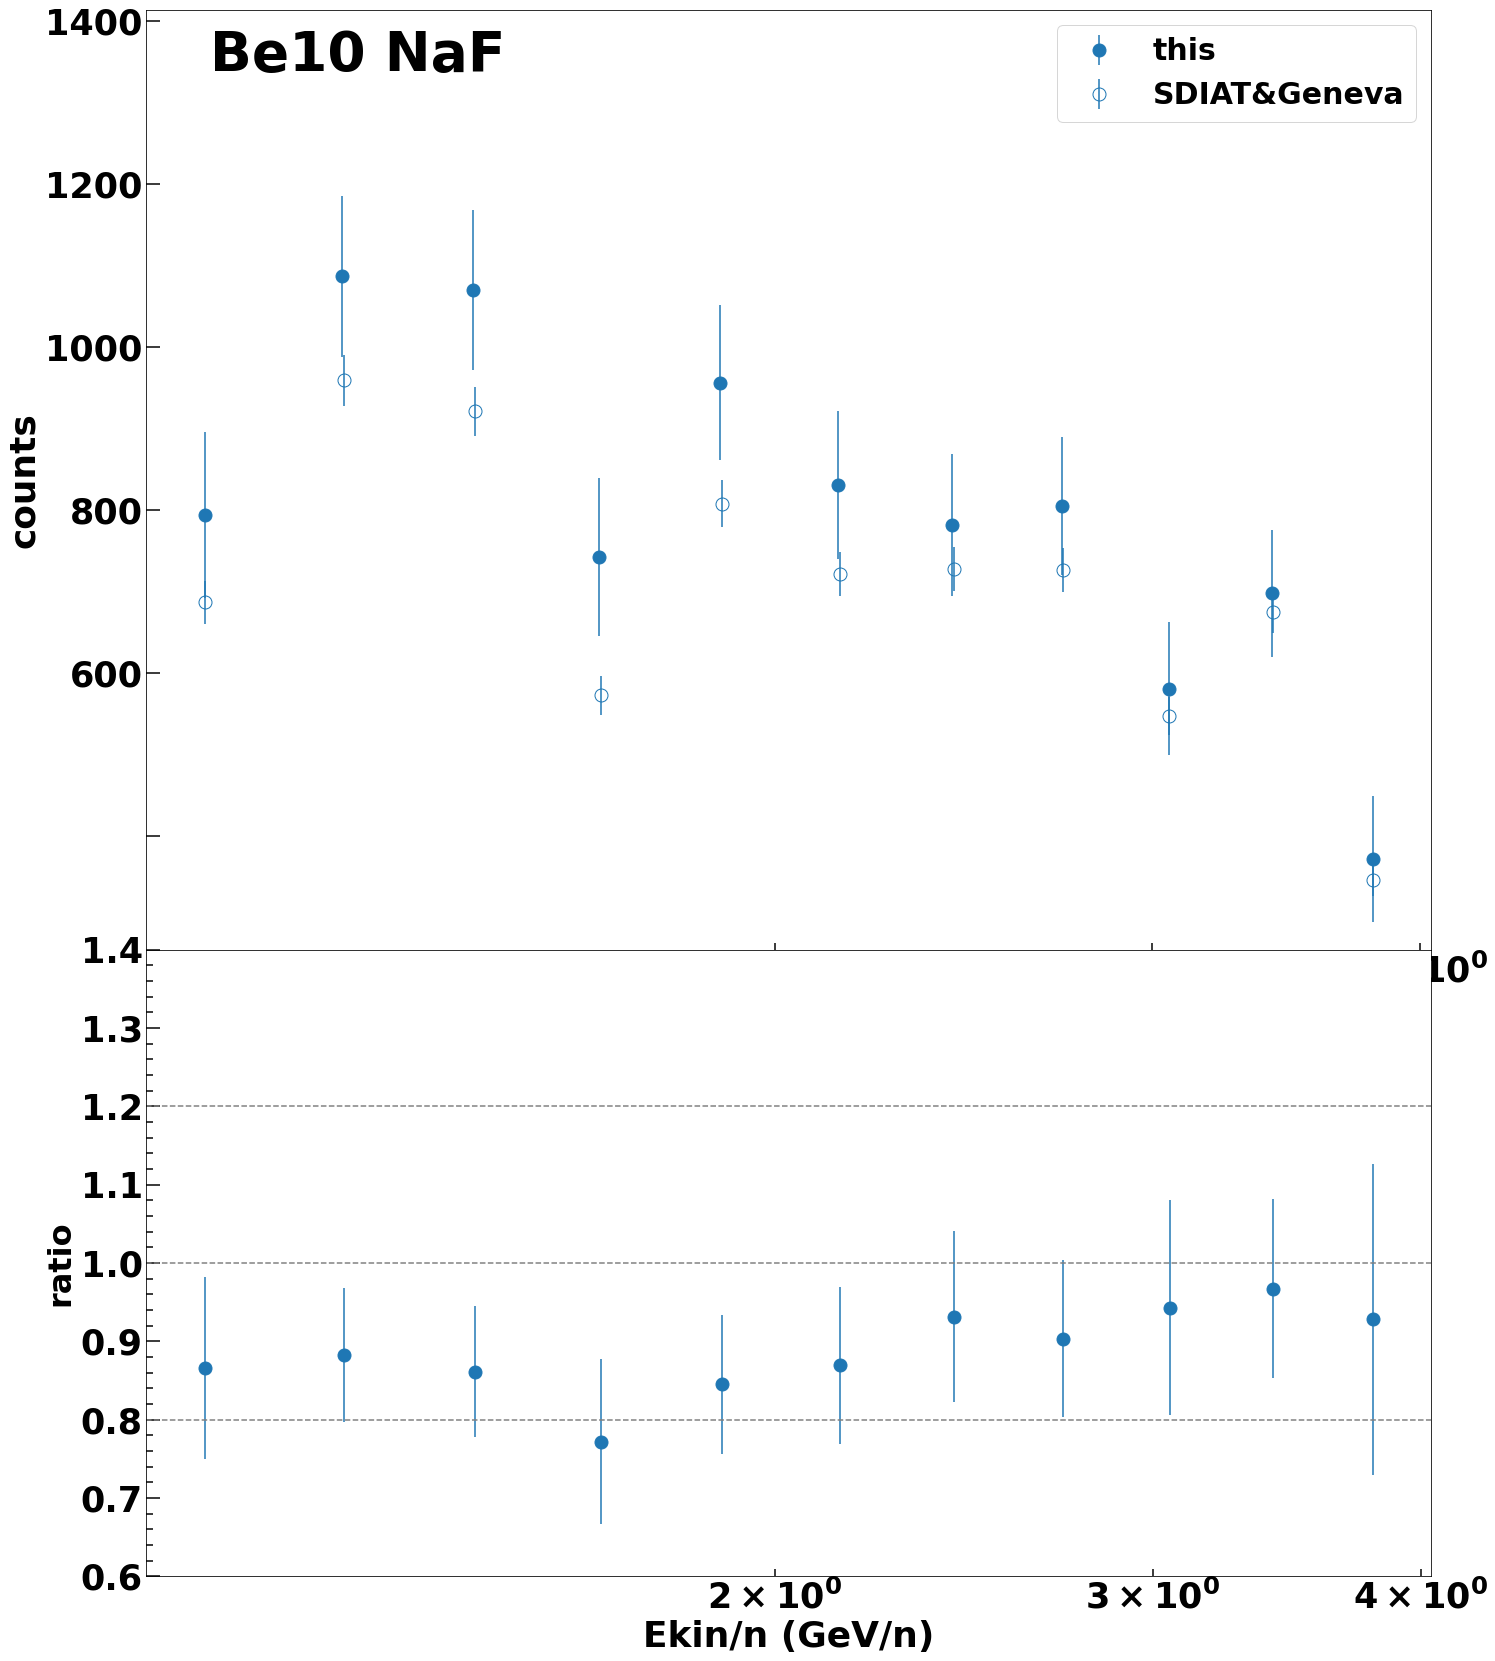

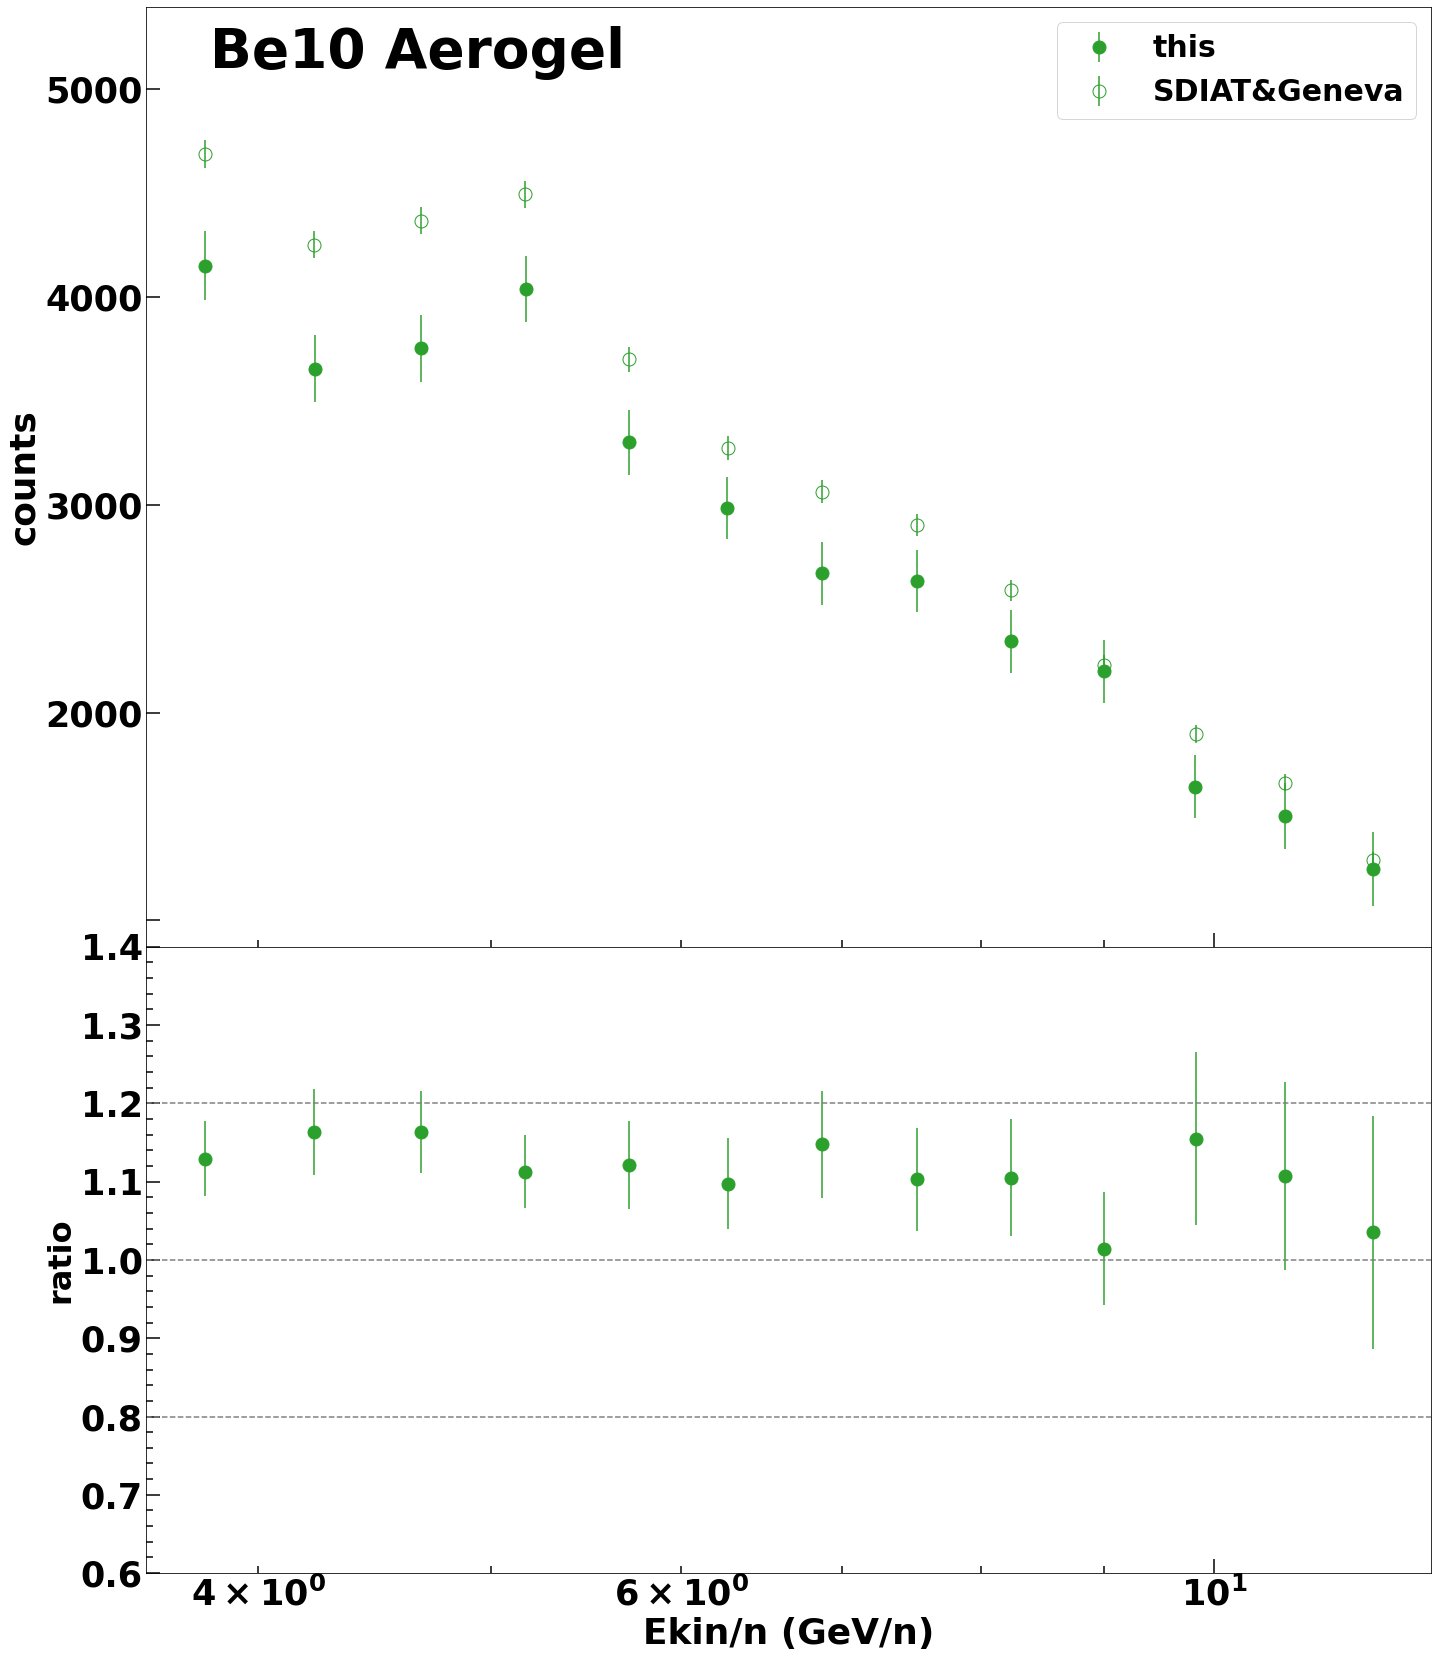

In [178]:
figsize1 = (21, 25)
fontsize1 = 45
fontsize2 = 55
mksize = 26
filename_compare = '/home/manbing/Documents/Data/jiahui/MC_Events/BeMC_histmass_vsekin_jiahuicommsel_test.npz'
#filename_init = '/home/manbing/Documents/Data/data_mc/dfile/BeMC_dict_hist_mass_ekin.npz'
graph_counts_jiahui = {dec: dict() for dec in detectors}                                                                                                                                                    
for dec in detectors:                                                                                                                                                                                       
    jiahui_counts_file =  pd.read_csv(f"/home/manbing/Documents/Data/jiahui/isotope_fluxes/Event_Counts_from_Fit/nevt_{detectors_alias[dec]}_10yr.txt",  sep='\s+', header=0)                               
    for iso in isotopes:                                                                                                                                                                            
        xjiahuicounts = 0.5*(jiahui_counts_file['Ek_low'] + jiahui_counts_file['Ek_high'])                                                                                                                  
        graph_counts_jiahui[dec][iso] = MGraph(xjiahuicounts, jiahui_counts_file[f'T{iso}_N{iso}'], np.sqrt(jiahui_counts_file[f'T{iso}_N{iso}']))   

df_counts = np.load(f'{file_counts}')
#df_counts_compare = np.load(f'{filename_init}')
figSize = (22, 15)
graph_counts_fromfit_Opt = {dec: {} for dec in detectors}
graph_counts_sum = dict()
graph_counts_compare = {dec: {} for dec in detectors}
graph_counts_sum_compare = dict()
hist_mass2d = {dec: {} for dec in detectors}
xbinning = Binning(fbinning_energy())
ax2ylinemin = {'Be7': 0.97, 'Be9': 0.95, 'Be10':0.8}
ax2ylinemax = {'Be7': 1.03, 'Be9': 1.05, 'Be10':1.2}
for dec in detectors:
    for iso in isotopes:
        graph_counts_fromfit_Opt[dec][iso] = MGraph.from_file(df_counts, f"graph_counts_{dec}Opt{iso}_{iso}")
        #graph_counts_fromfit_Opt[dec][iso] = slice_graph_by_value(graph_counts_fromfit_Opt[dec][iso], slicevalue[dec])
        #hist_mass2d[dec][iso] = WeightedHistogram.from_file(df_counts_compare, f"{iso}MC_{dec}_mass")
        #graph_counts_compare[dec][iso] = MGraph(xbinning.bin_centers[1:-1], np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1), np.sqrt(np.sum(hist_mass2d[dec][iso].values[1:-1, 1:-1], axis=1)))
        #graph_counts_compare[dec][iso] = MGraph.from_file(df_counts_compare, f'{dec}_{iso}MC_counts')
        xstart = graph_counts_fromfit_Opt[dec][iso].xvalues[0]
        xend = graph_counts_fromfit_Opt[dec][iso].xvalues[-1]
        graph_counts_compare[dec][iso] = slice_graph_by_value(graph_counts_jiahui[dec][iso], np.array([xstart, xend]))
        if iso == "Be7":
            graph_counts_sum[dec] = graph_counts_fromfit_Opt[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_compare[dec][iso]
        else:
            graph_counts_sum[dec] = graph_counts_sum[dec] + graph_counts_fromfit_Opt[dec][iso]
            graph_counts_sum_compare[dec] = graph_counts_sum_compare[dec] + graph_counts_compare[dec][iso]
      
    

for iso in isotopes: 
    for dec in detectors:
        fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=figsize1)                                                                                                            
        fig.subplots_adjust(left= 0.12, right=0.97, bottom=0.08, top=0.95) 
        plot_graph(fig, ax1, graph_counts_fromfit_Opt[dec][iso], color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=mksize, label=f'this')  
        plot_graph(fig, ax1, graph_counts_compare[dec][iso], color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=mksize, label='SDIAT&Geneva', markerfacecolor="none") 
        #if dec == "Agl" and iso == "Be9":                                                                                                                                                            
        #    print(dec, iso)                                                                                                                                                                          
        #    print(graph_counts_fromfit_Opt[dec][iso])  
        graph_ratio = graph_counts_compare[dec][iso]/graph_counts_fromfit_Opt[dec][iso]
        plot_graph(fig, ax2, graph_ratio, color=DETECTOR_COLOR[dec],  style="EP", xlog=True, ylog=False, scale=None, markersize=mksize, label=f'{dec}')  
       
        #ax2.grid(axis='y')
        ax2.set_xlabel('Ekin/n (GeV/n)') 
        ax1.legend(loc="upper right", fontsize=30) 
        ax1.set_xticklabels([])
        plt.subplots_adjust(hspace=.0)   
        ax1.get_yticklabels()[0].set_visible(False)
        ax1.set_ylabel('counts')

        ax1.legend(loc="upper right", fontsize=30) 
        ax1.set_xticklabels([])

        plt.subplots_adjust(hspace=.0)   
        ax1.get_yticklabels()[0].set_visible(False)
        ax1.set_xscale('log')
        ax2.set_xscale('log')
        ax2.set_ylabel('ratio', fontsize=32)
        if iso == "Be7":
            ax2.set_ylim([0.9, 1.1])
        elif iso == 'Be9':
            ax2.set_ylim([0.8, 1.2])
        else:
            ax2.set_ylim([0.6, 1.4])
            
        ax2.axhline(y=1, color='grey', linestyle='--')
        ax2.axhline(y=ax2ylinemin[iso], color='grey', linestyle='--')
        ax2.axhline(y=ax2ylinemax[iso], color='grey', linestyle='--')
        ax1.set_ylim([0.7 * min(graph_counts_fromfit_Opt[dec][iso].yvalues), 1.3* max(graph_counts_fromfit_Opt[dec][iso].yvalues)])
        #ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        #ax2.set_xticks(np.array([2, 4, 10]))
        ax1.text(0.05, 0.98, f"{iso} {DETECTOR_LABEL[dec]}", fontsize=fontsize2, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", weight='bold')    
        #ax1.text(0.5, 0.9, f'{iso}', fontsize=30, verticplalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black')
        plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate0410'
        savefig_tofile(fig, plotdir, f"counts_fromfit_T{iso}N{iso}_{dec}", show=True) 

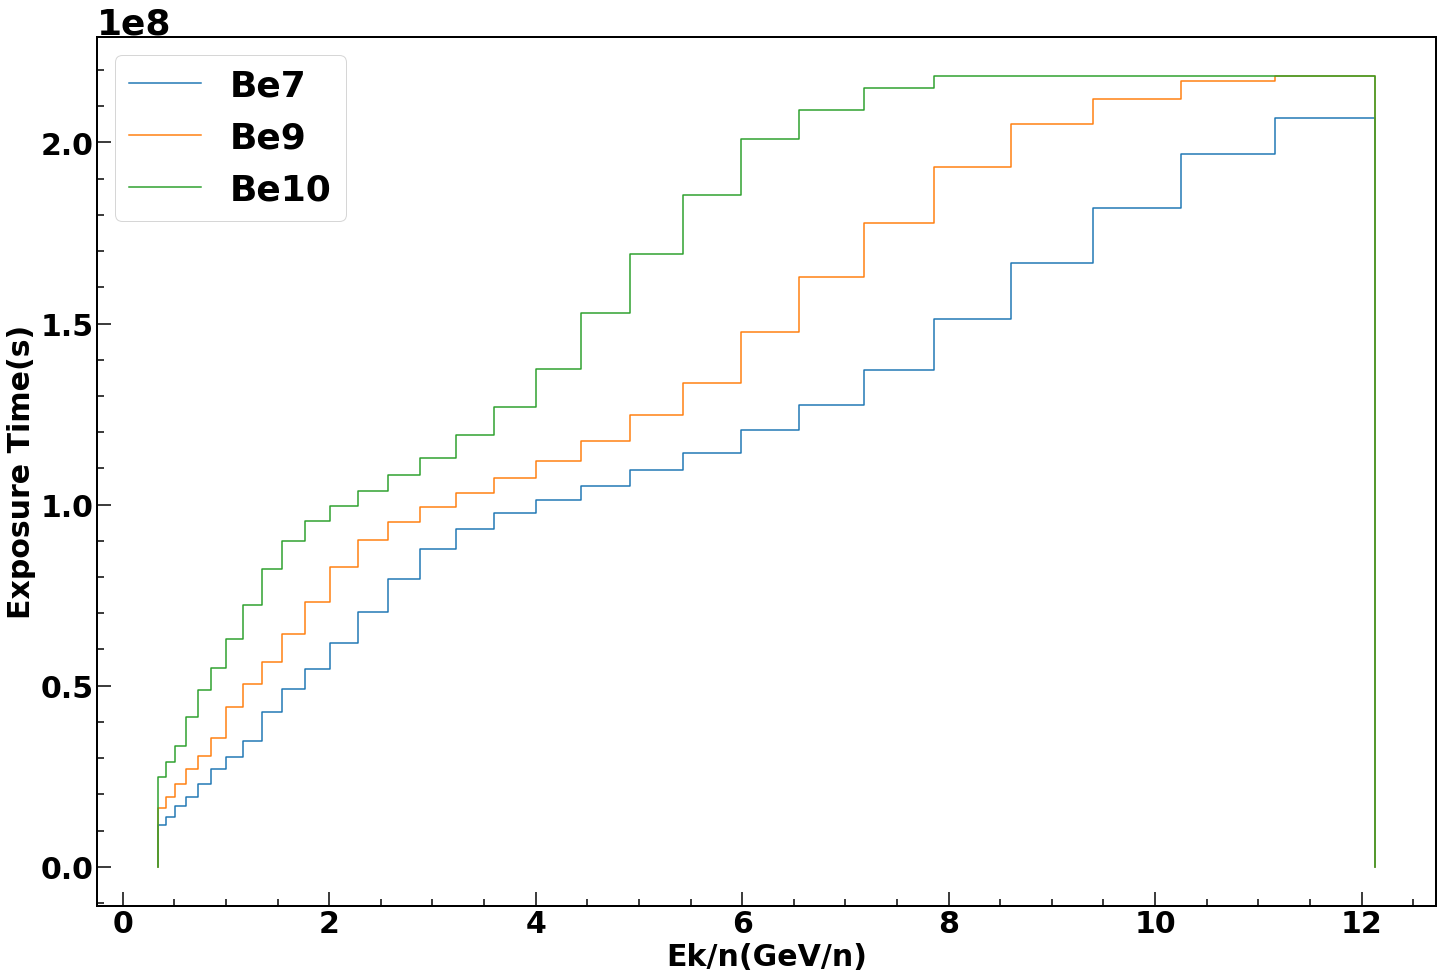

In [179]:
hist_time = dict()
graph_measuretime = dict()
with uproot.open(file_expotime) as filetime:  
    for iso in isotopes:
        hist_time[iso] = filetime[f'h_expo_rig_1_{isotopes_alias[iso]}_bina7']                                                                                                                                                    
        yexpotime = hist_time[iso].values()                           
        xvalue_time = hist_time[iso].axes[0].edges() 
        graph_measuretime[iso] = MGraph(get_bin_center(xvalue_time), yexpotime, np.zeros_like(yexpotime)) 
        
figure, ax1 = plt.subplots(1, 1, figsize=(24, 16))
for i, iso in enumerate(ISOTOPES[nuclei]):                                                                                                                                                                                                                                                                                                                                                                    
    plot1d_step(figure, ax1, hist_time[iso].axes[0].edges(), hist_time[iso].values(), err=None, label_x="Ek/n(GeV/n)", label_y="counts",  legend=f'{iso}', col=None, legendfontsize=18, setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False, figsize=(12, 9),  tick_length=14, tick_width=1.5, color=ISOTOPES_COLOR[iso])
    #plot1d_step(figure, ax1, hist_time_JH[iso].axes[0].edges(), hist_time[iso].values(), err=None, label_x="Ek/n(GeV/n)", label_y="counts",  legend=None, col=None, legendfontsize=18, setlogx=False, setlogy=False, setscilabelx=False, setscilabely=False, figsize=(12, 9),  tick_length=14, tick_width=1.5, color='black')
    ax1.legend()        
    ax1.set_ylabel('Exposure Time(s)')
    savefig_tofile(figure, plotdir, f"measuring_time_P710yr", 1)   


/home/manbing/.local/lib/python3.10/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
/home/manbing/.local/lib/python3.10/site-packages/numpy/core/_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


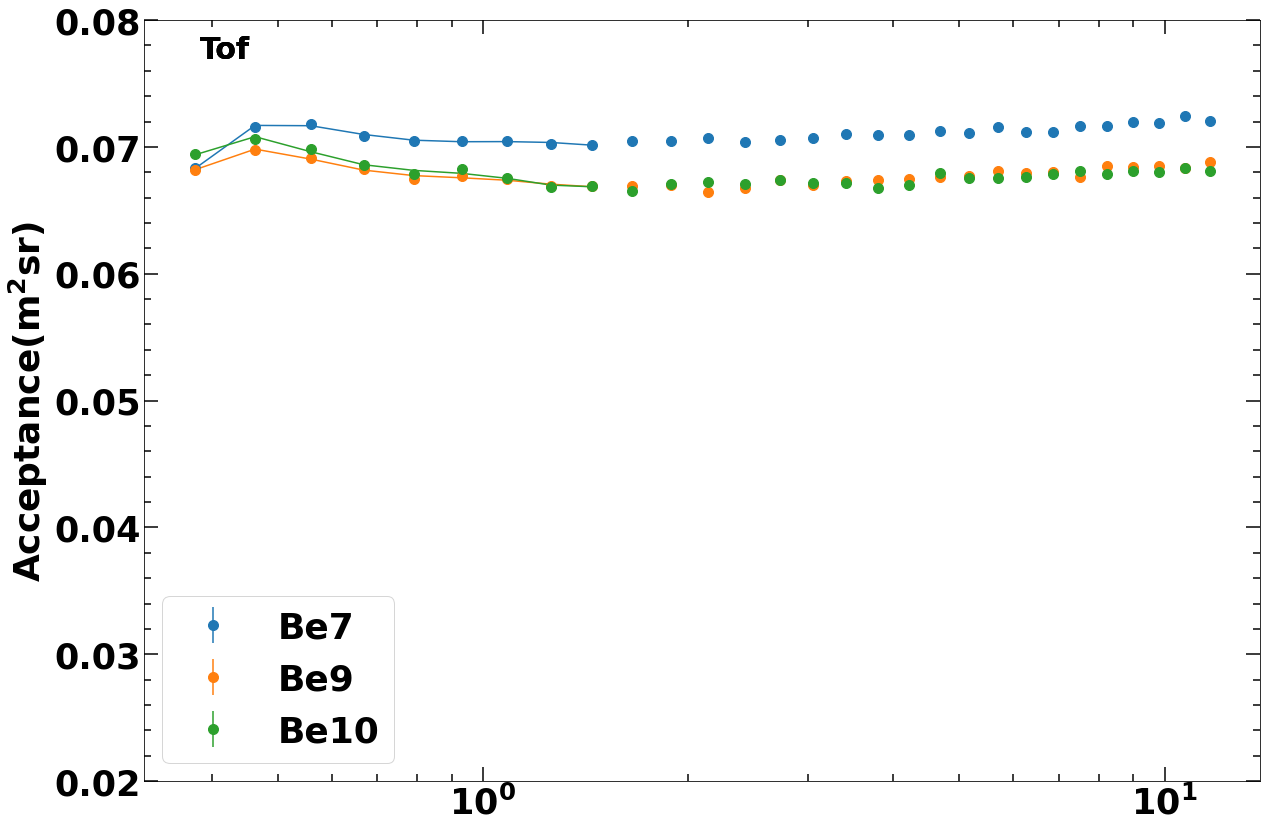

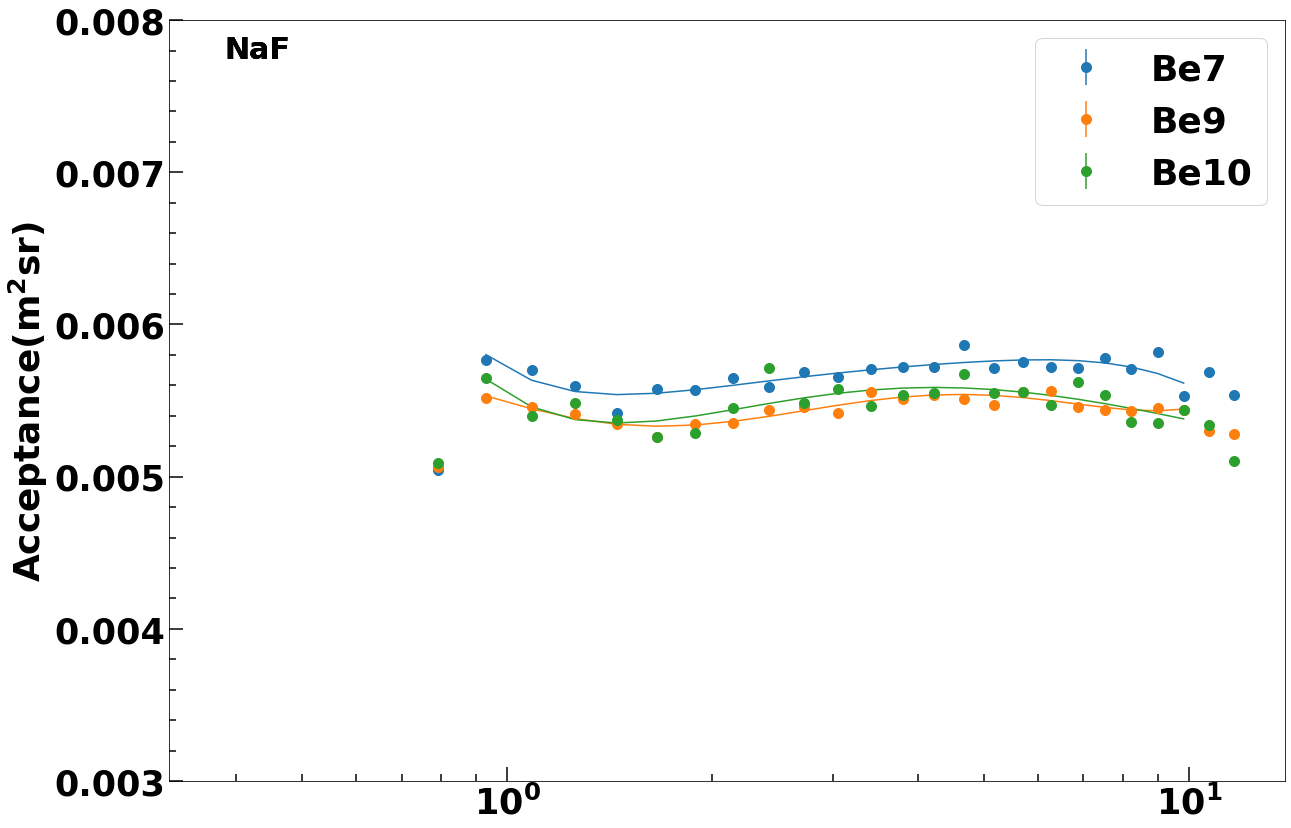

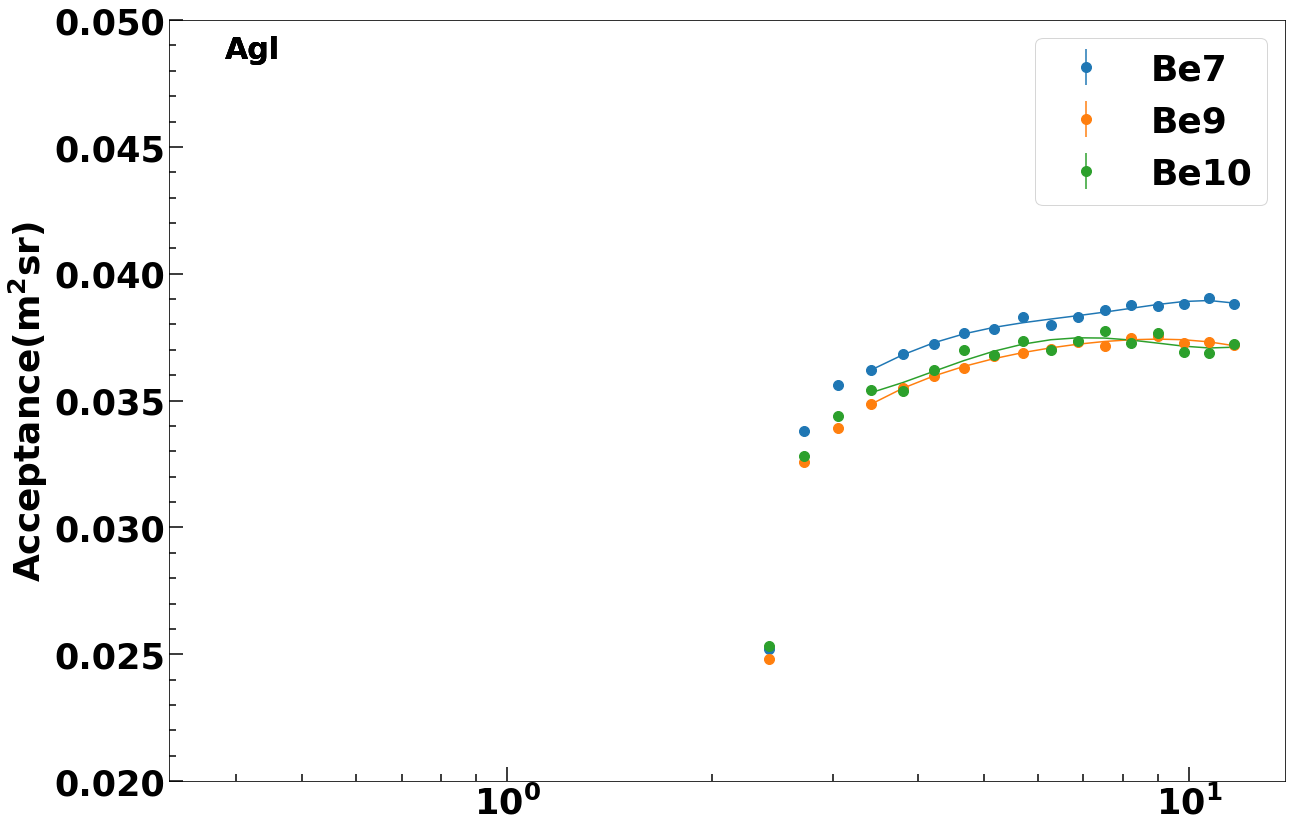

In [180]:
df_acc = np.load(f'{file_acc}')                                                                                                             
graph_acc = {dec: {iso: MGraph.from_file(df_acc, f"raw_acc_{dec}_{iso}") for iso in ISOTOPES[nuclei]} for dec in detectors}                                                                              
    
ylim_range = {'Tof': [0.02, 0.08], "NaF": [0.003, 0.008], "Agl": [0.02, 0.05]}
xlim_range = {'Tof': [0.2, 1.5], 'NaF':[1.0, 10], "Agl":[3.5, 12]}
subgraph_acc =  {dec: {} for dec in detectors}
spline_subgraph_acc =  {dec: {} for dec in detectors}
graph_acc_fromspline = {dec: {} for dec in detectors}
for dec in detectors:                                                                                                                                                                                          
    figure, ax1 = plt.subplots(1, 1, figsize=(20, 14))                                                                                                        
    for i, iso in enumerate(ISOTOPES[nuclei]): 
        subgraph_acc[dec][iso] = slice_graph_by_value(graph_acc[dec][iso], xlim_range[dec])
        x_values = subgraph_acc[dec][iso].xvalues
        spline_subgraph_acc[dec][iso] = UnivariateSpline(np.log(subgraph_acc[dec][iso].xvalues),subgraph_acc[dec][iso].yvalues, k=5, s=5)  
        
        ax1.plot(x_values, spline_subgraph_acc[dec][iso](np.log(x_values)))
        #acc_corr = graph_acc[dec][iso].yvalues * graph_total_effcor_ekin[dec][iso].yvalues                                                                                                                     
        #graph_corrected_acc[dec][iso] = MGraph(xbinning["Ekin"].bin_centers[1:-1], acc_corr, graph_acc[dec][iso].yerrs)                                                                                                                                                                                                                                                                                                  
        plot_graph(figure, ax1, graph_acc[dec][iso], color=ISOTOPES_COLOR[iso], label=f"{iso}", style="EP", xlog=True, ylog=False, markersize=20)                                                                            
        #plot_graph(figure, ax1, graph_corrected_acc[dec][iso], color=ISOTOPES_COLOR[iso], label=f"{iso}", style="EP", xlog=True, ylog=False, markersize=20)                                                    
        ax1.legend()                                                                                                                                                                                                                                                                                                                                                                       
        ax1.set_xscale("log")   
        ax1.set_ylim(ylim_range[dec])
        ax1.set_ylabel(r"$\mathrm{Acceptance (m^{2} sr)}$")                                                                                                                                                    
        ax1.text(0.05, 0.98, f"{dec}", fontsize=30, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", weight='bold')                                                                                                                                                                                                                                                           
    savefig_tofile(figure, plotdir, f"Acc{nuclei}{dec}_{variable}_P7B1220", 1)                                                                                          
    

['graph_total_effcor_tof_xvalues', 'graph_total_effcor_tof_yvalues', 'graph_total_effcor_tof_yerrs', 'graph_total_effcor_tof_labels', 'graph_total_effcor_naf_xvalues', 'graph_total_effcor_naf_yvalues', 'graph_total_effcor_naf_yerrs', 'graph_total_effcor_naf_labels', 'graph_total_effcor_agl_xvalues', 'graph_total_effcor_agl_yvalues', 'graph_total_effcor_agl_yerrs', 'graph_total_effcor_agl_labels']


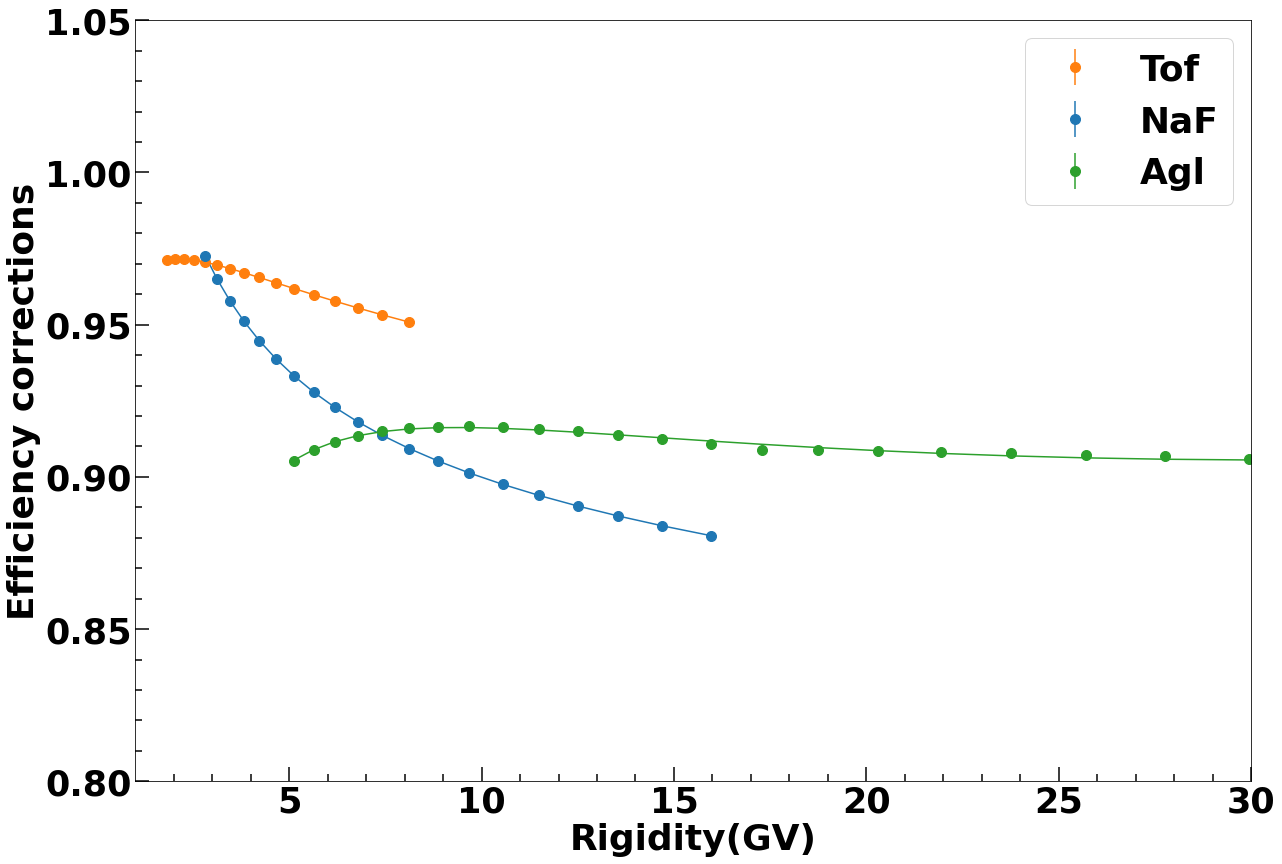

In [181]:
df_effcor = np.load(f'{file_effcor}')
print(list(df_effcor.keys()))
graph_total_effcor = dict()
spline_total_effcor = dict()
rigidity_range = {'Tof':[1.8, 8], 'NaF':[2.9, 16], 'Agl':[5, 36]}
for dec in detectors:
    graph_total_effcor[dec] = MGraph.from_file(df_effcor, f'graph_total_effcor_{detectors_alias[dec]}')
    graph_total_effcor[dec] = slice_graph_by_value(graph_total_effcor[dec], rigidity_range[dec])
    spline_total_effcor[dec] = UnivariateSpline(np.log(graph_total_effcor[dec].xvalues),graph_total_effcor[dec].yvalues, k=3, s=5)           

figure, ax1 = plt.subplots(1, 1, figsize=(20, 14))         
for dec in detectors:
    plot_graph(figure, ax1, graph_total_effcor[dec], color=DETECTOR_COLOR[dec], label=f"{dec}", style="EP", xlog=False, ylog=False, markersize=20)
    ax1.plot(graph_total_effcor[dec].xvalues, spline_total_effcor[dec](np.log(graph_total_effcor[dec].xvalues)), '-', color=DETECTOR_COLOR[dec])
    ax1.set_xlim([1, 30])
    ax1.legend()
    ax1.set_ylim([0.8, 1.05])
    ax1.set_xlabel('Rigidity(GV)')
    ax1.set_ylabel('Efficiency corrections')
    
savefig_tofile(figure, plotdir, f"effcor_{variable}_P7B1220_vsR", 1)   
    
    
    
    

Tof Be7 [ 1.61467363  1.82012727  2.04053098  2.28101604  2.54142961  2.82696649
  3.13746993  3.4731187   3.83880282  4.23453798  4.66537731  5.13624902
  5.64725902  6.19841317  6.79463625  7.44096762  8.1373922   8.88891951
  9.70061096 10.57244385 11.52442825 12.52649877 13.57871201 14.73103914
 15.98363109 17.33648902 18.7895441  20.34282673 21.99628536]
Tof Be9 [ 2.07394718  2.33783951  2.62093428  2.92982229  3.26430721  3.63106145
  4.02988368  4.4610035   4.93070186  5.43899889  5.99238504  6.59719026
  7.25355062  7.96147361  8.72728482  9.557457   10.45197076 11.41726054
 12.45982739 13.57964214 14.8024065  16.08950333 17.44100537 18.92109741
 20.52997334 22.26763464 24.13399292 26.1290872  28.25285128]
Tof Be10 [ 2.30444142  2.59766221  2.91221954  3.25543673  3.62709562  4.03461018
  4.47775669  4.95679029  5.47868995  6.04347808  6.65836642  7.33038846
  8.05969537  8.84629547  9.69721737 10.61965318 11.61358137 12.68615147
 13.84458707 15.08885573 16.44751562 17.87765775

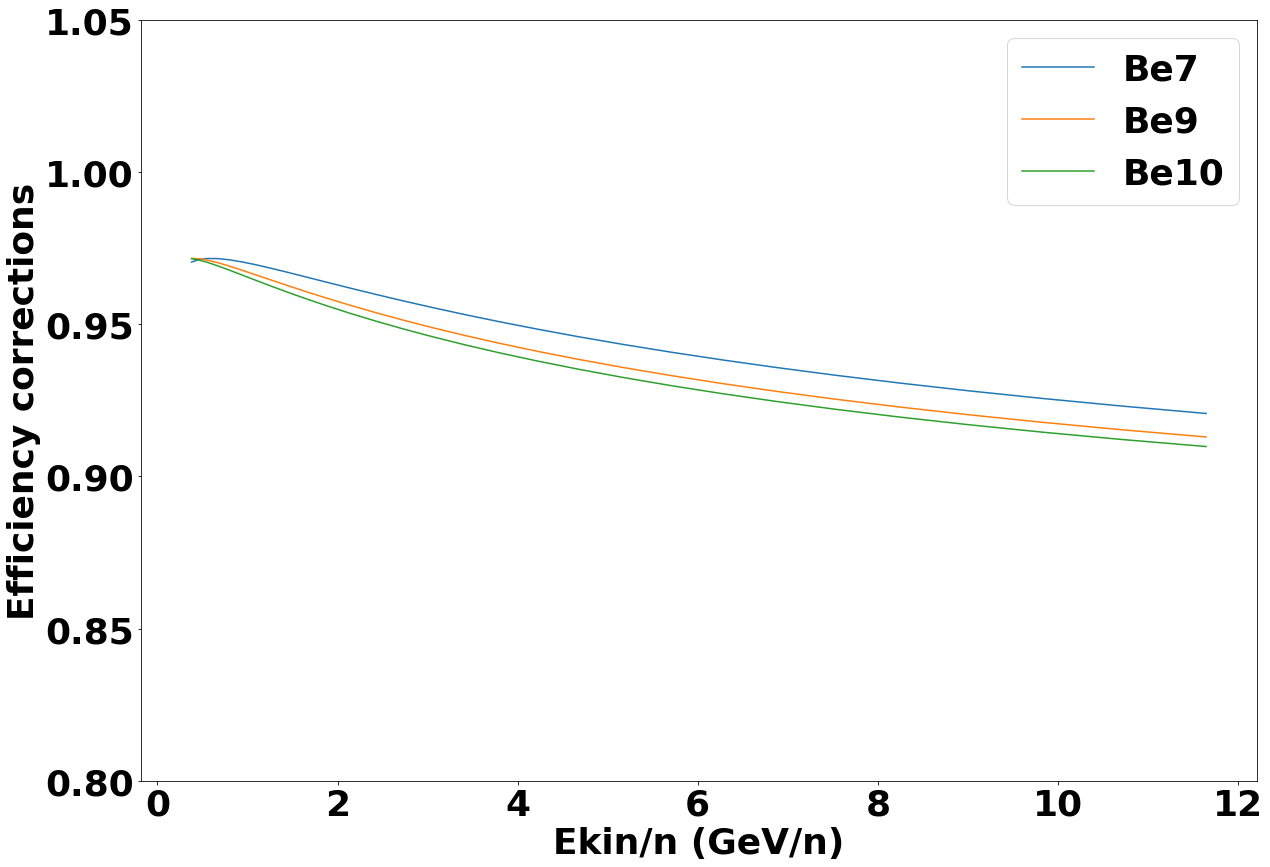

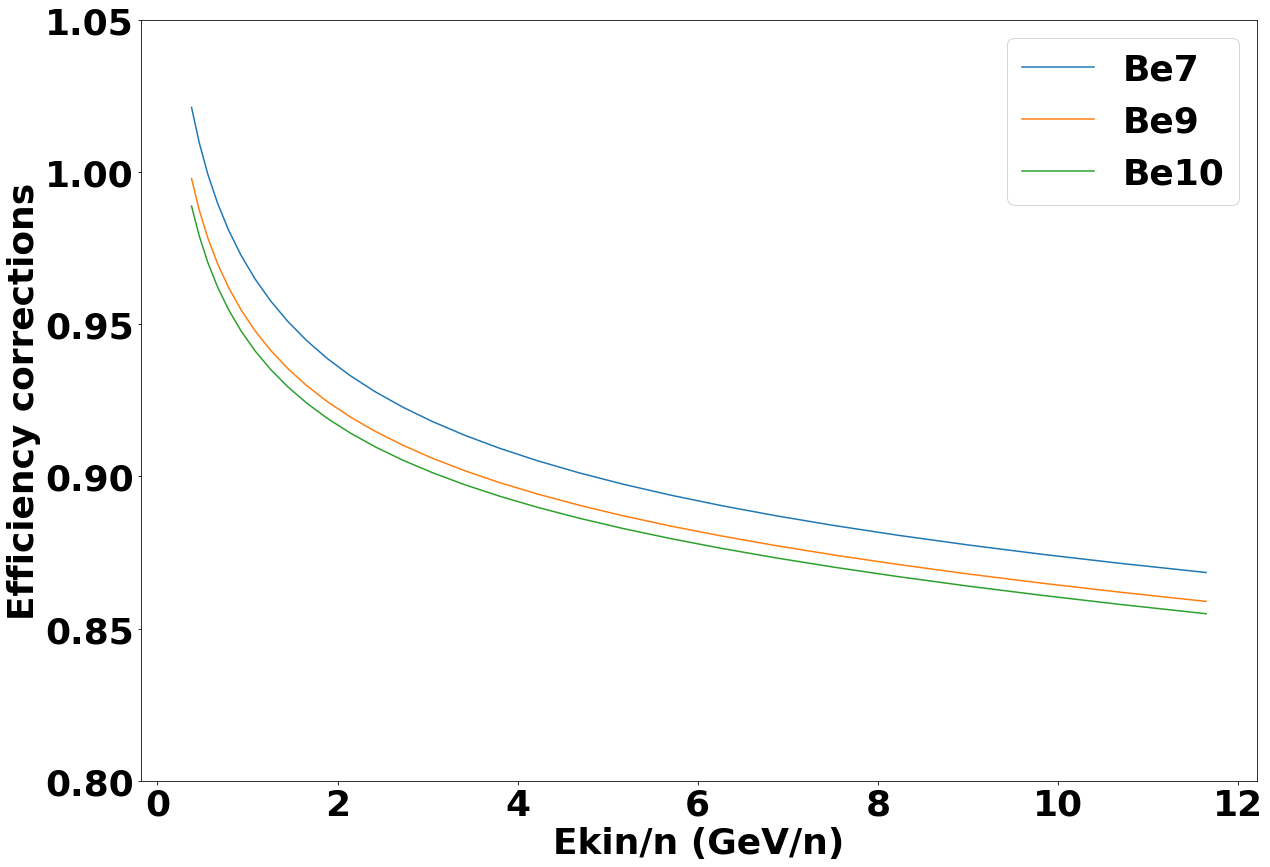

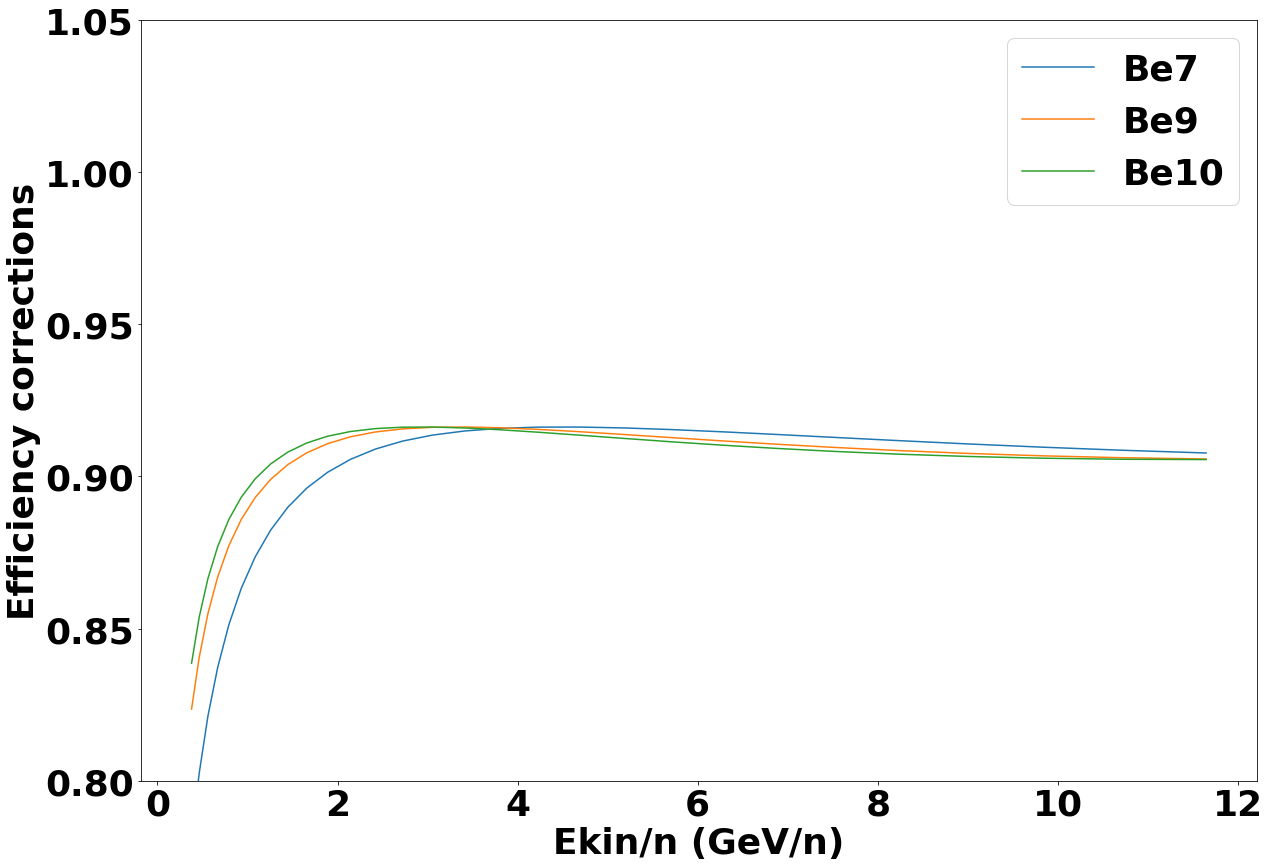

In [182]:
graph_total_effcor_ekin = {dec: dict() for dec in detectors} 

xrigidity_from_ekin = dict()     
eff_cor_ekin = dict()
for dec in detectors:                                                                                                                                                                                          
    for iso in ISOTOPES[nuclei]:                                                                                                                                                                               
        xrigidity_from_ekin[iso] = calc_rig_from_ekin(xbinning.bin_centers[1:-1], ISOTOPES_MASS[iso], NUCLEI_CHARGE[nuclei])                                                                           
        eff_cor_ekin[dec] = spline_total_effcor[dec](np.log(xrigidity_from_ekin[iso]))  
        print(dec, iso, xrigidity_from_ekin[iso])
        graph_total_effcor_ekin[dec][iso] = MGraph(xbinning.bin_centers[1:-1], eff_cor_ekin[dec], np.zeros_like(eff_cor_ekin[dec]))  
        

for dec in detectors:
    figure, ax1 = plt.subplots(1, 1, figsize=(20, 14))   
    #plot_graph(figure, ax1, graph_total_effcor_ekin[dec], color=DETECTOR_COLOR[dec], label=f"{dec}", style="EP", xlog=False, ylog=False, markersize=20)
    for iso in isotopes:
        ax1.plot(graph_total_effcor_ekin[dec][iso].xvalues, graph_total_effcor_ekin[dec][iso].yvalues, '-', color=ISOTOPES_COLOR[iso], label=f'{iso}')
        #ax1.set_xlim([1, 30])
        ax1.legend()
        ax1.set_ylim([0.8, 1.05])
        ax1.set_xlabel('Ekin/n (GeV/n)')
        ax1.set_ylabel('Efficiency corrections')
    

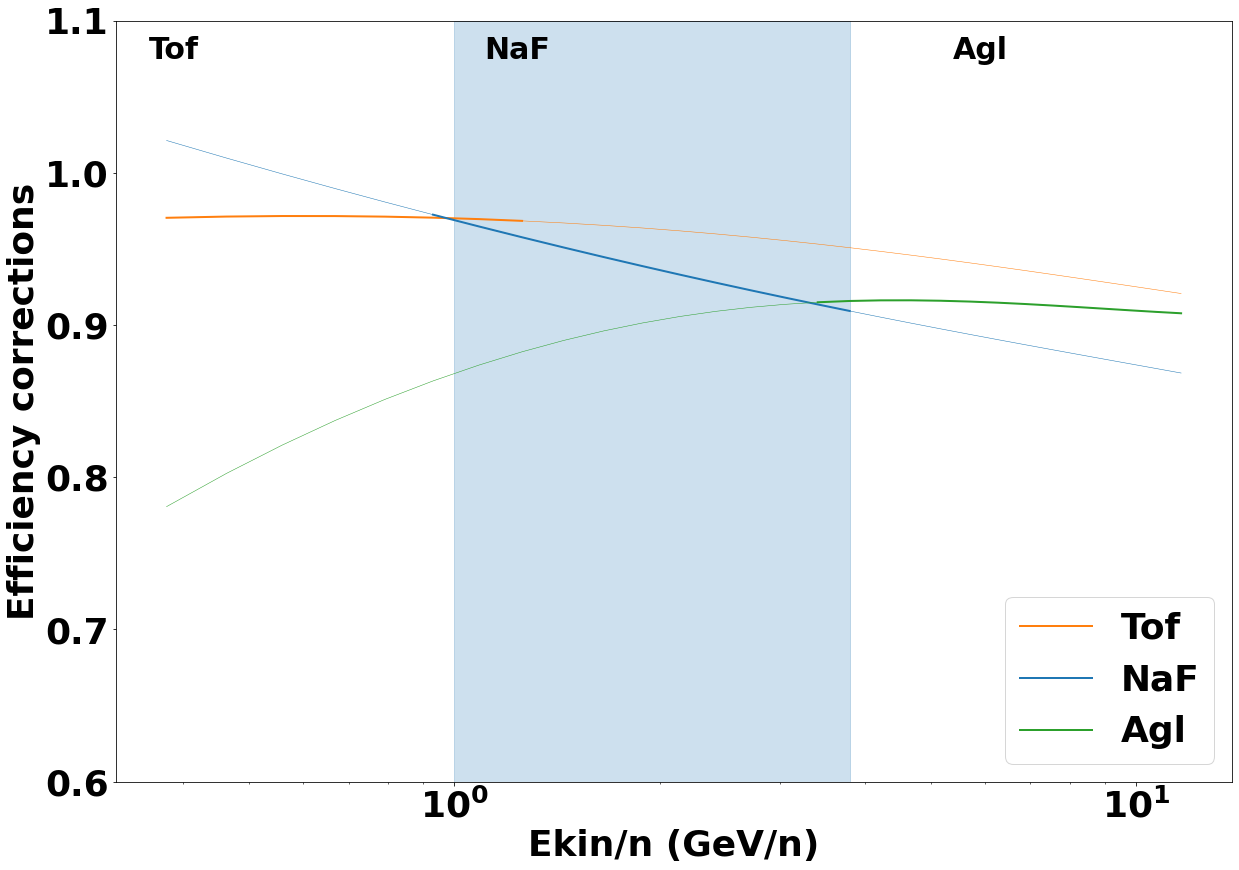

In [183]:

subgraph_effcorBe7 = dict()
ekin_range = {'Tof':[0.2, 1.2], 'NaF':[1, 5], 'Agl': [3.0, 12]}
xaxistext = {"Tof": 0.03, "NaF": 0.33, "Agl": 0.75}

figure, ax1 = plt.subplots(1, 1, figsize=(20, 14))   
subgraph_effcorBe7 = dict()
ekin_range = {'Tof':[0.2, 1.2], 'NaF':[1, 4], 'Agl': [3.5, 12]}
xaxistext = {"Tof": 0.03, "NaF": 0.33, "Agl": 0.75}
for dec in detectors:    
    subgraph_effcorBe7[dec] = slice_graph_by_value(graph_total_effcor_ekin[dec]['Be7'], ekin_range[dec])
    ax1.plot(graph_total_effcor_ekin[dec]['Be7'].xvalues, graph_total_effcor_ekin[dec]['Be7'].yvalues, '-', color=DETECTOR_COLOR[dec], linewidth=0.5)
    ax1.plot(subgraph_effcorBe7[dec].xvalues, subgraph_effcorBe7[dec].yvalues, '-', color=DETECTOR_COLOR[dec], label=f'{dec}', linewidth=2.0)
    #ax1.set_xlim([1, 30])
    ax1.legend(loc='lower right')
    ax1.set_ylim([0.6, 1.1])
    ax1.set_xscale('log')
    ax1.set_xlabel('Ekin/n (GeV/n)')
    ax1.set_ylabel('Efficiency corrections')
    ax1.fill_betweenx(np.linspace(0.4, 1.1, 100), 1.0, 3.8, alpha=0.08, color="tab:blue") 
    ax1.text(xaxistext[dec], 0.98, f"{dec}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color="black", fontweight="bold")      



################################################################################################ <br>
####compute the raw flux with counts from the fit <font color="red">all paremeters free</font>  
#################################################################################################


xvalues			yvalues			yerrs
0.37825			0.0			nan
0.4631			0.0			nan
0.5589999999999999			3.8168524713432424e-05			1.2312417492013254e-06
0.66835			0.0021907882910227037			1.2670259384304786e-06
0.79125			0.005088935267093112			1.3077340780502413e-06
0.9302999999999999			0.005647805035553117			1.3087224776186157e-06
1.08555			0.005398783791746786			1.3624870811952975e-06
1.2570999999999999			0.005485914127726215			1.3782121367174242e-06
1.44745			0.0053755431409934			1.4041113911392255e-06
1.6566			0.005263548838706562			1.4348334347559949e-06
1.8872			0.005289237639424142			1.4410496365539326e-06
2.1419			0.005451435523963792			1.4566578279778265e-06
2.42075			0.0057150182215215395			1.4807812111348968e-06
2.7237			0.005481019447822596			1.5109982761569858e-06
3.0534			0.005572950972541024			1.5233190282845843e-06
3.4126000000000003			0.005465371509445067			1.543277716439516e-06
3.8012500000000005			0.005534040531671041			1.57109585720414e-06
4.2221			0.005551868000568246			1.58380112466

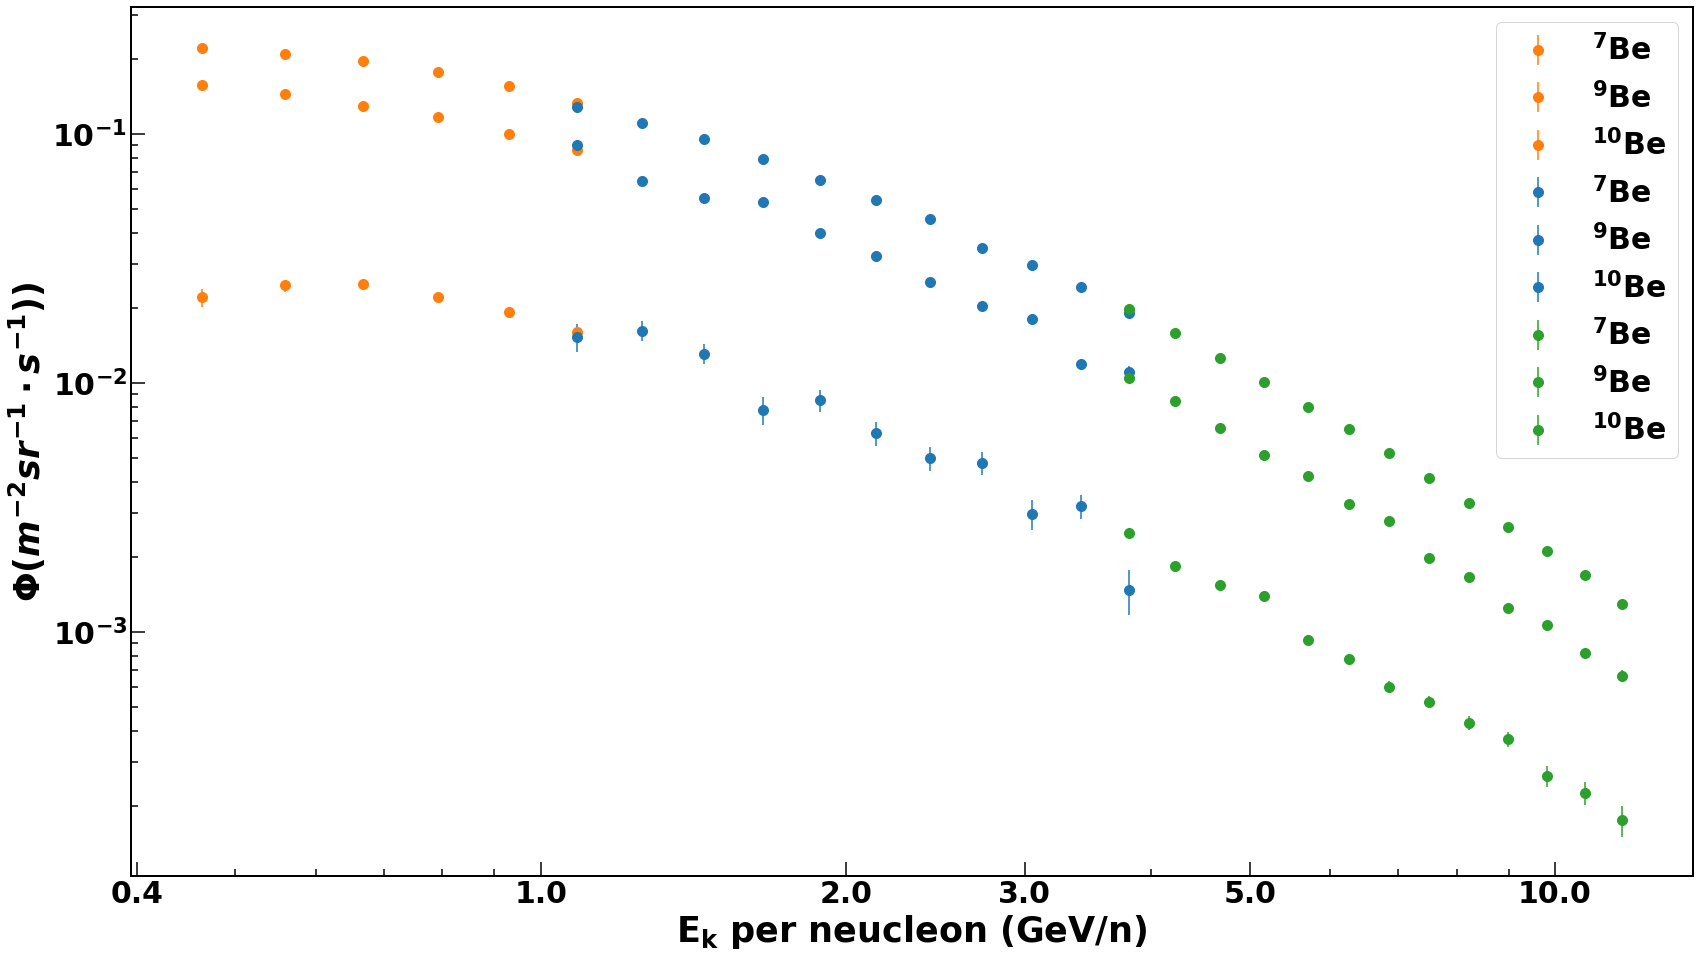

In [184]:
graph_flux_raw = {dec: dict() for dec in detectors}   
#xbinning = {"Rigidity": Binning(fbinning_energy()), "Ekin":Binning(fbinning_energy())}   
df_rawflux = dict() 
for dec in detectors:                                                                                                                                                                                          
    for iso in ISOTOPES[nuclei]:
        graph_counts = graph_counts_fromfit_Opt[dec][iso]
        xenergy = graph_counts.xvalues       
            
        graph_accraw = slice_graph_by_value(graph_acc[dec][iso], [xenergy[0], xenergy[-1]])  
        
        graph_time = slice_graph_by_value(graph_measuretime[iso], [xenergy[0], xenergy[-1]]) 
        graph_effcor = slice_graph_by_value(graph_total_effcor_ekin[dec][iso], [xenergy[0], xenergy[-1]]) 
                                                                                                                                                               
        counts = graph_counts.yvalues                                                                                                                                                                
        counts_err = graph_counts.yerrs                                                                                                                                                              
        effcor = graph_effcor.yvalues
        #acc = spline_subgraph_acc[dec][iso](np.log(xenergy))  
        acc = graph_accraw.yvalues
        acc_err = graph_accraw.yerrs
        indices = xbinning.get_indices([xenergy[0], xenergy[-1]])                                                                                                                                    
        #bin_widths = xbinning.bin_widths[indices[0]: indices[1]+1]                                                                                                                                  
        bin_edges = xbinning.edges[indices[0]: indices[1]+2]                                                                                                                                         
        bin_widths = bin_edges[1:] - bin_edges[:-1]  
        
        assert (np.all(xenergy == graph_effcor.xvalues))                                                                                                                                                                                                                                                                                                                             
        assert (np.all(xenergy == graph_time.xvalues))                                                                                                                                                               
        assert (np.all(xenergy == get_bin_center(bin_edges)))    
        assert (np.all(xenergy == graph_accraw.xvalues))
        
        flux_raw = counts / (effcor * acc *graph_time.yvalues * bin_widths)                                                                                                                               
        flux_raw_err = flux_raw * np.sqrt((counts_err/counts)**2 + (acc_err/acc)**2)                                                                                                                         
        graph_flux_raw[dec][iso] = MGraph(xenergy, flux_raw, flux_raw_err)                                                                                                                                                 
        
print(graph_acc['NaF']['Be10'])

#for iso in ISOTOPES[nuclei]:
#    graph_flux_raw['NaF'][iso] = slice_graph_by_value(graph_flux_raw['NaF'][iso], [1.1, 4.2])

fig, ax1 = plt.subplots(figsize=(28, 16))
for dec in detectors:
    for iso in ISOTOPES[nuclei]:
        plot_graph(fig, ax1, graph_flux_raw[dec][iso], color=DETECTOR_COLOR[dec], style="EP", xlog=True, ylog=True, markersize=20, label=f"{ISO_LABELS[iso]}")
        graph_flux_raw[dec][iso].add_to_file(df_rawflux, f'graph_rawflux_{dec}{iso}')
        
ax1.set_ylabel(r"$\mathrm{\Phi} (m^{-2} sr^{-1} \cdot s^{-1})) }$", fontsize=35) 
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)     
ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend()
savefig_tofile(fig, plotdir, 'be_isoflux', 1)
np.savez(os.path.join(datadirP7, 'df_rawisoflux_vsEkin.npz'), **df_rawflux)


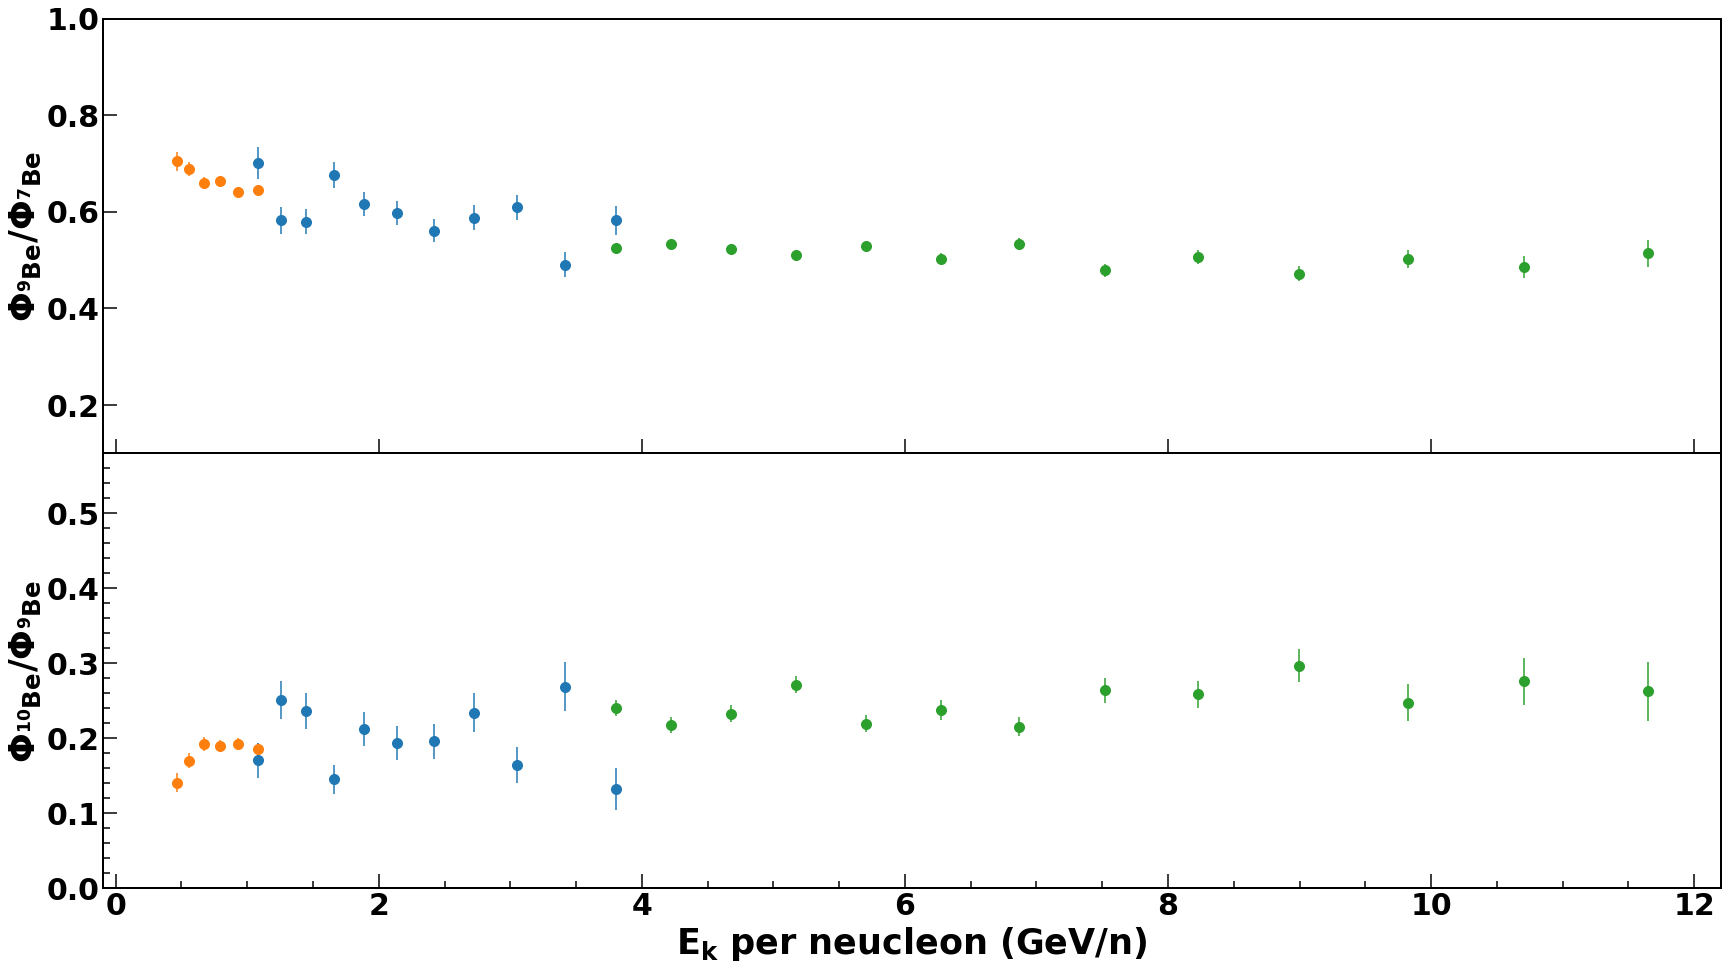

In [185]:
graph_rawflux_ratio_10to9 = dict()
graph_rawflux_ratio_9to7 = dict()

for dec in detectors:
    graph_rawflux_ratio_9to7[dec] = graph_flux_raw[dec]['Be9']/graph_flux_raw[dec]['Be7']
    graph_rawflux_ratio_10to9[dec] = graph_flux_raw[dec]['Be10']/graph_flux_raw[dec]['Be9']
    
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.5, 0.5]}, figsize=(29, 16)) 
#ax1.text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold") 
ax2.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=35) 
for dec in detectors:
    plot_graph(fig, ax2, graph_rawflux_ratio_10to9[dec], color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=20)
    plot_graph(fig, ax1, graph_rawflux_ratio_9to7[dec], color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=20)
ax2.set_ylim([0.0, 0.58])                                                                                                                             

#ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
#ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                                                                                                                                   
 
ax1.set_ylabel(r"$\mathrm{\Phi_{^{9}Be}/\Phi_{^{7}Be}}$", fontsize=35)   
ax2.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)

ax1.set_ylim([0.1, 1.0])                                                                                                                              
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 
savefig_tofile(fig, plotdir, 'be_fluxratio', 1)

Tof Be7 
xvalues			yvalues			yerrs
0.66835			0.19643072585639734			0.0015561367800173726
0.79125			0.17602196584720695			0.0012933088768128822
0.9302999999999999			0.1553876201964046			0.0010034960948729832
1.08555			0.13325684702581386			0.0011095788414907154

Tof Be9 
xvalues			yvalues			yerrs
0.66835			0.12956975449575092			0.0022177176751911397
0.79125			0.11668763133821751			0.001860457688045683
0.9302999999999999			0.09968297918128682			0.0014681162405997853
1.08555			0.08599164122205163			0.0012808645815446124

Tof Be10 
xvalues			yvalues			yerrs
0.66835			0.024929758238285492			0.0011114020744689816
0.79125			0.022136741870792658			0.0009114725322410791
0.9302999999999999			0.019213756376366232			0.0007356682160514763
1.08555			0.01602810023113517			0.0006465047338205108

NaF Be7 
xvalues			yvalues			yerrs
1.2570999999999999			0.11058598523693965			0.0019769954602749562
1.44745			0.09530135826610173			0.001513678458461577
1.6566			0.07898647495792994			0.001214388688214068
1.88

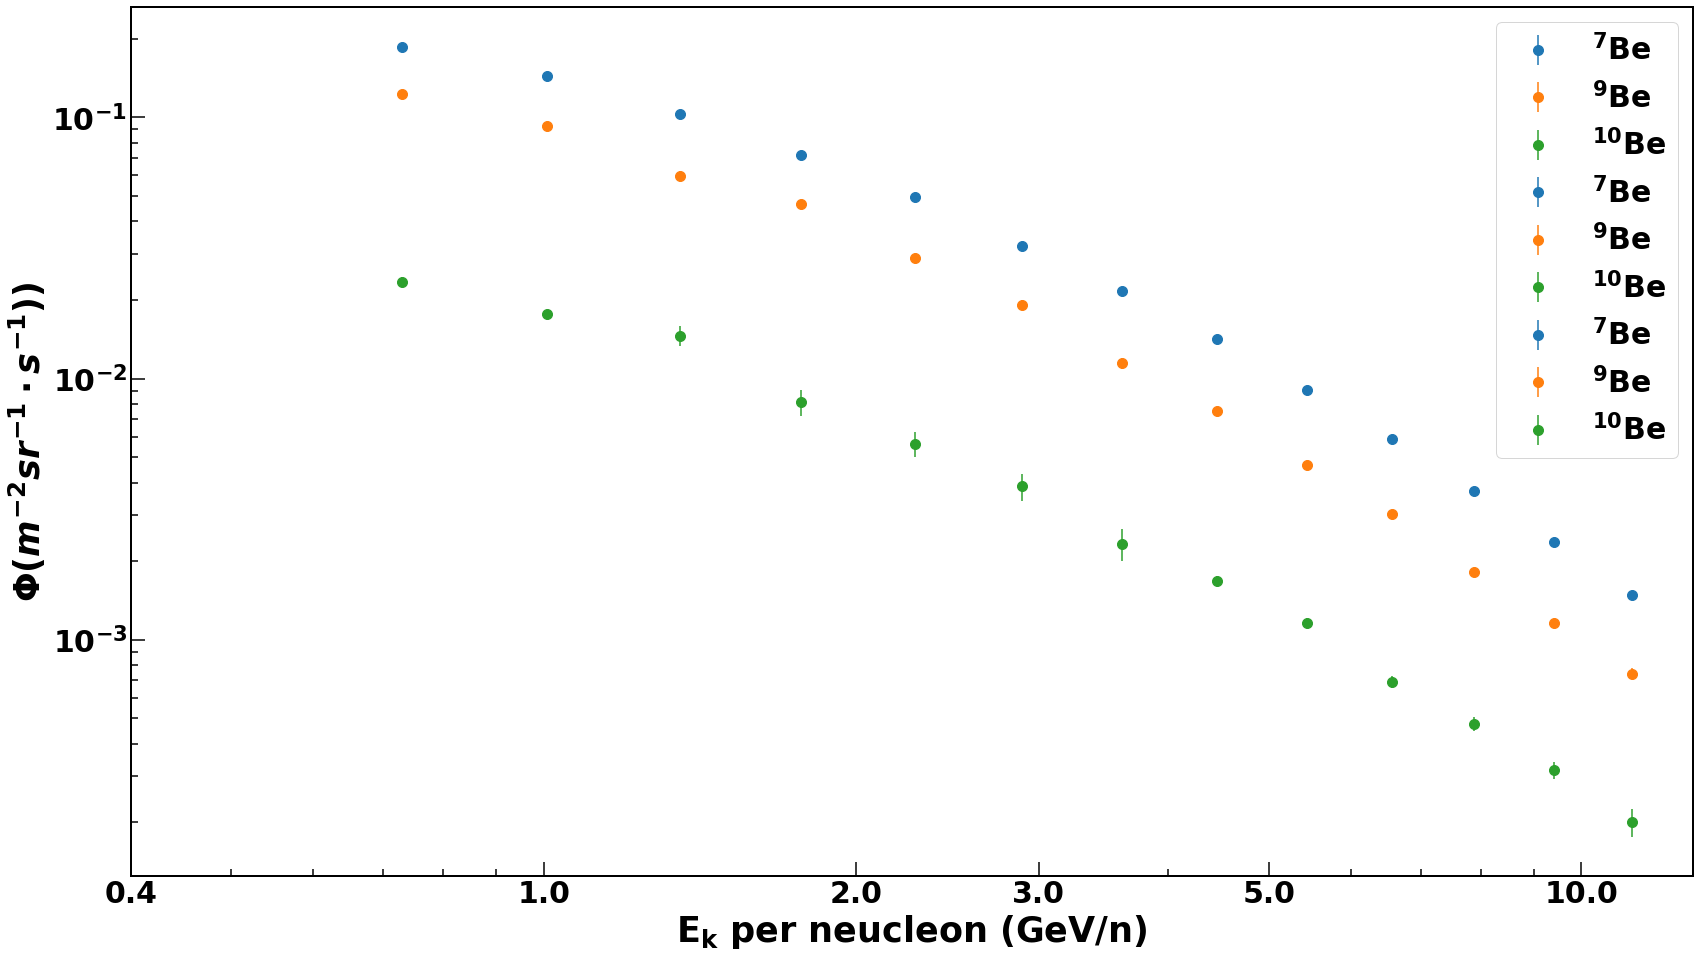

In [199]:
from tools.binnings_collection import fbinning_energy_rebin
graph_flux_raw_rebin = {dec: dict() for dec in detectors} 
graph_rawflux_combined = dict()
xbinning_rebin = Binning(fbinning_energy_rebin())

#xlimvalue = {'Tof':[0.47, 1.1], 'NaF':[1.2, 4.1], 'Agl':[4.3, 12.3]}
xlimvalue = {'Tof':[0.7, 1.1], 'NaF':[1.2, 4.1], 'Agl':[4.3, 12.3]}
for dec in detectors:                                                                                                                                                                                          
    for iso in ISOTOPES[nuclei]:  
        print(dec, iso , graph_flux_raw[dec][iso] )
        graph_flux_raw[dec][iso] = slice_graph_by_value(graph_flux_raw[dec][iso], xlimvalue[dec])
        npoint = int(len(graph_flux_raw[dec][iso].xvalues)/2)
        flux_rebin = np.zeros(npoint)
        flux_rebin_err = np.zeros(npoint)
        x_values = np.zeros(npoint)
        for i in range(npoint):
            x_values[i] = (graph_flux_raw[dec][iso].xvalues[2*i] + graph_flux_raw[dec][iso].xvalues[2*i+1])/2
            flux_rebin[i] = (graph_flux_raw[dec][iso].yvalues[2*i] + graph_flux_raw[dec][iso].yvalues[2*i+1])/2
            flux_rebin_err[i] = (graph_flux_raw[dec][iso].yerrs[2*i] + graph_flux_raw[dec][iso].yerrs[2*i+1])/2
         
        graph_flux_raw_rebin[dec][iso] = MGraph(x_values, flux_rebin, flux_rebin_err)
        
fig, ax1 = plt.subplots(figsize=(28, 16))
for dec in detectors:
    for iso in ISOTOPES[nuclei]:
        plot_graph(fig, ax1, graph_flux_raw_rebin[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=True, markersize=20, label=f"{ISO_LABELS[iso]}")
        
ax1.set_ylabel(r"$\mathrm{\Phi} (m^{-2} sr^{-1} \cdot s^{-1})) }$", fontsize=35) 
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)     
ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend()
savefig_tofile(fig, plotdir, 'be_isoflux_rebin', 1)

for iso in ISOTOPES[nuclei]:
    graph_rawflux_combined[iso] = graph_flux_raw_rebin['Tof'][iso]
    graph_rawflux_combined[iso] = concatenate_graphs(graph_rawflux_combined[iso], graph_flux_raw_rebin['NaF'][iso])
    graph_rawflux_combined[iso] = concatenate_graphs(graph_rawflux_combined[iso], graph_flux_raw_rebin['Agl'][iso])
    
    
graph_flux_ratio_10to9 = graph_rawflux_combined['Be10']/graph_rawflux_combined['Be9']
graph_flux_ratio_9to7 = graph_rawflux_combined['Be9']/graph_rawflux_combined['Be7']
x_values = graph_flux_ratio_10to9.xvalues
print(x_values)
indices = xbinning_rebin.get_indices([x_values[0], x_values[-1]])
x_bin_edges = xbinning_rebin.edges[indices[0]: indices[1]+2] 

# Stack the arrays horizontally to create a 2D array
#combined_array_be10tobe9 = np.vstack((x_bin_edges[:-1], x_bin_edges[1:], graph_flux_ratio_10to9.yvalues, graph_flux_ratio_10to9.yerrs)).T
#combined_array_be9tobe7 = np.vstack((x_bin_edges[:-1], x_bin_edges[1:], graph_flux_ratio_9to7.yvalues, graph_flux_ratio_9to7.yerrs)).T
# Save the combined array to the text file

filepath = '/home/manbing/Documents/Data/data_be_flux/results'
#np.savetxt(os.path.join(filepath, 'Be10ToBe9.txt'), combined_array_be10tobe9, fmt='%f', delimiter='\t')
#np.savetxt(os.path.join(filepath, 'Be9ToBe7.txt'), combined_array_be9tobe7, fmt='%f', delimiter='\t')


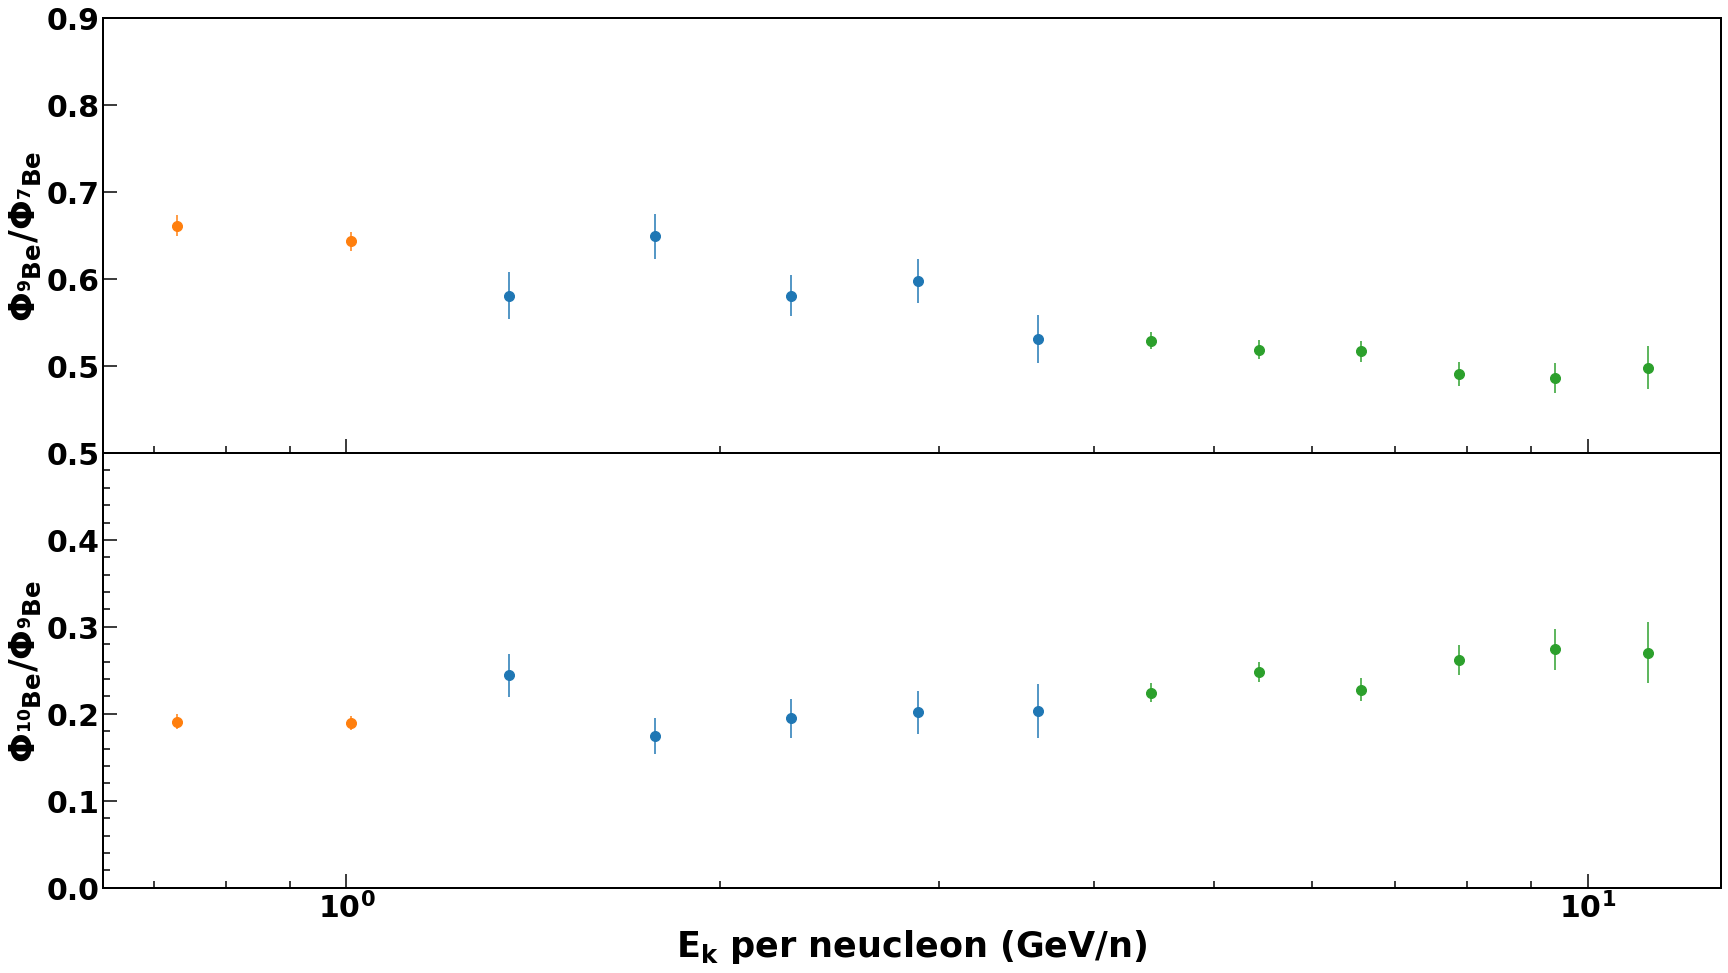

In [200]:
graph_rawflux_ratio_10to9_rebin = dict()
graph_rawflux_ratio_9to7_rebin = dict()

for dec in detectors:
    graph_rawflux_ratio_9to7_rebin[dec] = graph_flux_raw_rebin[dec]['Be9']/graph_flux_raw_rebin[dec]['Be7']
    graph_rawflux_ratio_10to9_rebin[dec] = graph_flux_raw_rebin[dec]['Be10']/graph_flux_raw_rebin[dec]['Be9']
    
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.5, 0.5]}, figsize=(29, 16)) 
#ax1.text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold") 
ax2.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=35) 
for dec in detectors:
    plot_graph(fig, ax2, graph_rawflux_ratio_10to9_rebin[dec], color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=20)
    plot_graph(fig, ax1, graph_rawflux_ratio_9to7_rebin[dec], color=DETECTOR_COLOR[dec], style="EP", xlog=False, ylog=False, markersize=20)
ax2.set_ylim([0.0, 0.5])                                                                                                                             

#ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
#ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                                                                                                                                   
 
ax1.set_ylabel(r"$\mathrm{\Phi_{^{9}Be}/\Phi_{^{7}Be}}$", fontsize=35)   
ax2.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)

ax1.set_ylim([0.4, 0.9])                                                                                                                              
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 
ax2.set_xscale('log')
ax1.set_xscale('log')
savefig_tofile(fig, plotdir, 'be_fluxratio', 1)


####plot flux ratio


xvalues			yvalues			yerrs
0.7298			0.19112726284202214			0.008803179428719924
1.007925			0.18980438215490084			0.007956809532372698
1.352275			0.24452449544791569			0.02460763636956135
1.7719			0.17409089781908269			0.020802750963944162
2.281325			0.19477861422061554			0.02270569796427155
2.88855			0.20159420006125314			0.02517532720508581
3.6069250000000004			0.20327049078680862			0.030543918162660572
4.450025			0.22437999980883008			0.010582448945714093
5.437250000000001			0.2482057715307375			0.011622611675070569
6.569625			0.2277216670792905			0.013063360672682638
7.875175			0.2615363111747255			0.01727887702902675
9.41065			0.274156530992881			0.023452562008580046
11.175925			0.27017096312398			0.03520516502274338


xvalues			yvalues			yerrs
0.733			0.2153			0.0173
1.013			0.1723			0.0138
1.3599999999999999			0.2059			0.0199
1.7799999999999998			0.135			0.0161
2.29			0.1692			0.0178
2.9			0.1862			0.0208
3.615			0.2041			0.027
4.455			0.2574			0.0127
5.45			0.2766			0.0156
6.585	

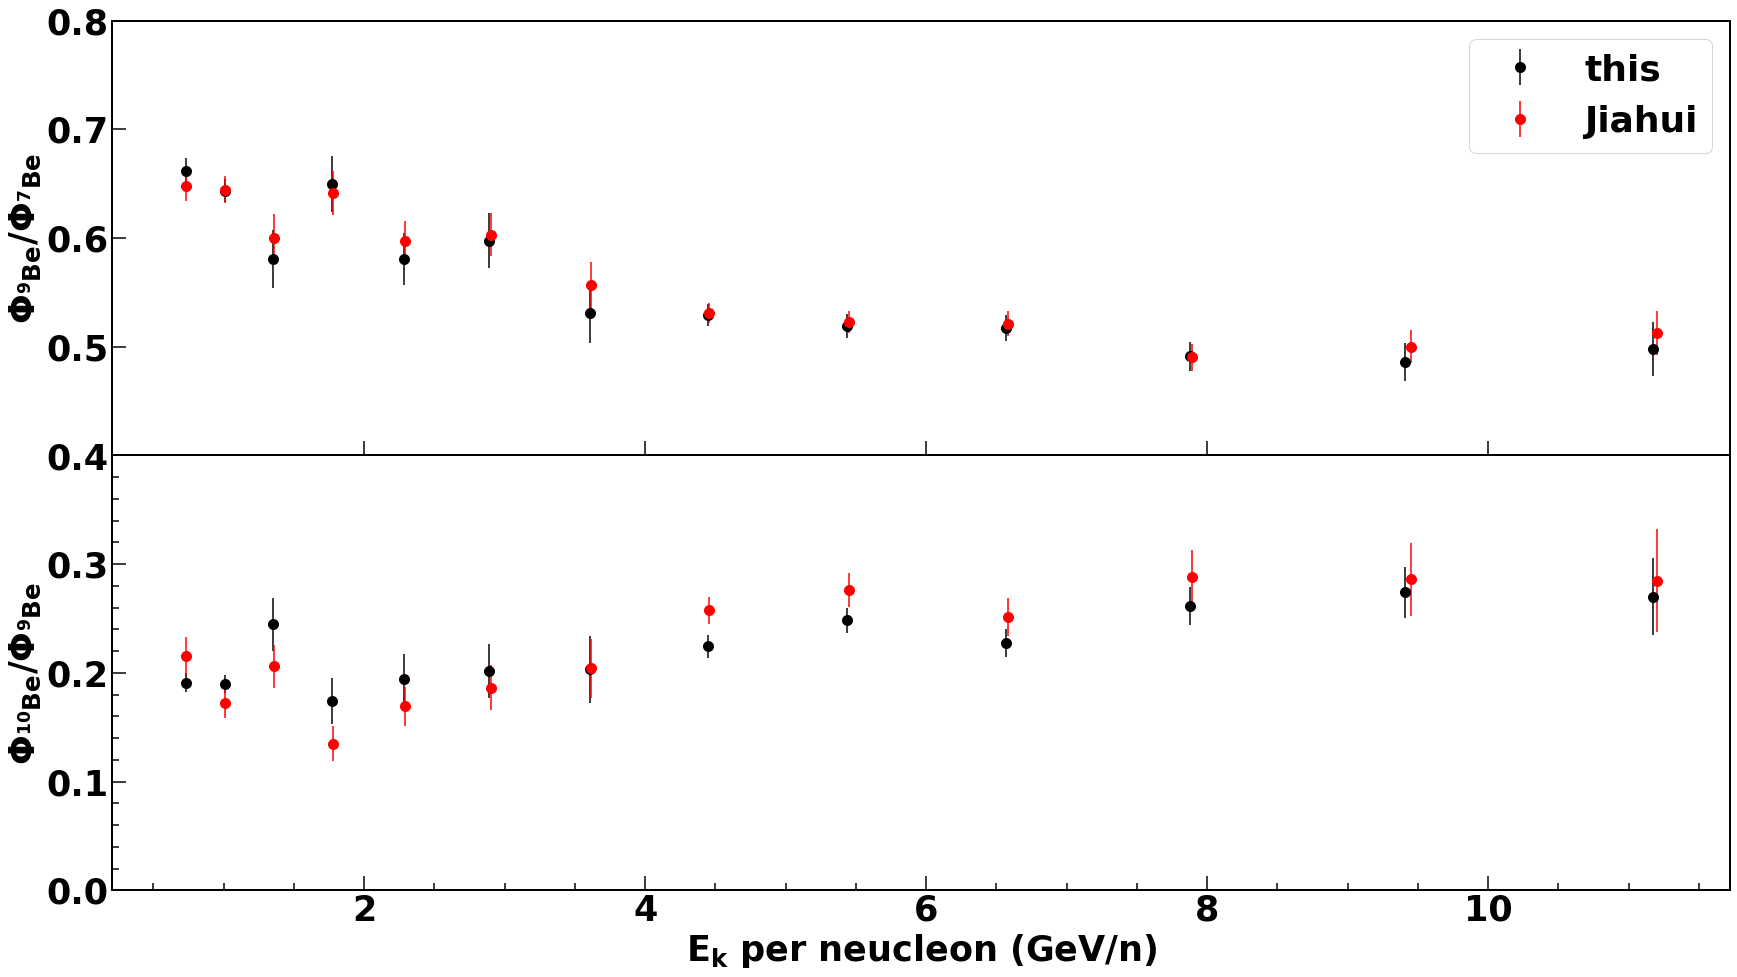

In [201]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.5, 0.5]}, figsize=(29, 16)) 
#ax1.text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold") 
ax2.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=35) 
plot_graph(fig, ax2, graph_flux_ratio_10to9, color='black', style="EP", xlog=False, ylog=False, markersize=20)
ax2.set_ylim([0.0, 0.58])                                                                                                                             

#ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
#ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                                                                                                                                   
 
ax1.set_ylabel(r"$\mathrm{\Phi_{^{9}Be}/\Phi_{^{7}Be}}$", fontsize=35)   
ax2.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)
plot_graph(fig, ax1, graph_flux_ratio_9to7, color='black', style="EP", xlog=False, ylog=False, markersize=20, label='this')
ax1.set_ylim([0.1, 1.0])                                                                                                                              
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 


file_path = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be10Be9.txt'
file_path2 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be9Be7.txt'
# Load the data from the text file
data = np.loadtxt(file_path)
data2 = np.loadtxt(file_path2)
# Split the data into separate arrays for each column
column1 = data[:, 0]
column2 = data[:, 1]
column3 = data[:, 2]
column4 = data[:, 3]
xv = (column1 + column2)/2

column11 = data2[:, 0]
column22 = data2[:, 1]
column33 = data2[:, 2]
column44 = data2[:, 3]
xv2 = (column11 + column22)/2
ax1.set_ylim(0.4, 0.8)
ax2.set_ylim([0.0, 0.4])
graph_laurent_ratiobe10 = MGraph(xv, column3, column4)
graph_laurent_ratiobe9 = MGraph(xv, column33, column44)

#plot_graph(fig, ax2, graph_laurent_ratiobe10, color='red', style="EP", xlog=False, ylog=False, markersize=20, label='Laurent')
plot_graph(fig, ax1, graph_laurent_ratiobe9, color='red', style="EP", xlog=False, ylog=False, markersize=20, label='Jiahui')
# Print the arrays
ax1.legend()
print(graph_flux_ratio_10to9)
print(graph_laurent_ratiobe10)
file_jh_be10 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be10Be9.txt'
file_jh_be9 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be9Be7.txt'
df_jhbe10 = np.loadtxt(file_jh_be10)
df_jhbe9 = np.loadtxt(file_jh_be9)
c1_jh = df_jhbe10[:, 0]
c2_jh = df_jhbe10[:, 1]
c3_jh = df_jhbe10[:, 2]
c4_jh = df_jhbe10[:, 3]
xv_jh = (c1_jh + c2_jh)/2
graph_jiahui_ratiobe10 = MGraph(xv_jh, c3_jh, c4_jh)
plot_graph(fig, ax2, graph_jiahui_ratiobe10, color='red', style="EP", xlog=False, ylog=False, markersize=20, label='Jiahui')

savefig_tofile(fig, filepath, 'be_fluxratio', 1)


xvalues			yvalues			yerrs
0.733			0.2153			0.0173
1.013			0.1723			0.0138
1.3599999999999999			0.2059			0.0199
1.7799999999999998			0.135			0.0161
2.29			0.1692			0.0178
2.9			0.1862			0.0208
3.615			0.2041			0.027
4.455			0.2574			0.0127
5.45			0.2766			0.0156
6.585			0.2514			0.0176
7.89			0.288			0.0252
9.45			0.2862			0.0337
11.2			0.2849			0.047


xvalues			yvalues			yerrs
0.7298			0.01674749611937364			0.0137
1.007925			-0.010903690523311608			0.0127
1.352275			-0.03452984570850672			0.0217
1.7719			0.010690500181904405			0.0203
2.281325			0.0027394734822849256			0.0187
2.88855			-0.0021171941880745045			0.0199
3.6069250000000004			-0.013022584102890327			0.0213
4.450025			0.00590209614237769			0.00925
5.437250000000001			0.0021943255660748107			0.0101
6.569625			-0.001204848557959502			0.0113
7.875175			0.005005407822029593			0.0125
9.41065			-0.0214838902386582			0.0152
11.175925			-0.022464188319136935			0.0203



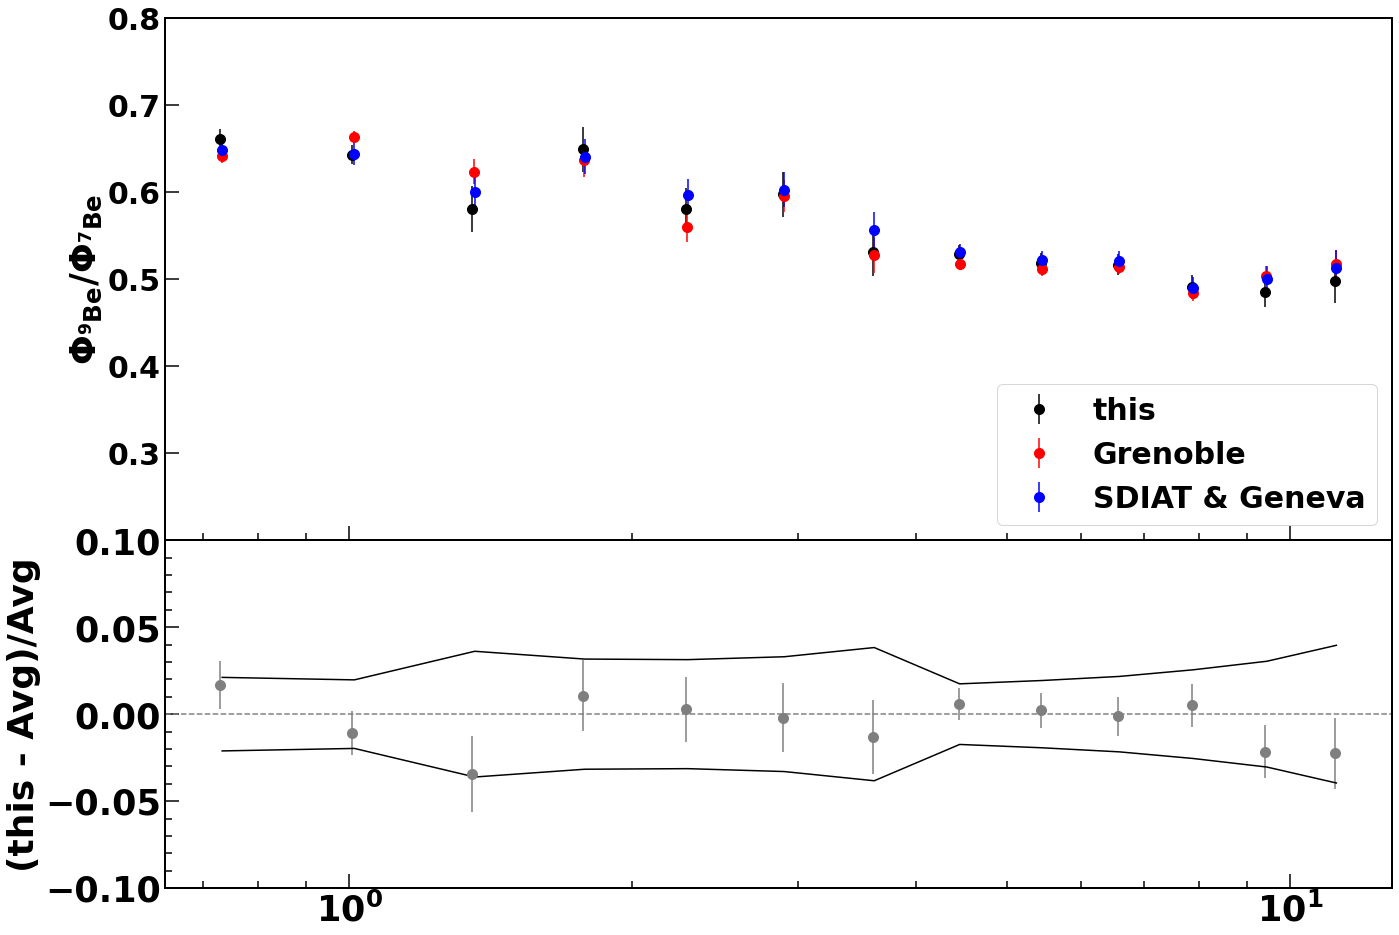

In [202]:
from tools.graphs import scale_graph

file_path7 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/7Be_21_Be7.txt"
file_path9 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/9Be_21_Be9.txt"
file_path10 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/10Be_21_Be10.txt"
# Load the data from the text file
data = np.loadtxt(file_path7)
data2 = np.loadtxt(file_path9)
data3 = np.loadtxt(file_path10)
# Split the data into separate arrays for each column
column71 = data[:, 0]
column72 = data[:, 1]
column73 = data[:, 2]
column74 = data[:, 3]
xv = (column71 + column72)/2

column93 = data2[:, 2]
column94 = data2[:, 3]
column03 = data3[:, 2]
column04 = data3[:, 3]

graph_laurent_fluxbe7 = MGraph(xv, column73, column74)
graph_laurent_fluxbe9 = MGraph(xv, column93, column94)
graph_laurent_fluxbe10 = MGraph(xv, column03, column04)
graph_laurent_ratiobe9 = graph_laurent_fluxbe9/graph_laurent_fluxbe7
graph_laurent_ratiobe10 = graph_laurent_fluxbe10/graph_laurent_fluxbe9


file_jh_be10 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be10Be9.txt'
file_jh_be9 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be9Be7.txt'
df_jhbe10 = np.loadtxt(file_jh_be10)
df_jhe9 = np.loadtxt(file_jh_be9)
c1_jh = df_jhbe10[:, 0]
c2_jh = df_jhbe10[:, 1]
c3_jh = df_jhbe10[:, 2]
c4_jh = df_jhbe10[:, 3]
xv_jh = (c1_jh + c2_jh)/2

c93_jh = df_jhbe9[:, 2]
c94_jh = df_jhbe9[:, 3]
graph_jiahui_ratiobe10 = MGraph(xv_jh, c3_jh, c4_jh)
graph_jiahui_ratiobe9 = MGraph(xv_jh, c93_jh, c94_jh)



fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(22, 16)) 
ax1.set_ylabel(r"$\mathrm{\Phi_{^{9}Be}/\Phi_{^{7}Be}}$", fontsize=35) 
plot_graph(fig, ax1, graph_flux_ratio_9to7, color='black', style="EP", xlog=False, ylog=False, markersize=20, label='this')
plot_graph(fig, ax1, graph_laurent_ratiobe9, color='red', style="EP", xlog=False, ylog=False, markersize=20, label='Grenoble')                              
plot_graph(fig, ax1, graph_jiahui_ratiobe9, color='blue', style="EP", xlog=False, ylog=False, markersize=20, label='SDIAT & Geneva')                                                                                                                              
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)
                                                                                                                             
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 


ax1.set_ylim([0.2, 0.8])
ax1.legend(loc='lower right')
ax1.set_xscale('log')
ax2.set_xscale('log')                                                                                                                       
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 

ax2.set_ylim([-0.1, 0.1])
graph_average_be9ratio = scale_graph(graph_jiahui_ratiobe9 + graph_flux_ratio_9to7 + graph_laurent_ratiobe9, 1/3)

graph_difference_to_avg = (graph_flux_ratio_9to7 + scale_graph(graph_average_be9ratio, -1))/graph_average_be9ratio
print(graph_jiahui_ratiobe10)
errorband =  graph_jiahui_ratiobe9.yerrs/graph_jiahui_ratiobe9.yvalues
graph_lower_errorband = MGraph(graph_jiahui_ratiobe9.xvalues, -errorband, np.zeros_like(errorband))
graph_upper_errorband = MGraph(graph_jiahui_ratiobe9.xvalues, errorband, np.zeros_like(errorband))

graph_difference_to_avg.yerrs = graph_jiahui_ratiobe9.yerrs
print(graph_difference_to_avg)
#difference_to_avg.yvalues = abs(difference_to_avg.yvalues)
plot_graph(fig, ax2, graph_difference_to_avg, color='tab:grey', style="EP", xlog=False, ylog=False, markersize=20)                                                                                                                              
ax2.plot(graph_lower_errorband.xvalues, graph_lower_errorband.yvalues, '-', color='black')
ax2.plot(graph_lower_errorband.xvalues, graph_upper_errorband.yvalues, '-', color='black')
ax2.set_ylabel('(this - Avg)/Avg')
ax2.axhline(y=0.0, color='grey', linestyle='--')
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate0410/plots_0410'
savefig_tofile(fig, plotfile, 'be_fluxratio_be9_tunedmc', 1)



xvalues			yvalues			yerrs
0.733			0.2153			0.0173
1.013			0.1723			0.0138
1.3599999999999999			0.2059			0.0199
1.7799999999999998			0.135			0.0161
2.29			0.1692			0.0178
2.9			0.1862			0.0208
3.615			0.2041			0.027
4.455			0.2574			0.0127
5.45			0.2766			0.0156
6.585			0.2514			0.0176
7.89			0.288			0.0252
9.45			0.2862			0.0337
11.2			0.2849			0.047


xvalues			yvalues			yerrs
0.7298			-0.011265299842816177			0.0173
1.007925			0.07321935965986272			0.0138
1.352275			0.16049054217816688			0.0199
1.7719			0.12329420663936667			0.0161
2.281325			0.05139581233265121			0.0178
2.88855			0.07088526195866905			0.0208
3.6069250000000004			0.000702277142976282			0.027
4.450025			-0.07730500103304112			0.0127
5.437250000000001			-0.0539379288395775			0.0156
6.569625			-0.058401985082887804			0.0176
7.875175			-0.07121362440602308			0.0252
9.41065			-0.03112400377973202			0.0337
11.175925			-0.048014194961419905			0.047



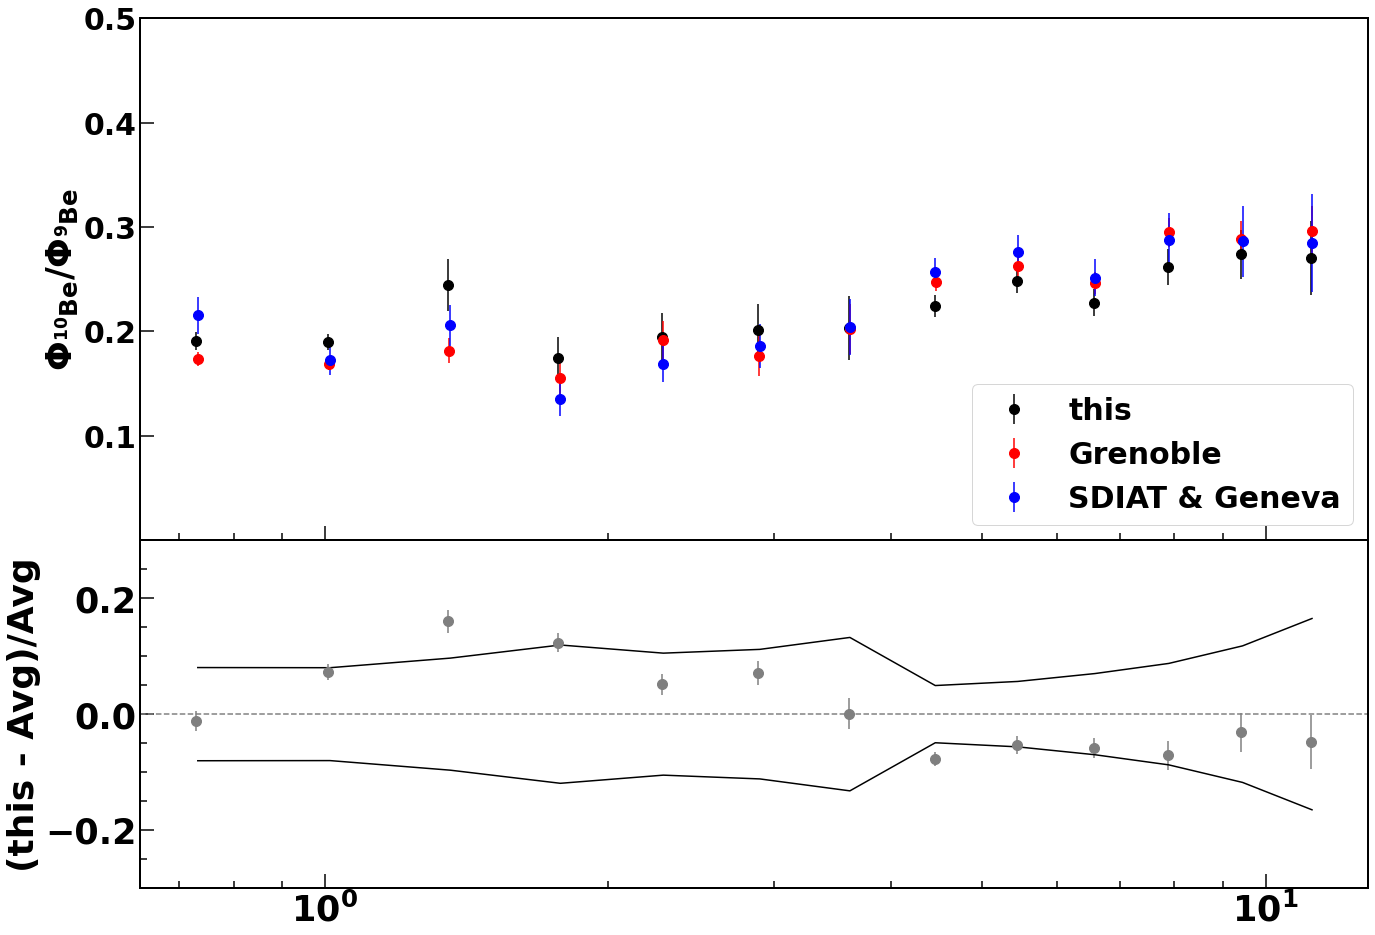

In [203]:
from tools.graphs import scale_graph

file_path7 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/7Be_21_Be7.txt"
file_path9 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/9Be_21_Be9.txt"
file_path10 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/10Be_21_Be10.txt"
# Load the data from the text file
data = np.loadtxt(file_path7)
data2 = np.loadtxt(file_path9)
data3 = np.loadtxt(file_path10)
# Split the data into separate arrays for each column
column71 = data[:, 0]
column72 = data[:, 1]
column73 = data[:, 2]
column74 = data[:, 3]
xv = (column71 + column72)/2

column93 = data2[:, 2]
column94 = data2[:, 3]
column03 = data3[:, 2]
column04 = data3[:, 3]

graph_laurent_fluxbe7 = MGraph(xv, column73, column74)
graph_laurent_fluxbe9 = MGraph(xv, column93, column94)
graph_laurent_fluxbe10 = MGraph(xv, column03, column04)
graph_laurent_ratiobe9 = graph_laurent_fluxbe9/graph_laurent_fluxbe7
graph_laurent_ratiobe10 = graph_laurent_fluxbe10/graph_laurent_fluxbe9


file_jh_be10 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be10Be9.txt'
file_jh_be9 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be9Be7.txt'
df_jhbe10 = np.loadtxt(file_jh_be10)
df_jhe9 = np.loadtxt(file_jh_be9)
c1_jh = df_jhbe10[:, 0]
c2_jh = df_jhbe10[:, 1]
c3_jh = df_jhbe10[:, 2]
c4_jh = df_jhbe10[:, 3]
xv_jh = (c1_jh + c2_jh)/2

c93_jh = df_jhbe9[:, 2]
c94_jh = df_jhbe9[:, 3]
graph_jiahui_ratiobe10 = MGraph(xv_jh, c3_jh, c4_jh)
graph_jiahui_ratiobe9 = MGraph(xv_jh, c93_jh, c94_jh)



fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(22, 16)) 
ax1.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=35) 
plot_graph(fig, ax1, graph_flux_ratio_10to9, color='black', style="EP", xlog=False, ylog=False, markersize=20, label='this')
plot_graph(fig, ax1, graph_laurent_ratiobe10, color='red', style="EP", xlog=False, ylog=False, markersize=20, label='Grenoble')                              
plot_graph(fig, ax1, graph_jiahui_ratiobe10, color='blue', style="EP", xlog=False, ylog=False, markersize=20, label='SDIAT & Geneva')                                                                                                                              
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)
                                                                                                                             
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 


ax1.set_ylim([0.0, 0.5])
ax1.legend(loc='lower right')
ax1.set_xscale('log')
ax2.set_xscale('log')                                                                                                                       
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 

ax2.set_ylim([-0.3, 0.3])
graph_average_be10ratio = scale_graph(graph_jiahui_ratiobe10 + graph_flux_ratio_10to9 + graph_laurent_ratiobe10, 1/3)

graph_difference_to_avg = (graph_flux_ratio_10to9 + scale_graph(graph_average_be10ratio, -1))/graph_average_be10ratio
print(graph_jiahui_ratiobe10)
errorband =  graph_jiahui_ratiobe10.yerrs/graph_jiahui_ratiobe10.yvalues
graph_lower_errorband = MGraph(graph_jiahui_ratiobe10.xvalues, -errorband, np.zeros_like(errorband))
graph_upper_errorband = MGraph(graph_jiahui_ratiobe10.xvalues, errorband, np.zeros_like(errorband))

graph_difference_to_avg.yerrs = graph_jiahui_ratiobe10.yerrs
print(graph_difference_to_avg)
#difference_to_avg.yvalues = abs(difference_to_avg.yvalues)
plot_graph(fig, ax2, graph_difference_to_avg, color='tab:grey', style="EP", xlog=False, ylog=False, markersize=20)                                                                                                                              
ax2.plot(graph_lower_errorband.xvalues, graph_lower_errorband.yvalues, '-', color='black')
ax2.plot(graph_lower_errorband.xvalues, graph_upper_errorband.yvalues, '-', color='black')
ax2.set_ylabel('(this - Avg)/Avg')
ax2.axhline(y=0.0, color='grey', linestyle='--')
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate0410/plots_0410'
savefig_tofile(fig, plotfile, 'be_fluxratio_be10_tunedmc', 1)


################################################################################################ <br>
####compute the raw flux with counts from the fit <font color="red">fix shape parameters, only mean is free</font>  
#################################################################################################


xvalues			yvalues			yerrs
0.733			0.6481			0.0137
1.013			0.6445			0.0127
1.3599999999999999			0.6004			0.0217
1.7799999999999998			0.6411			0.0203
2.29			0.5968			0.0187
2.9			0.6031			0.0199
3.615			0.5563			0.0213
4.455			0.531			0.00925
5.45			0.5223			0.0101
6.585			0.5212			0.0113
7.89			0.4903			0.0125
9.45			0.4998			0.0152
11.2			0.5129			0.0203



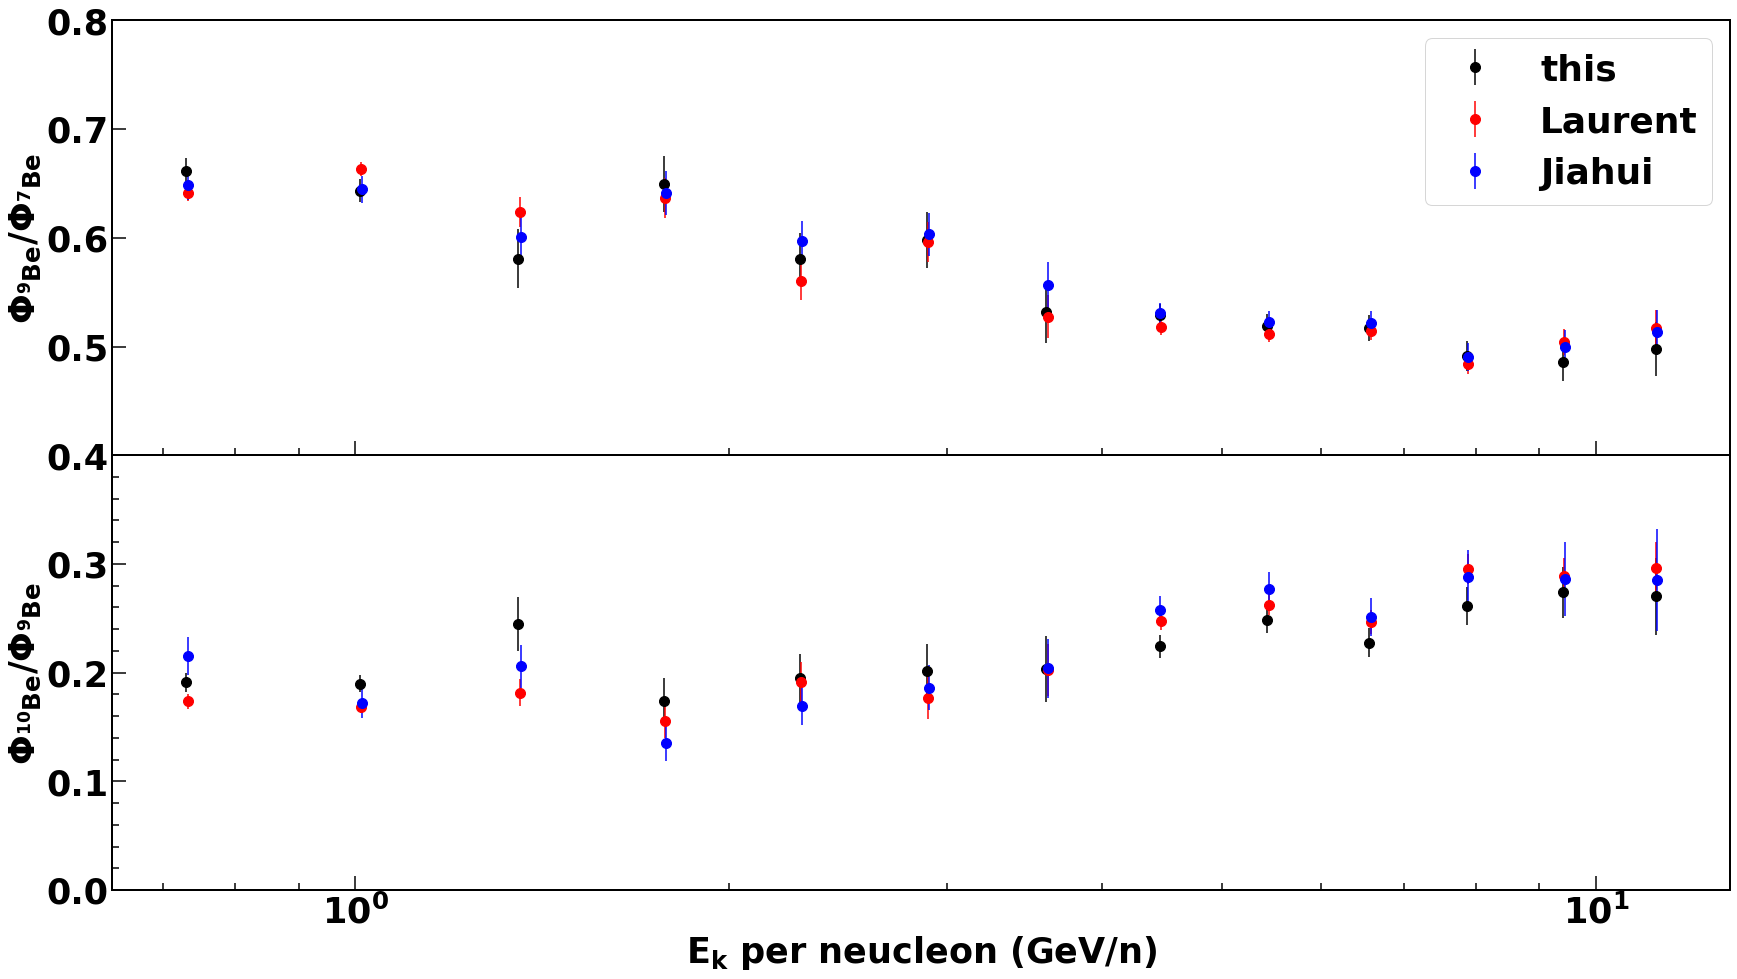

In [204]:


fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.5, 0.5]}, figsize=(29, 16)) 
#ax1.text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold") 
ax2.set_ylabel(r"$\mathrm{\Phi_{^{10}Be}/\Phi_{^{9}Be}}$", fontsize=35) 
plot_graph(fig, ax2, graph_flux_ratio_10to9, color='black', style="EP", xlog=False, ylog=False, markersize=20)

#plot_graph(fig, ax2, graph_fluxratio_fixshape_10to9, color='black', style="EP", xlog=False, ylog=False, markersize=20)
ax2.set_ylim([0.0, 0.58])                                                                                                                             

#ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
#ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                                                                                                                                   
 
ax1.set_ylabel(r"$\mathrm{\Phi_{^{9}Be}/\Phi_{^{7}Be}}$", fontsize=35)   
ax2.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)
plot_graph(fig, ax1, graph_flux_ratio_9to7, color='black', style="EP", xlog=False, ylog=False, markersize=20, label='this')
ax1.set_ylim([0.1, 1.0])                                                                                                                              
ax1.set_xticklabels([])
plt.subplots_adjust(hspace=.0)   
ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2) 
#plot_graph(fig, ax2, graph_flux_ratio_10to9, color='black', style="EP", xlog=False, ylog=False, markersize=20)
#plot_graph(fig, ax1, graph_flux_ratio_9to7, color='black', style="EP", xlog=False, ylog=False, markersize=20, label='this')


#file_path = "/home/manbing/Documents/lithiumanalysis/Plots_SPS_manbing/Jiahui_ICRC2023_results/ratio_Be10Be9.txt"
#file_path2 = "/home/manbing/Documents/lithiumanalysis/Plots_SPS_manbing/Jiahui_ICRC2023_results/ratio_Be9Be7.txt"
file_path7 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/7Be_21_Be7.txt"
file_path9 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/9Be_21_Be9.txt"
file_path10 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/10Be_21_Be10.txt"
# Load the data from the text file
data = np.loadtxt(file_path7)
data2 = np.loadtxt(file_path9)
data3 = np.loadtxt(file_path10)
# Split the data into separate arrays for each column
column71 = data[:, 0]
column72 = data[:, 1]
column73 = data[:, 2]
column74 = data[:, 3]
xv = (column71 + column72)/2

column93 = data2[:, 2]
column94 = data2[:, 3]
column03 = data3[:, 2]
column04 = data3[:, 3]

graph_laurent_fluxbe7 = MGraph(xv, column73, column74)
graph_laurent_fluxbe9 = MGraph(xv, column93, column94)
graph_laurent_fluxbe10 = MGraph(xv, column03, column04)
graph_laurent_ratiobe9 = graph_laurent_fluxbe9/graph_laurent_fluxbe7
graph_laurent_ratiobe10 = graph_laurent_fluxbe10/graph_laurent_fluxbe9

plot_graph(fig, ax2, graph_laurent_ratiobe10, color='red', style="EP", xlog=False, ylog=False, markersize=20, label='Laurent')
plot_graph(fig, ax1, graph_laurent_ratiobe9, color='red', style="EP", xlog=False, ylog=False, markersize=20, label='Laurent')
# Print the arrays


#print(graph_laurent_ratiobe10)
file_jh_be10 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be10Be9.txt'
file_jh_be9 = '/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/ratio_Be9Be7.txt'
#file_jh_be9 = '/home/manbing/Documents/lithiumanalysis/Plots_SPS_manbing/Jiahui_ICRC2023_results/ratio_Be9Be7.txt'
df_jhbe10 = np.loadtxt(file_jh_be10)
df_jhbe9 = np.loadtxt(file_jh_be9)
c1_jh = df_jhbe10[:, 0]
c2_jh = df_jhbe10[:, 1]
c3_jh = df_jhbe10[:, 2]
c4_jh = df_jhbe10[:, 3]
xv_jh = (c1_jh + c2_jh)/2

c93_jh = df_jhbe9[:, 2]
c94_jh = df_jhbe9[:, 3]
graph_jiahui_ratiobe10 = MGraph(xv_jh, c3_jh, c4_jh)
graph_jiahui_ratiobe9 = MGraph(xv_jh, c93_jh, c94_jh)
ax1.set_ylim(0.4, 0.8)
ax2.set_ylim([0.0, 0.4])
print(graph_jiahui_ratiobe9)
plot_graph(fig, ax2, graph_jiahui_ratiobe10, color='blue', style="EP", xlog=False, ylog=False, markersize=20, label='Jiahui')
plot_graph(fig, ax1, graph_jiahui_ratiobe9, color='blue', style="EP", xlog=False, ylog=False, markersize=20, label='Jiahui')
ax1.legend()
ax1.set_xscale('log')
ax2.set_xscale('log')
savefig_tofile(fig, filepath, 'be_fluxratio_v23', 1)


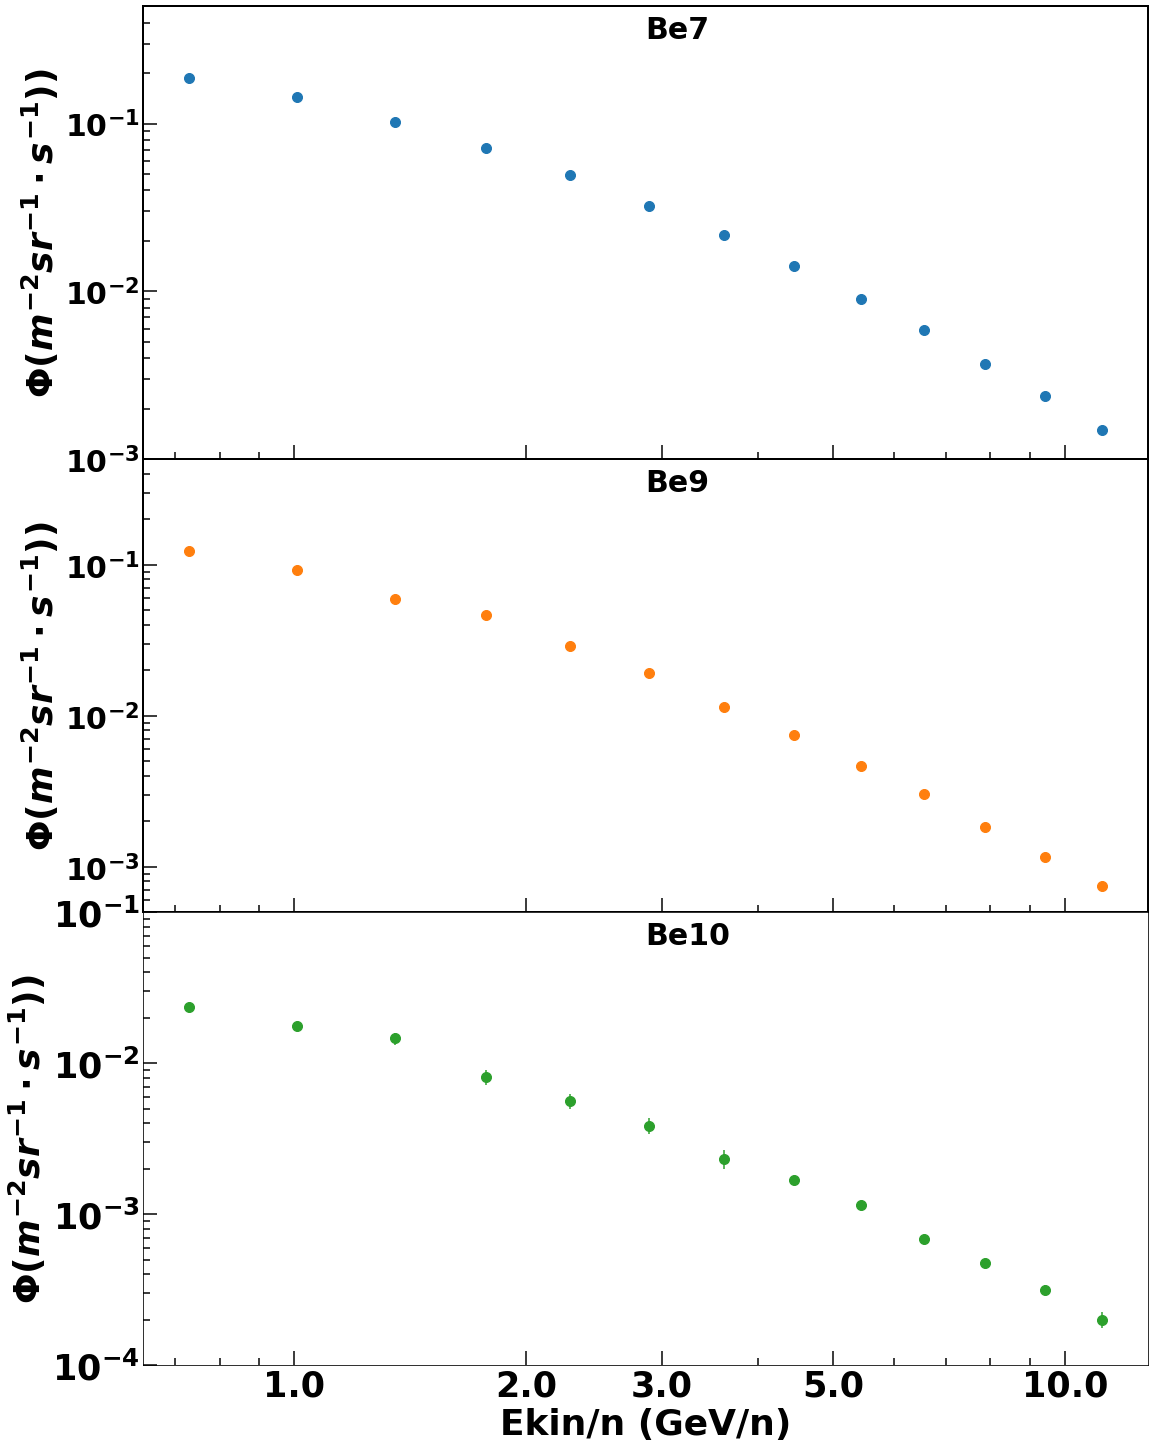

In [205]:
isoylim={'Be7': [0.001, 0.5], 'Be9':[0.0005, 0.5], 'Be10':[0.0001, 0.1]}
    
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, gridspec_kw={'height_ratios':[0.33, 0.33, 0.33]}, figsize=(18, 25))
ax = [ax1, ax2, ax3]
for i, iso in enumerate(ISOTOPES['Be']):
    ax[i].text(0.5, 0.98, f"{iso}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax[i].transAxes, color="black", fontweight="bold")
    ax[i].set_ylabel(r"$\mathrm{\Phi} (m^{-2} sr^{-1} \cdot s^{-1})) }$")   
    plot_graph(fig, ax[i], graph_rawflux_combined[iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=True, markersize=20)
    ax[i].set_ylim(isoylim[iso])    


ax3.set_xlabel("Ekin/n (GeV/n)")     
ax3.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())                                                                                                                                   
ax1.sharex(ax3)   
ax2.sharex(ax3)

ax1.get_xticklabels()[0].set_visible(False)   
ax2.get_xticklabels()[0].set_visible(False) 
set_plot_defaultstyle(ax1)                                                                                                                                                                                 
set_plot_defaultstyle(ax2)   
plt.subplots_adjust(hspace=.0)
savefig_tofile(fig, plotdir, 'be_isoflux', 1)




plot unfolding factor

['unfold_factor_TofBe7_xvalues', 'unfold_factor_TofBe7_yvalues', 'unfold_factor_TofBe7_yerrs', 'unfold_factor_TofBe7_labels', 'unfold_factor_TofBe9_xvalues', 'unfold_factor_TofBe9_yvalues', 'unfold_factor_TofBe9_yerrs', 'unfold_factor_TofBe9_labels', 'unfold_factor_TofBe10_xvalues', 'unfold_factor_TofBe10_yvalues', 'unfold_factor_TofBe10_yerrs', 'unfold_factor_TofBe10_labels', 'unfold_factor_NaFBe7_xvalues', 'unfold_factor_NaFBe7_yvalues', 'unfold_factor_NaFBe7_yerrs', 'unfold_factor_NaFBe7_labels', 'unfold_factor_NaFBe9_xvalues', 'unfold_factor_NaFBe9_yvalues', 'unfold_factor_NaFBe9_yerrs', 'unfold_factor_NaFBe9_labels', 'unfold_factor_NaFBe10_xvalues', 'unfold_factor_NaFBe10_yvalues', 'unfold_factor_NaFBe10_yerrs', 'unfold_factor_NaFBe10_labels', 'unfold_factor_AglBe7_xvalues', 'unfold_factor_AglBe7_yvalues', 'unfold_factor_AglBe7_yerrs', 'unfold_factor_AglBe7_labels', 'unfold_factor_AglBe9_xvalues', 'unfold_factor_AglBe9_yvalues', 'unfold_factor_AglBe9_yerrs', 'unfold_factor_AglBe9_

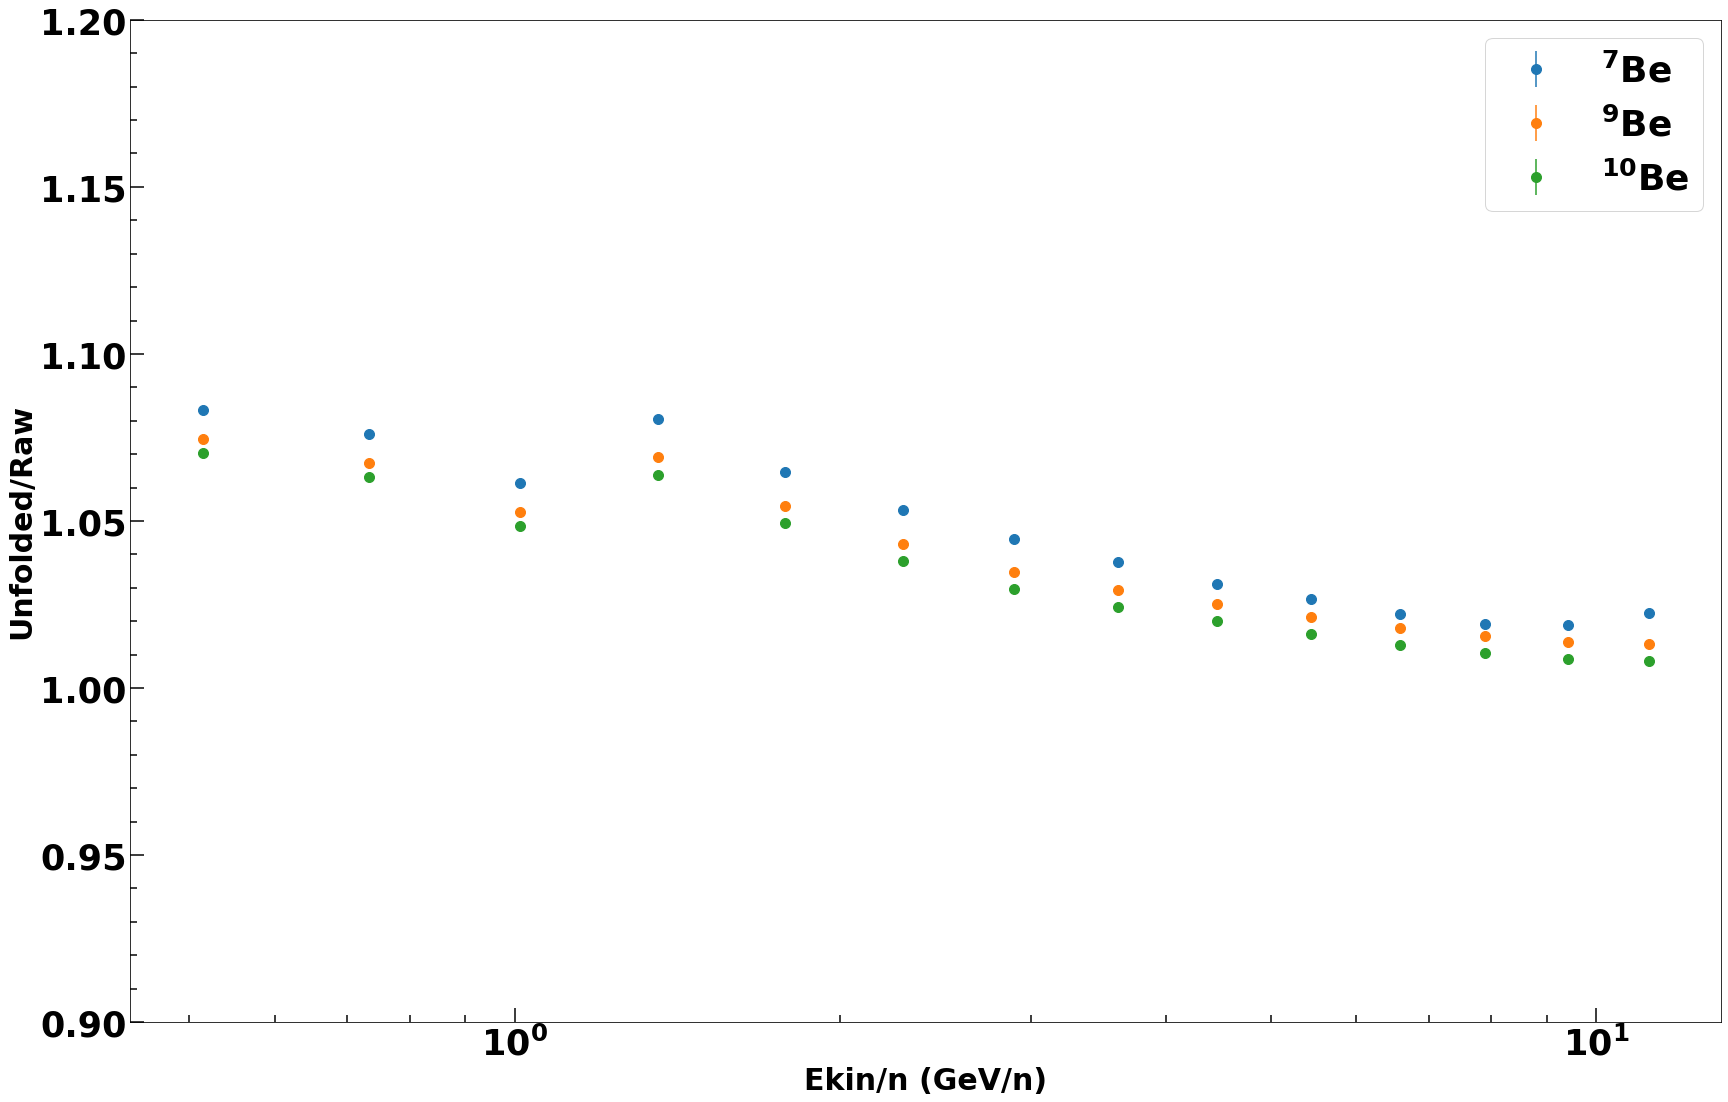

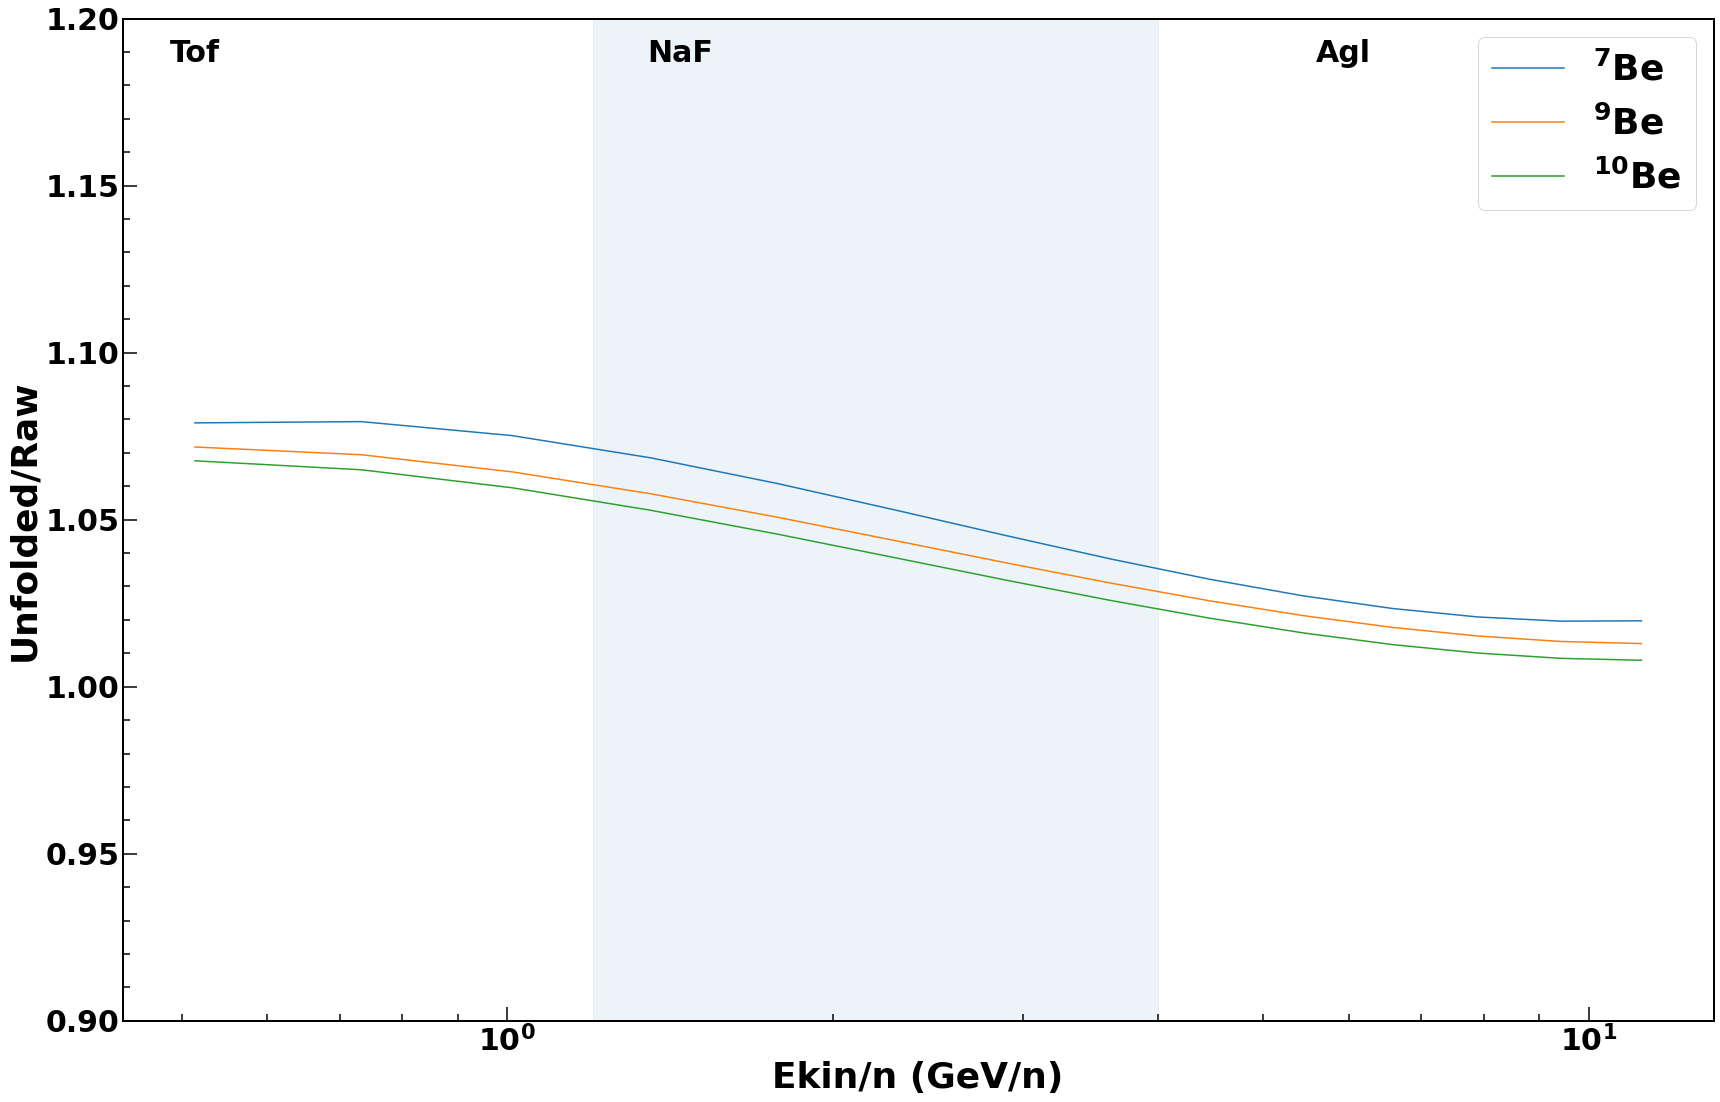

In [209]:
datadirP7 = '/home/manbing/Documents/Data/data_BeP7_Iso/'
file_unfold = datadirP7 + 'graph_unfold_factor.npz'
df_unfold = np.load(f'{file_unfold}')
xbinning = Binning(fbinning_energy_rebin())
print(list(df_unfold.keys()))
spline_unfold_factor = {dec: {} for dec in detectors}
graph_unfold_factor = {dec: {} for dec in detectors}
graph_unfold_factor_rebin = {dec: {} for dec in detectors}
xvaluerange = {'Tof': [0.6, 1.0], 'NaF':[1.2, 3.6], 'Agl':[4.2, 11]}
for dec in detectors:
    for iso in ISOTOPES[nuclei]:
        graph_unfold_factor[dec][iso] = MGraph.from_file(df_unfold, f'unfold_factor_{dec}{iso}')
        spline_unfold_factor[dec][iso] = UnivariateSpline(np.log(graph_unfold_factor[dec][iso].xvalues), graph_unfold_factor[dec][iso].yvalues, k=3, s=5)           
        unfoldfactor = spline_unfold_factor[dec][iso](np.log(xbinning.bin_centers[1:-1]))
        graph_unfold_factor_rebin[dec][iso] = MGraph(xbinning.bin_centers[1:-1], unfoldfactor, np.zeros_like(unfoldfactor))
        #graph_unfold_factor_rebin[dec][iso] = slice_graph_by_value(graph_unfold_factor_rebin[dec][iso], slicevalue[dec])

        
fig, ax1 = plt.subplots(figsize=(26, 16))                                                                                                            
fig.subplots_adjust(left= 0.12, right=0.97, bottom=0.08, top=0.95)
for dec in detectors:
    for iso in ISOTOPES[nuclei]:
        #plot_graph(fig, ax1, graph_spline_unfoldfactor[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=False, markersize=20, label=f"{ISO_LABELS[iso]}")
        graph_unfold_factor_rebin[dec][iso] = slice_graph_by_value(graph_unfold_factor_rebin[dec][iso], xvaluerange[dec])
        if dec == 'Tof':
            plot_graph(fig, ax1, graph_unfold_factor_rebin[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=False, markersize=20, label=f"{ISO_LABELS[iso]}")
        else:
            plot_graph(fig, ax1, graph_unfold_factor_rebin[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=False, markersize=20)

ax1.legend()
ax1.set_ylim([0.9, 1.2])
ax1.set_xlabel('Ekin/n (GeV/n)')
ax1.set_ylabel('Unfolded/Raw')
graph_unfoldfactor_combined = {}
spline_unfoldfactor = {}
graph_spline_unfoldfactor = {}
for iso in ISOTOPES[nuclei]:
    graph_unfoldfactor_combined[iso] = concatenate_graphs(graph_unfold_factor_rebin['Tof'][iso], graph_unfold_factor_rebin['NaF'][iso])
    graph_unfoldfactor_combined[iso] = concatenate_graphs(graph_unfoldfactor_combined[iso], graph_unfold_factor_rebin['Agl'][iso])
    
    spline_unfoldfactor[iso] = UnivariateSpline(np.log(graph_unfoldfactor_combined[iso].xvalues), graph_unfoldfactor_combined[iso].yvalues, k=3, s=5)
    graph_spline_unfoldfactor[iso] = MGraph(graph_unfoldfactor_combined[iso].xvalues, spline_unfoldfactor[iso](np.log(graph_unfoldfactor_combined[iso].xvalues)), np.zeros_like(graph_unfoldfactor_combined[iso].xvalues))
    
    
fig, ax1 = plt.subplots(figsize=(26, 16))                                                                                                            
fig.subplots_adjust(left= 0.12, right=0.97, bottom=0.08, top=0.95)
for iso in ISOTOPES[nuclei]:
    plot_graph(fig, ax1, graph_spline_unfoldfactor[iso], color=ISOTOPES_COLOR[iso], style="hist", xlog=True, ylog=False, markersize=20, label=f"{ISO_LABELS[iso]}")
for dec in detectors:
    ax1.text(xaxistext[dec], 0.98, f"{dec}", fontsize=FONTSIZE, verticalalignment='top', horizontalalignment='left', transform=ax1.transAxes, color='black', fontweight="bold")    
    for iso in ISOTOPES[nuclei]:
        #plot_graph(fig, ax1, graph_spline_unfoldfactor[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=False, markersize=20, label=f"{ISO_LABELS[iso]}")
        graph_unfold_factor_rebin[dec][iso] = slice_graph_by_value(graph_unfold_factor_rebin[dec][iso], xvaluerange[dec])
        #plot_graph(fig, ax1, graph_unfold_factor_rebin[dec][iso], color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=False, markersize=20)
ax1.set_ylim([0.9, 1.2])
ax1.fill_betweenx(np.linspace(0.9, 1.2, 100), 1.2, 4.0, alpha=0.08, color="tab:blue") 
ax1.legend()
ax1.set_xlabel('Ekin/n (GeV/n)')
ax1.set_ylabel('Unfolded/Raw')
set_plot_defaultstyle(ax1)  
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate0410/plots_0410'
savefig_tofile(fig, plotfile, 'be_unfolding_factor2', 1)


savefig_tofile(fig, plotdir, 'be_unfolding_factor', 1)

skip #
skip #
skip #
skip #
skip #
skip #


(5e-05, 1.5)

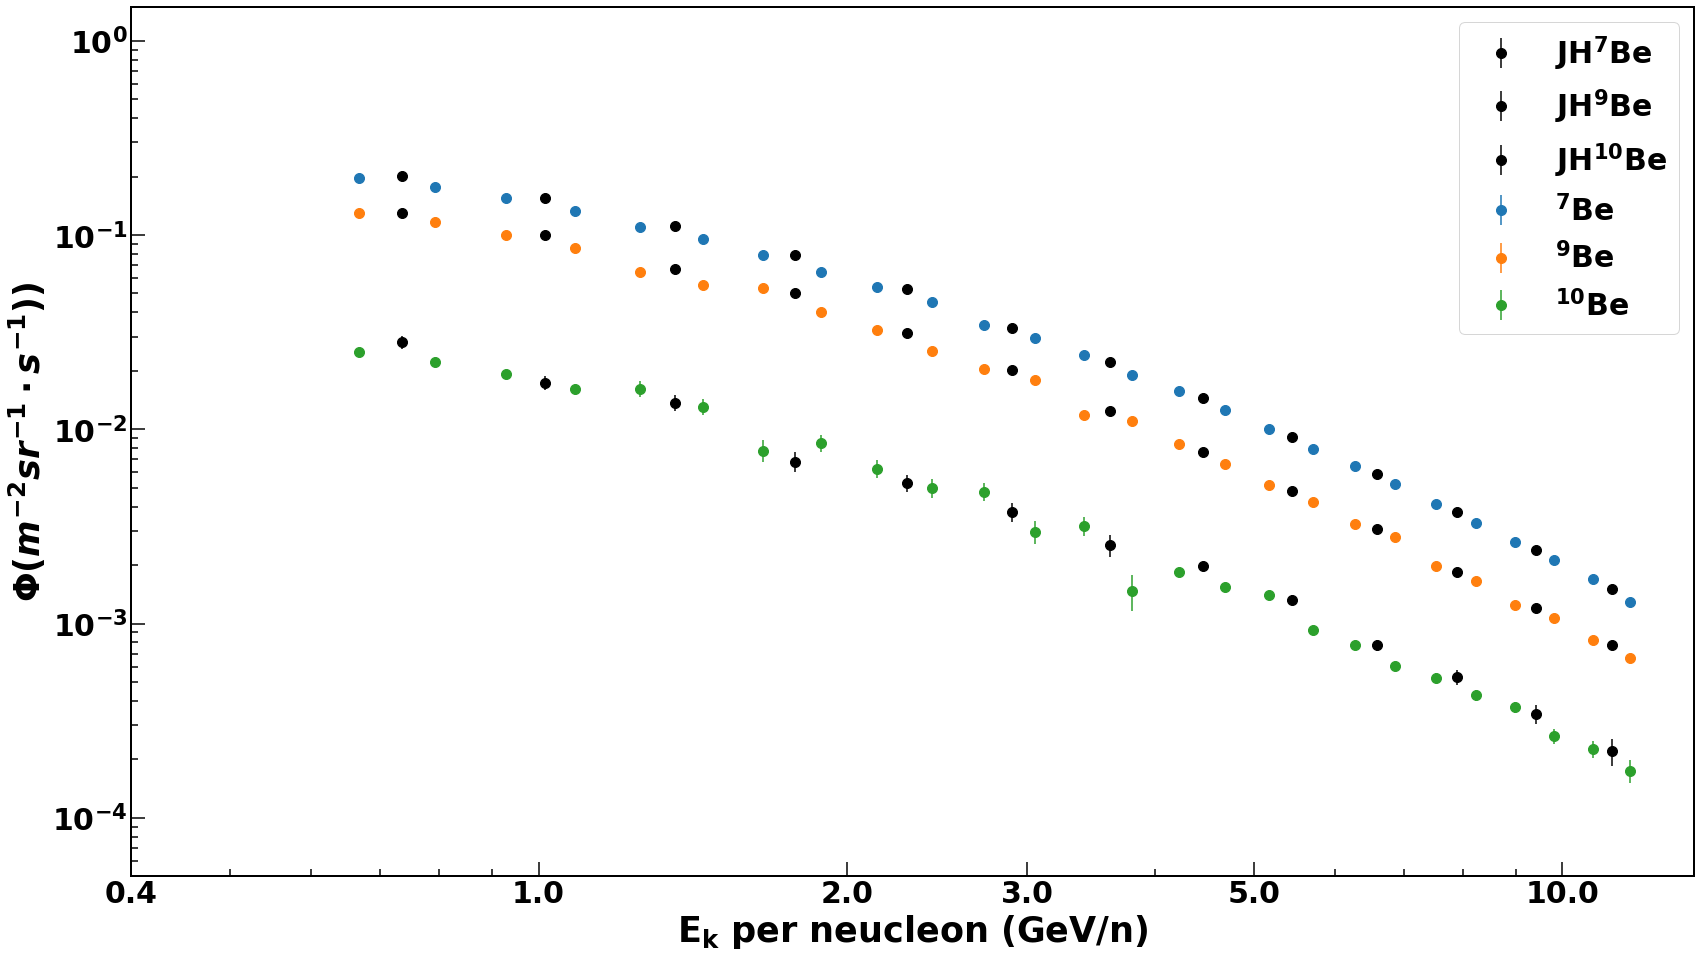

In [212]:
def getgraph_fromtxtfile(filename):
    
    Ek_low = []
    Ek_high = []
    Flux = []
    Stat_err = []
    Total_err = []
    with open(f'{filename}', 'r') as file:
        for line in file:
            # Check if the line starts with #
            if not line.startswith('#'):
                # Split the line into columns using ',' as the delimiter
                columns = line.strip().split(',')
            
                # Convert each column to a floating-point number and append to respective lists
                Ek_low.append(float(columns[0]))
                Ek_high.append(float(columns[1]))
                Flux.append(float(columns[2]))
                Stat_err.append(float(columns[3]))
                Total_err.append(float(columns[4]))
            else:
                print('skip #')
        # Convert lists to numpy arrays
        Ek_low = np.array(Ek_low)
        Ek_high = np.array(Ek_high)
        Flux = np.array(Flux)
        Stat_err = np.array(Stat_err)
        Total_err = np.array(Total_err)
        graph_flux_jiahui = MGraph(0.5*(Ek_low+Ek_high), Flux, Total_err)
    return graph_flux_jiahui

file_path7 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/7Be_21_Be7.txt"
file_path9 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/9Be_21_Be9.txt"
file_path10 = "/home/manbing/Documents/Data/jiahui/laurent/fluxes/10Be_21_Be10.txt"
# Load the data from the text file
data = np.loadtxt(file_path7)
data2 = np.loadtxt(file_path9)
data3 = np.loadtxt(file_path10)
# Split the data into separate arrays for each column
column71 = data[:, 0]
column72 = data[:, 1]
column73 = data[:, 2]
column74 = data[:, 3]
xv = (column71 + column72)/2

column93 = data2[:, 2]
column94 = data2[:, 3]
column03 = data3[:, 2]
column04 = data3[:, 3]

graph_laurent_fluxbe7 = MGraph(xv, column73, column74)
graph_laurent_fluxbe9 = MGraph(xv, column93, column94)
graph_laurent_fluxbe10 = MGraph(xv, column03, column04)

file_jiahui_flux = {}
graph_flux_jiahui = {}

for iso in isotopes:
    file_path = f'/home/manbing/Documents/Data/jiahui/isotope_fluxes/20230526/flux_{iso}.txt'
    graph_flux_jiahui[iso] = getgraph_fromtxtfile(file_path)
    
fig, ax1 = plt.subplots(figsize=(28, 16))
for iso in ISOTOPES[nuclei]:
    plot_graph(fig, ax1, graph_flux_jiahui[iso], color='black', style="EP", xlog=True, ylog=True, markersize=20, label=f"JH{ISO_LABELS[iso]}")
for dec in detectors:
    for iso in ISOTOPES[nuclei]:
        subgraph_rawflux = slice_graph_by_value(graph_flux_raw[dec][iso], slicevalue[dec])
        if dec == 'Tof':
            plot_graph(fig, ax1, subgraph_rawflux, color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=True, markersize=20, label=f"{ISO_LABELS[iso]}")
            
        else:
            plot_graph(fig, ax1, subgraph_rawflux, color=ISOTOPES_COLOR[iso], style="EP", xlog=True, ylog=True, markersize=20)

    
ax1.set_ylabel(r"$\mathrm{\Phi} (m^{-2} sr^{-1} \cdot s^{-1})) }$", fontsize=35) 
ax1.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)     
ax1.set_xticks([0.4, 1, 2, 3, 5, 10])                                                                                                                                                                      
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend()
ax1.set_ylim([0.00005, 1.5])
#plotdir = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate04102023/plots_0410'
#savefig_tofile(fig, plotdir, 'be_isofluxall', 1)



xvalues			yvalues			yerrs
0.7332			1.0760213493098627			0.0
1.01135			1.061294163321915			0.0
1.3569499999999999			1.0806429672745872			0.0
1.7779			1.0646820484620787			0.0
2.28735			1.0532149448412456			0.0
2.8959			1.044625099488474			0.0
3.61425			1.0377525226951576			0.0
4.45875			1.0311226928461976			0.0
5.4516			1.0267351167866585			0.0
6.58395			1.0222948199859163			0.0
7.88955			1.0192887928795988			0.0
9.425			1.0189383239305538			0.0
11.190249999999999			1.0223361125421688			0.0


xvalues			yvalues			yerrs
0.7298			0.18622634585180214			0.0014247228284151275
1.007925			0.14432223361110924			0.0010565374681818494
1.352275			0.1029436717515207			0.0017453369593682666
1.7719			0.07192013924389506			0.0011075404633380582
2.281325			0.04973012937921491			0.0007331547280875598
2.88855			0.03210574294867517			0.000475251573180076
3.6069250000000004			0.021586018403722877			0.0003736087834997166
4.450025			0.014190609037459273			8.588639690928224e-05
5.437250000000001			0.009010403

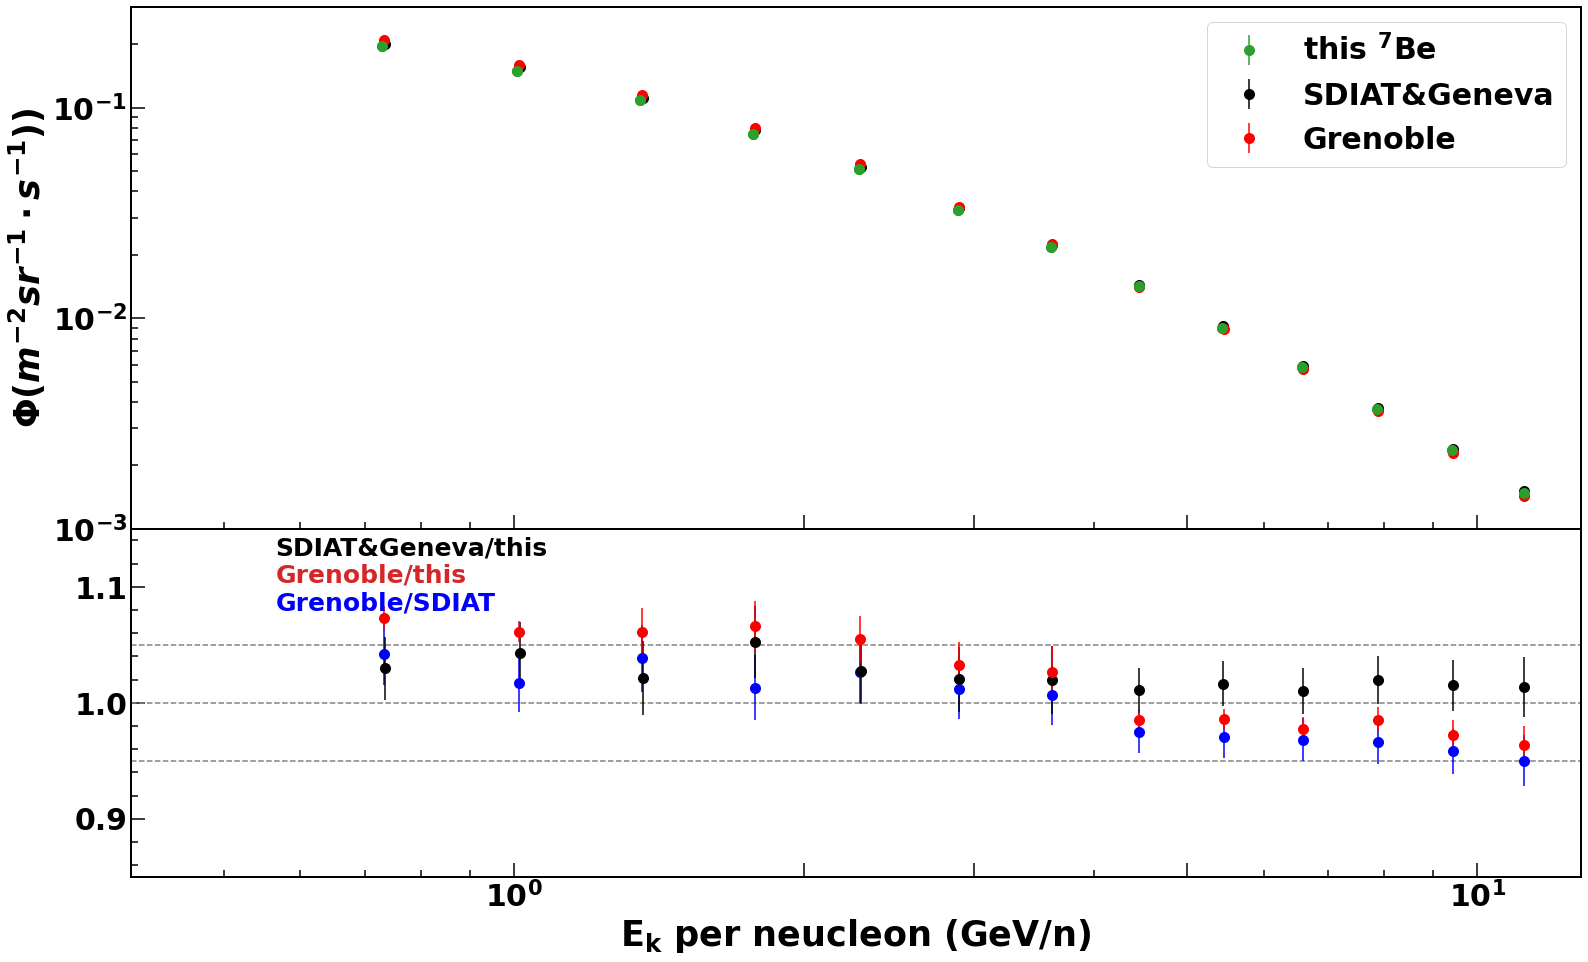

In [223]:
figsize = (26, 16)
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=(26, 16)) 
iso = 'Be7'
fluxcolor = 'tab:green'

graph_rawflux_combined[iso] = slice_graph_by_value(graph_rawflux_combined[iso], [0.8, 11])

graph_unfoldfactor_combined[iso] = slice_graph_by_value(graph_unfoldfactor_combined[iso], [0.8, 11])
print(graph_unfoldfactor_combined[iso])
print(graph_rawflux_combined[iso])

#unfoldflux = graph_rawflux_combined[iso].yvalues * graph_unfoldfactor_combined[iso].yvalues *0.995 * 0.98
unfoldflux = graph_rawflux_combined[iso].yvalues * graph_unfoldfactor_combined[iso].yvalues * 0.995 * 0.98
unfoldfluxerr = graph_rawflux_combined[iso].yerrs * graph_unfoldfactor_combined[iso].yvalues
graph_unfoledflux_Be7 = MGraph(graph_rawflux_combined[iso].xvalues, unfoldflux, unfoldfluxerr)

plot_graph(fig, ax1, graph_unfoledflux_Be7, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=20, label=f"this {ISO_LABELS[iso]}")    
plot_graph(fig, ax1, graph_flux_jiahui[iso], color='black', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT&Geneva")
plot_graph(fig, ax1, graph_laurent_fluxbe7, color='red', style="EP", xlog=True, ylog=False, markersize=20, label=f"Grenoble")    
plot_graph(fig, ax1, graph_unfoledflux_Be7, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=20)    
lowerrband = 1 - graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues
higherrband = 1 + graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues

#ax2.plot(graph_flux_jiahui[iso].xvalues, lowerrband, '-', color='grey')
#ax2.plot(graph_flux_jiahui[iso].xvalues, higherrband, '-', color='grey')
ax2.axhline(y=1, color='grey', linestyle='--')
ax2.axhline(y=1.05, color='grey', linestyle='--')
ax2.axhline(y=0.95, color='grey', linestyle='--')

ax2.text(0.1, 0.98, 'SDIAT&Geneva/this', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='black')
ax2.text(0.1, 0.9, 'Grenoble/this', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='tab:red')

graph_ratio_jhlarent = graph_laurent_fluxbe7/graph_flux_jiahui[iso]
plot_graph(fig, ax2, graph_ratio_jhlarent, color='blue', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT&Geneva(JW)")
ax2.text(0.1, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')
graph_ratio = graph_flux_jiahui[iso]/graph_unfoledflux_Be7
graph_ratio_grenoble = graph_laurent_fluxbe7/graph_unfoledflux_Be7
plot_graph(fig, ax2, graph_ratio, color='black', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT/this")    
plot_graph(fig, ax2, graph_ratio_grenoble, color='red', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT/this")    
ax1.set_ylabel(r"$\mathrm{\Phi} (m^{-2} sr^{-1} \cdot s^{-1})) }$", fontsize=35)                                                                                                                                                         
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend()
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2)                                                                                                       
ax1.set_xticklabels([])
ax2.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)     
ax2.set_xticks([0.4, 1, 2, 3, 5, 10])  
ax2.set_ylim([0.85, 1.15])
ax1.sharex(ax2)
ax1.set_yscale('log')
ax1.set_ylim([0.001, 0.3])
#plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate0410/plots_0410'
savefig_tofile(fig, plotfile, 'be7_flux_tunedmc', 1)
print(plotdir)
print(graph_rawflux_combined[iso])
#savefig_tofile(fig, plotdir, 'be7_flux', 1)



/home/manbing/Documents/lithiumanalysis/slides/BeUpdate04102023/plots_0410


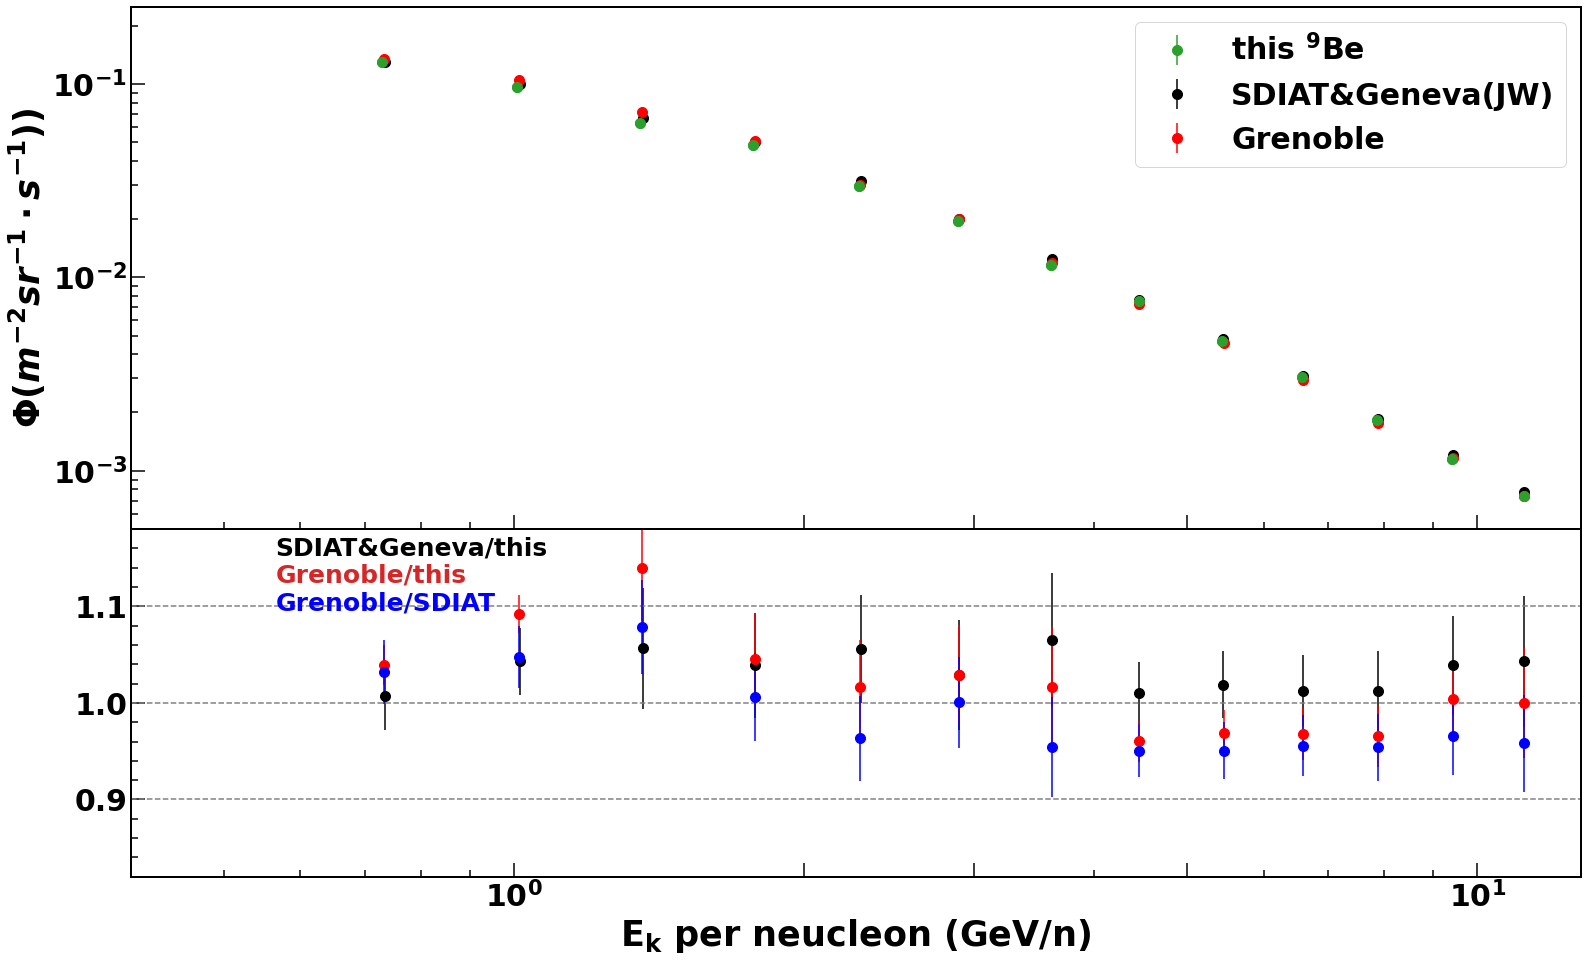

In [221]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=figsize)
iso = 'Be9'
graph_rawflux_combined[iso] = slice_graph_by_value(graph_rawflux_combined[iso], [0.8, 11])
graph_unfoldfactor_combined[iso] = slice_graph_by_value(graph_unfoldfactor_combined[iso], [0.8, 11])
fragmentation_correction = 0.99 * 0.995 

unfoldflux = graph_rawflux_combined[iso].yvalues * graph_unfoldfactor_combined[iso].yvalues * fragmentation_correction
unfoldfluxerr = graph_rawflux_combined[iso].yerrs * graph_unfoldfactor_combined[iso].yvalues
graph_unfoledflux_Be9 = MGraph(graph_rawflux_combined[iso].xvalues, unfoldflux, unfoldfluxerr)


plot_graph(fig, ax1, graph_unfoledflux_Be9, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=20, label=f"this {ISO_LABELS[iso]}")    
plot_graph(fig, ax1, graph_flux_jiahui[iso], color='black', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT&Geneva(JW)")
plot_graph(fig, ax1, graph_laurent_fluxbe9, color='red', style="EP", xlog=True, ylog=False, markersize=20, label=f"Grenoble")    
plot_graph(fig, ax1, graph_unfoledflux_Be9, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=20)    
graph_ratio = graph_flux_jiahui[iso]/graph_unfoledflux_Be9
graph_ratio_grenoble = graph_laurent_fluxbe9/graph_unfoledflux_Be9

plot_graph(fig, ax2, graph_ratio, color='black', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT/this")    
plot_graph(fig, ax2, graph_ratio_grenoble, color='red', style="EP", xlog=True, ylog=False, markersize=20, label=f"Grenoble/this")   
lowerrband = 1 - graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues
higherrband = 1 + graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues

#ax2.plot(graph_flux_jiahui[iso].xvalues, lowerrband, '-', color='grey')
#ax2.plot(graph_flux_jiahui[iso].xvalues, higherrband, '-', color='grey')

ax2.axhline(y=1, color='grey', linestyle='--')
ax2.axhline(y=1.1, color='grey', linestyle='--')
ax2.axhline(y=0.9, color='grey', linestyle='--')

ax2.text(0.1, 0.98, 'SDIAT&Geneva/this', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='black')
ax2.text(0.1, 0.9, 'Grenoble/this', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='tab:red')
graph_ratio_jhlarent = graph_laurent_fluxbe9/graph_flux_jiahui[iso]
plot_graph(fig, ax2, graph_ratio_jhlarent, color='blue', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT&Geneva(JW)")
ax2.text(0.1, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')


ax1.set_ylabel(r"$\mathrm{\Phi} (m^{-2} sr^{-1} \cdot s^{-1})) }$", fontsize=35)                                                                                                                                                         
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend()
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2)                                                                                                       
ax1.set_xticklabels([])
ax2.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)     
ax2.set_xticks([0.4, 1, 2, 3, 5, 10])  
ax2.set_ylim([0.82, 1.18])
ax1.set_ylim([0.0005, 0.25])
ax1.sharex(ax2)
ax1.set_yscale('log')

print(plotdir)
plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate0410/plots_0410'
savefig_tofile(fig, plotfile, 'be9_flux_tunedmc', 1)
#savefig_tofile(fig, plotdir, 'be9_flux', 1)


xvalues			yvalues			yerrs
0.735			1.0072272954225785			0.034894453027841034
1.015			1.0428106082088417			0.03432398524139687
1.3599999999999999			1.0565839743907712			0.06264779075358332
1.7799999999999998			1.0386665183067239			0.05397745139935269
2.29			1.055429255559905			0.05572481826411805
2.9			1.0286906430581013			0.05695728901980587
3.615			1.0653428596807055			0.06922228322402739
4.455			1.0103963715218585			0.032130361302529054
5.45			1.0187565042667013			0.034521699169541425
6.585			1.0124619563081336			0.03672509467116245
7.89			1.0122547263538872			0.04176099032012809
9.425			1.0389302415918462			0.051139927751842534
11.190000000000001			1.0431777673978746			0.06775994479399361



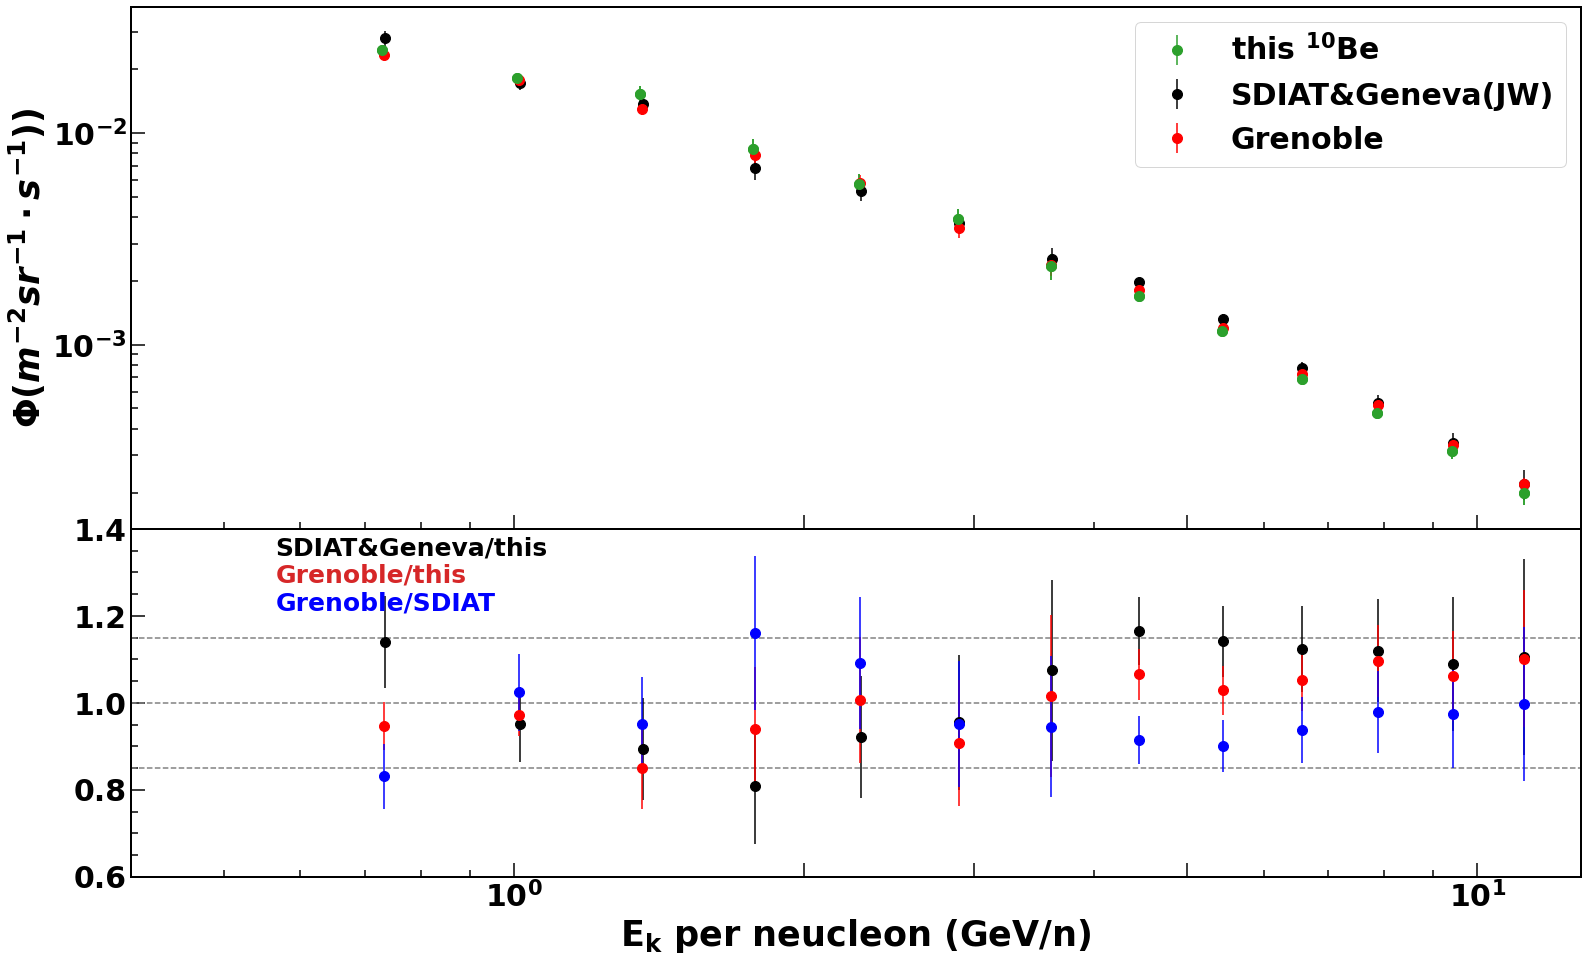

In [222]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={'height_ratios':[0.6, 0.4]}, figsize=figsize) 
iso = 'Be10'
graph_rawflux_combined[iso] = slice_graph_by_value(graph_rawflux_combined[iso], [0.8, 11])
graph_unfoldfactor_combined[iso] = slice_graph_by_value(graph_unfoldfactor_combined[iso], [0.8, 11])
unfoldflux = graph_rawflux_combined[iso].yvalues * graph_unfoldfactor_combined[iso].yvalues * 0.995 * 0.99
unfoldfluxerr = graph_rawflux_combined[iso].yerrs * graph_unfoldfactor_combined[iso].yvalues
graph_unfoledflux_Be10 = MGraph(graph_rawflux_combined[iso].xvalues, unfoldflux, unfoldfluxerr)

plot_graph(fig, ax1, graph_unfoledflux_Be10, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=20, label=f"this {ISO_LABELS[iso]}")    
plot_graph(fig, ax1, graph_flux_jiahui[iso], color='black', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT&Geneva(JW)")
plot_graph(fig, ax1, graph_laurent_fluxbe10, color='red', style="EP", xlog=True, ylog=False, markersize=20, label=f"Grenoble")    
plot_graph(fig, ax1, graph_unfoledflux_Be10, color=fluxcolor, style="EP", xlog=True, ylog=False, markersize=20)    

lowerrband = 1 - graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues
higherrband = 1 + graph_flux_jiahui[iso].yerrs/graph_flux_jiahui[iso].yvalues

#ax2.plot(graph_flux_jiahui[iso].xvalues, lowerrband, '-', color='grey')
#ax2.plot(graph_flux_jiahui[iso].xvalues, higherrband, '-', color='grey')

ax2.axhline(y=1, color='grey', linestyle='--')
ax2.axhline(y=1.15, color='grey', linestyle='--')
ax2.axhline(y=0.85, color='grey', linestyle='--')

ax2.text(0.1, 0.98, 'SDIAT&Geneva/this', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='black')
ax2.text(0.1, 0.9, 'Grenoble/this', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='tab:red')

#graph_ratio_jhlarent = graph_laurent_fluxbe9/graph_flux_jiahui[iso]
#plot_graph(fig, ax2, graph_ratio_jhlarent, color='blue', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT&Geneva(JW)")
#ax2.text(0.1, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')


print(graph_ratio)
graph_ratio_grenoble = graph_laurent_fluxbe10/graph_unfoledflux_Be10
graph_ratio = graph_flux_jiahui[iso]/graph_unfoledflux_Be10
plot_graph(fig, ax2, graph_ratio, color='black', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT/this")    
plot_graph(fig, ax2, graph_ratio_grenoble, color='red', style="EP", xlog=True, ylog=False, markersize=20, label=f"Grenoble/this")    

graph_ratio_jhlarent = graph_laurent_fluxbe10/graph_flux_jiahui[iso]
plot_graph(fig, ax2, graph_ratio_jhlarent, color='blue', style="EP", xlog=True, ylog=False, markersize=20, label=f"SDIAT&Geneva(JW)")
ax2.text(0.1, 0.82, 'Grenoble/SDIAT', fontsize=25, verticalalignment='top', horizontalalignment='left', transform=ax2.transAxes, color='blue')

ax1.set_ylabel(r"$\mathrm{\Phi} (m^{-2} sr^{-1} \cdot s^{-1})) }$", fontsize=35)                                                                                                                                                         
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())  
set_plot_defaultstyle(ax1)   
ax1.legend()
plt.subplots_adjust(hspace=.0)   
#ax1.get_yticklabels()[0].set_visible(False)
set_plot_defaultstyle(ax1)    
set_plot_defaultstyle(ax2)                                                                                                       
ax1.set_xticklabels([])
ax2.set_xlabel(r"$\mathrm{E_{k}}$ per neucleon (GeV/n)", fontsize=35)     
ax2.set_xticks([0.4, 1, 2, 3, 5, 10])  
ax2.set_ylim([0.6, 1.4])
ax1.sharex(ax2)
ax1.set_yscale('log')

plotfile = '/home/manbing/Documents/lithiumanalysis/slides/BeUpdate0410/plots_0410'
savefig_tofile(fig, plotfile, 'be10_flux_tunedmc', 1)

#savefig_tofile(fig, plotdir, 'be10_flux', 1)